In [ ]:
!pip install gymnasium matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 25.0 MB/s eta 0:00:00


In [ ]:
# from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):

        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 20

        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3,3]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.final_reward = 0
        self.reward_dict = {(0,0):0,(0,1):0,(0,2):5,(0,3):0
                ,(1,0):0,(1,1):-3,(1,2):0,(1,3):0
                ,(2,0):0,(2,1):0,(2,2):-1,(2,3):0
                ,(3,0):0,(3,1):5,(3,2):0,(3,3):10}


        
    def reset(self, **kwargs):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 20

        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3,3]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.final_reward = 0
        self.reward_dict = {(0,0):0,(0,1):0,(0,2):5,(0,3):0
                ,(1,0):0,(1,1):-3,(1,2):0,(1,3):0
                ,(2,0):0,(2,1):0,(2,2):-1,(2,3):0
                ,(3,0):0,(3,1):5,(3,2):0,(3,3):10}
        observation = self.state.flatten()

        return observation

    def step(self, action):

      if action == 0:
        self.agent_pos[0] += 1
      if action == 1:
        self.agent_pos[0] -= 1
      if action == 2:
        self.agent_pos[1] += 1
      if action == 3:
        self.agent_pos[1] -= 1

      self.agent_pos = np.clip(self.agent_pos, 0, 3)

      self.state = np.zeros((4,4))
      self.state[tuple(self.agent_pos)] = 1
      self.state[tuple(self.goal_pos)] = 0.5
      observation = self.state.flatten()

      reward = int(self.reward_dict[tuple(self.agent_pos)])
      if reward!=0:
        self.reward_dict[tuple(self.agent_pos)] = 0

      self.final_reward += reward
      self.timestep += 1

      terminated = True if (self.timestep >= self.max_timesteps) or (np.all(self.agent_pos==self.goal_pos)) else False
      
      return observation, reward, terminated
      
    def render(self):
      fig, ax = plt.subplots()
      ax.imshow(self.state)
      ax.set_xticks([0.5, 1.5, 2.5, 3.5])
      ax.set_yticks([0.5, 1.5, 2.5, 3.5])
      ax.grid(True)
      for i in range(self.state.shape[0]):
          for j in range(self.state.shape[1]):
              if self.reward_dict[i, j]!=0:
                ax.text(j, i, self.reward_dict[i, j], ha='center', va='center',color='white')
      plt.show()


# **Part I: DEFINE AN RL ENVIRONMENT** 

In [ ]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

The base position of the grids
The State : [0, 0]
The State : [0 1]
The time step : 1
The action we performed: 2
The reward it attained: 0


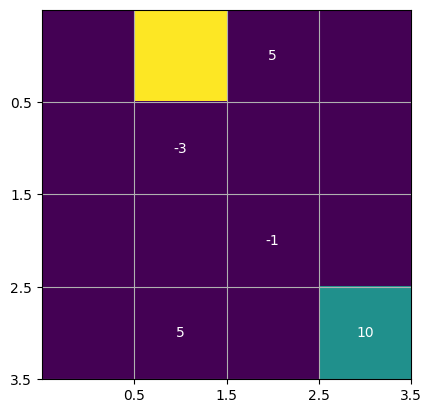

The State : [1 1]
The time step : 2
The action we performed: 0
The reward it attained: -3


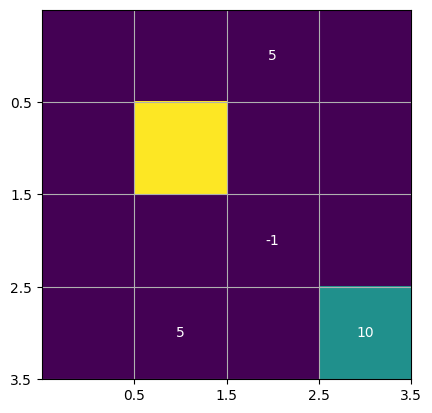

The State : [1 0]
The time step : 3
The action we performed: 3
The reward it attained: 0


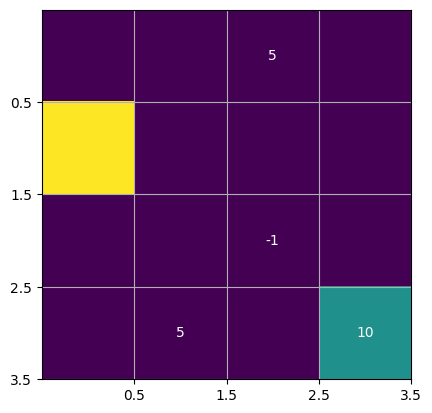

The State : [2 0]
The time step : 4
The action we performed: 0
The reward it attained: 0


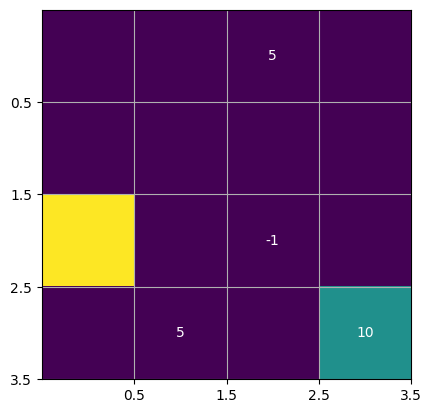

The State : [2 0]
The time step : 5
The action we performed: 3
The reward it attained: 0


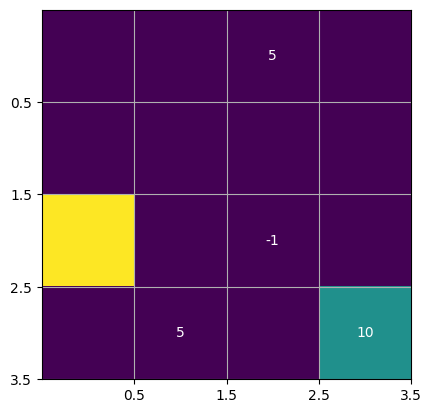

The State : [1 0]
The time step : 6
The action we performed: 1
The reward it attained: 0


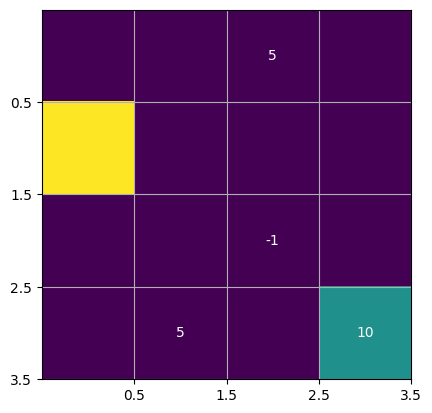

The State : [1 0]
The time step : 7
The action we performed: 3
The reward it attained: 0


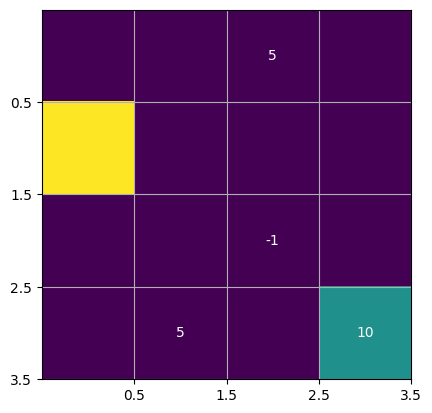

The State : [0 0]
The time step : 8
The action we performed: 1
The reward it attained: 0


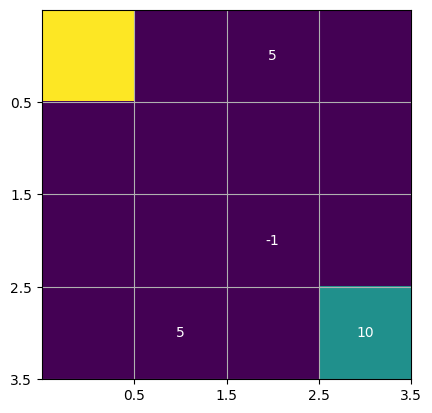

The State : [0 1]
The time step : 9
The action we performed: 2
The reward it attained: 0


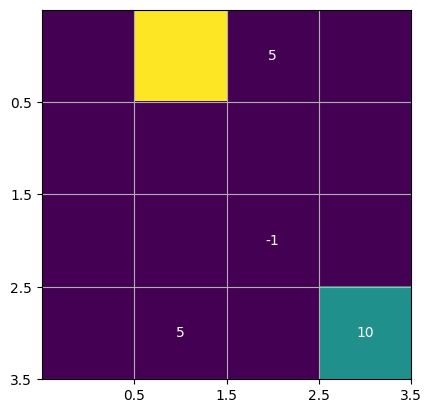

The State : [0 2]
The time step : 10
The action we performed: 2
The reward it attained: 5


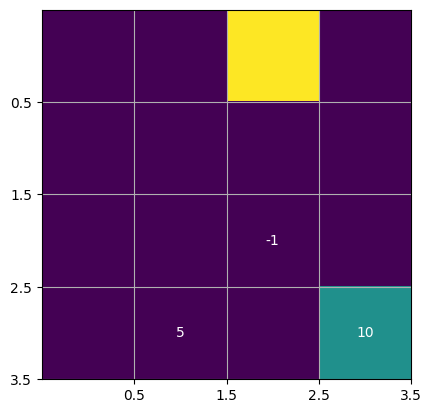

The State : [0 1]
The time step : 11
The action we performed: 3
The reward it attained: 0


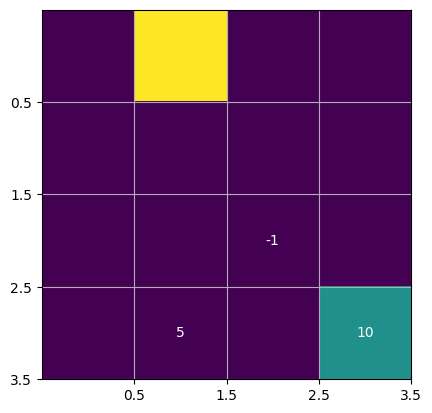

The State : [0 1]
The time step : 12
The action we performed: 1
The reward it attained: 0


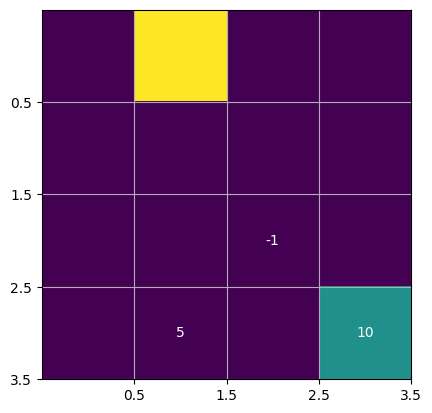

The State : [1 1]
The time step : 13
The action we performed: 0
The reward it attained: 0


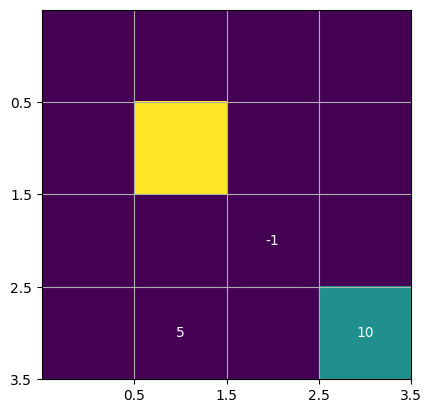

The State : [0 1]
The time step : 14
The action we performed: 1
The reward it attained: 0


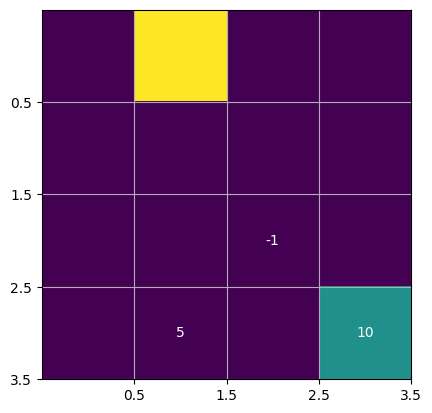

The State : [0 0]
The time step : 15
The action we performed: 3
The reward it attained: 0


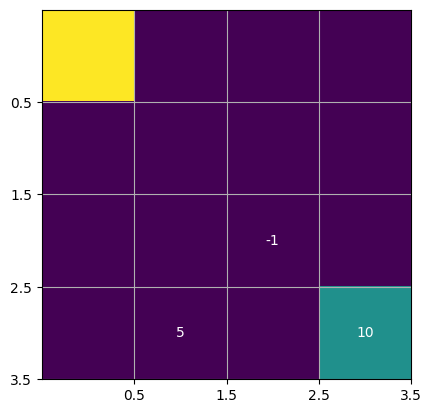

The State : [0 1]
The time step : 16
The action we performed: 2
The reward it attained: 0


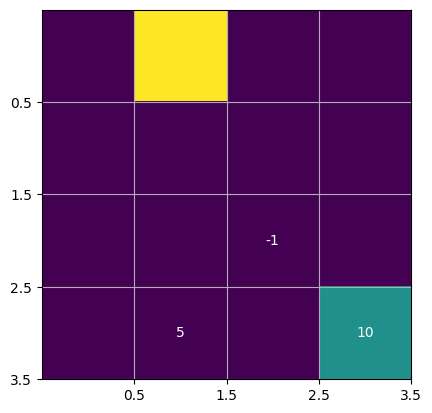

The State : [0 1]
The time step : 17
The action we performed: 1
The reward it attained: 0


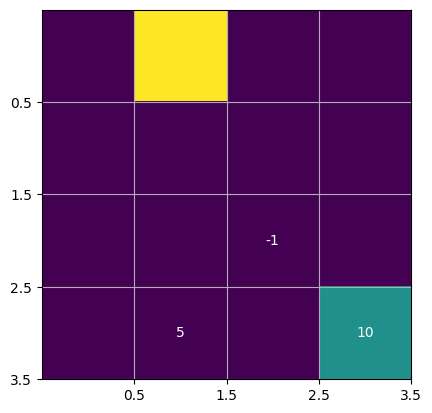

The State : [0 0]
The time step : 18
The action we performed: 3
The reward it attained: 0


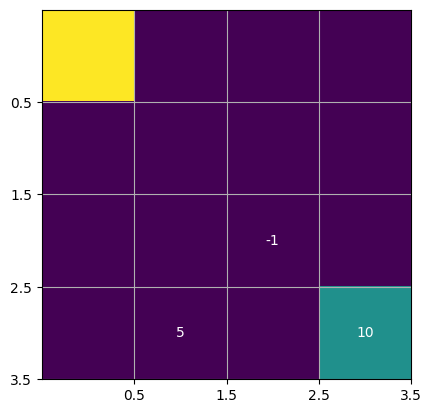

The State : [0 1]
The time step : 19
The action we performed: 2
The reward it attained: 0


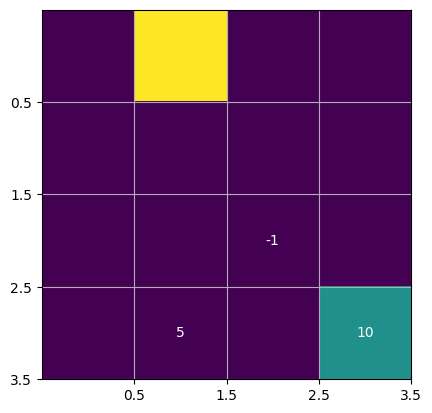

The State : [1 1]
The time step : 20
The action we performed: 0
The reward it attained: 0


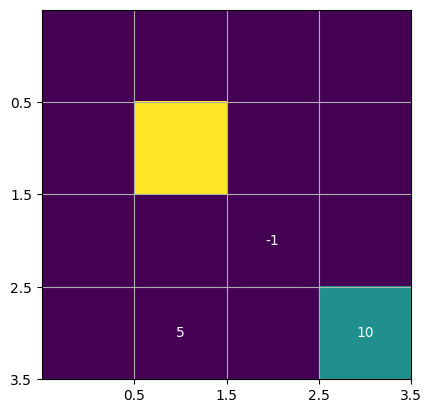

The Final Reward is : 2


In [ ]:
env = GridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
terminated, truncated = False, False
print("The base position of the grids")
print("The State :", env.agent_pos)
while not terminated:
  action = agent.step(obs)
  

  obs, reward, terminated = env.step(action)
  print("The State :", env.agent_pos)
  print("The time step :",env.timestep)
  print("The action we performed:",action)
  print("The reward it attained:",reward)
  env.render()
  time.sleep(1)

print("The Final Reward is :",env.final_reward)

# **Part II: RL ENVIRONMENT USING SARSA**

In [ ]:
class SARSA:
    def __init__(self, env, alpha=0.27, gamma=0.97, epsilon=0.89,decay_factor=0.9):
        self.action_space = env.action_space
        self.observation_space = env.observation_space
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.decay_factor = decay_factor
        # Create an empty dictionary to store the Q-values
        self.Q = np.zeros((self.observation_space.n,self.action_space.n))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space.n)
        else:
            return np.argmax(self.Q[int(state),:])
  
    def update_Q(self, state, action, reward, next_state, next_action):
        predict = self.Q[state, action]
        target = reward + self.gamma * self.Q[next_state, next_action]
        self.Q[state, action] = self.Q[state, action] + self.alpha * (target - predict)

In [ ]:
def run_sarsa(env, agent, gridStates, num_episodes=30):
    episode_reward=[]
    epsilon_over_episodes = []
    
    for episode in range(num_episodes):
        obs = env.reset()
        first_pos = gridStates.get(tuple(env.agent_pos))
        first_action = agent.choose_action(first_pos)
        terminated = False
        
        while not terminated:
            next_obs, reward, terminated = env.step(first_action)
            next_pos = gridStates.get(tuple(env.agent_pos))
            next_action = agent.choose_action(next_pos)
            agent.update_Q(first_pos,first_action,reward, next_pos,next_action)
            epsilon_over_episodes.append(agent.epsilon)
            
            if agent.epsilon>0.01:
                agent.epsilon = agent.epsilon * agent.decay_factor
            else:
                agent.epsilon = 0.01
            first_pos, first_action = next_pos, next_action
            
        if np.all(env.agent_pos == env.goal_pos):
            print("Gotcha")
            env.render()
            print(agent.Q)
        
        episode_reward.append(env.final_reward)
    
    return episode_reward, epsilon_over_episodes


In [ ]:
def plot_rewards_and_epsilon(episode_reward, epsilon_over_episodes):
    # Plot episode reward
    plt.figure(figsize=(8, 4))
    plt.plot(episode_reward)
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    plt.title('Episode - Reward')
    plt.show()

    # Plot epsilon over episodes
    plt.figure(figsize=(8, 4))
    plt.plot(epsilon_over_episodes)
    plt.xlabel('Episodes')
    plt.ylabel('Epsilon')
    plt.title('Epsilon Decay')
    plt.show()

    # Plot cumulative rewards
    x_values = np.arange(len(episode_reward))
    cumulative_rewards = np.cumsum(episode_reward)
    plt.figure(figsize=(8, 4))
    plt.plot(x_values, cumulative_rewards)
    plt.xlabel('Episodes')
    plt.ylabel('Cumulative Rewards')
    plt.title('Cumulative Rewards over Time')
    plt.show()


Gotcha


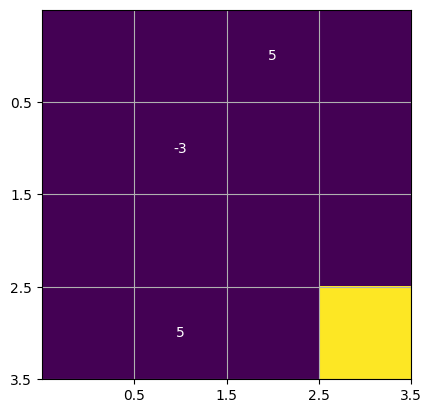

[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.   -0.27  0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    2.7   0.  ]
 [ 0.    0.    0.    0.  ]]
Gotcha


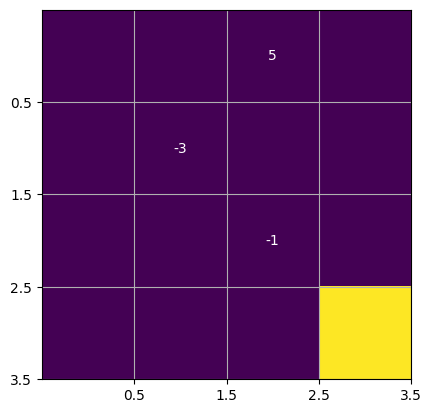

[[ 4.49572663  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 4.69711942  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 4.84888707  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          4.99991772  0.        ]
 [ 0.          0.          0.70713     0.        ]
 [ 0.          0.          4.671       0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


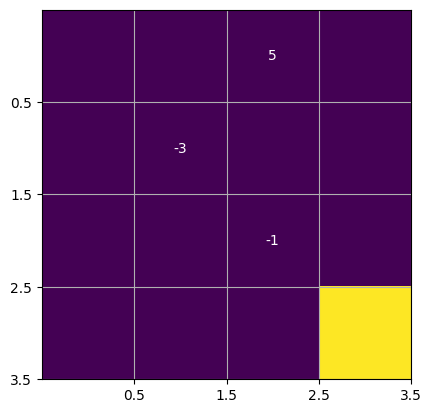

[[ 4.51205602  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 4.6988207   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 4.84916602  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          5.18513729  0.        ]
 [ 0.          0.          1.7395398   0.        ]
 [ 0.          0.          6.10983     0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


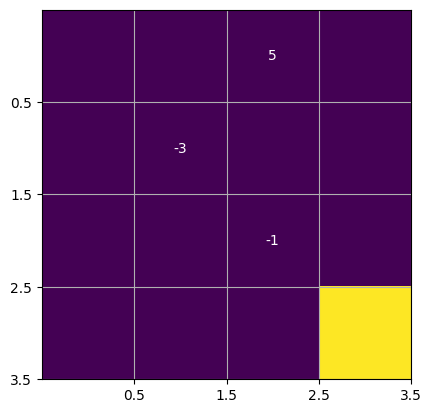

[[ 4.52442203  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 4.70013569  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 4.89787865  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          5.59073569  0.        ]
 [ 0.          0.          2.87002853  0.        ]
 [ 0.          0.          7.1601759   0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


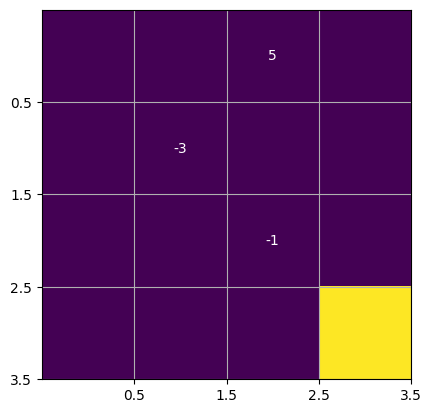

[[ 4.53379362  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 4.71385347  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.03966509  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          6.18289753  0.        ]
 [ 0.          0.          3.9703709   0.        ]
 [ 0.          0.          7.92692841  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


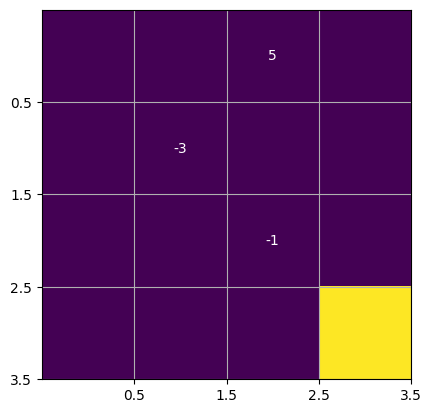

[[ 4.54422757  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 4.76100132  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.29825638  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          6.90335533  0.        ]
 [ 0.          0.          4.9744333   0.        ]
 [ 0.          0.          8.48665774  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


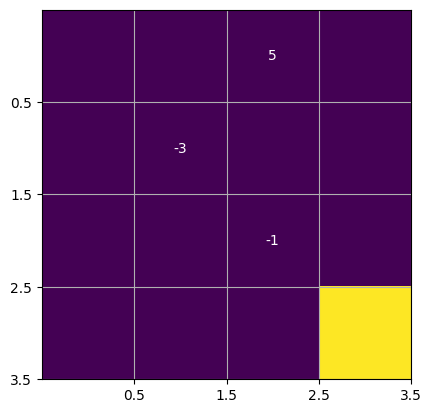

[[ 4.56419237  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 4.86314431  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.67571592  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          7.69225348  0.        ]
 [ 0.          0.          5.85399197  0.        ]
 [ 0.          0.          8.89526015  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


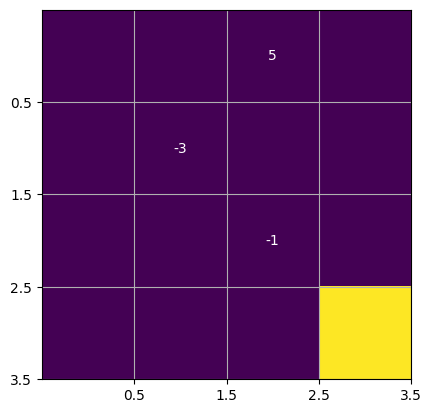

[[ 4.60551793  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.03656535  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.1578738   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          8.49850553  0.        ]
 [ 0.          0.          6.60308277  0.        ]
 [ 0.          0.          9.19353991  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


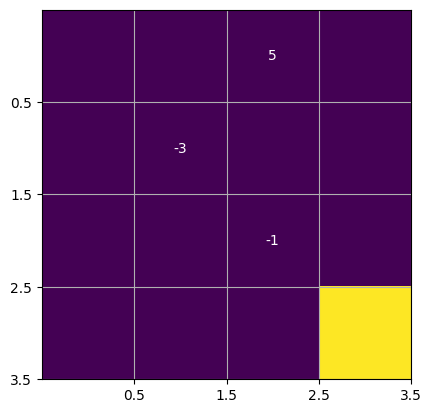

[[ 4.68110455  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.28943985  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.72100648  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          9.28325642  0.        ]
 [ 0.          0.          7.22803853  0.        ]
 [ 0.          0.          9.41128413  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


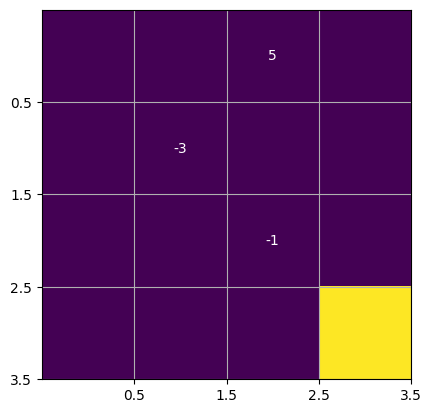

[[ 4.80251062  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.62152269  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 7.33761958  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         10.01980048  0.        ]
 [ 0.          0.          7.74128344  0.        ]
 [ 0.          0.          9.57023742  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


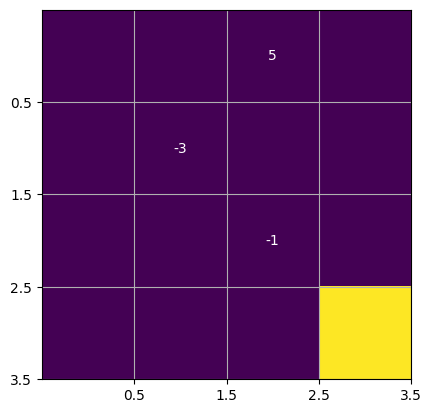

[[ 4.97810954  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.02543413  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 7.98064804  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         10.69189648  0.        ]
 [ 0.          0.          8.15758209  0.        ]
 [ 0.          0.          9.68627331  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


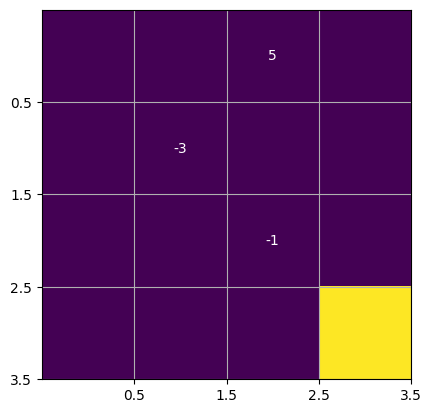

[[ 5.21208117  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.48869864  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 8.62608076  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         11.29155518  0.        ]
 [ 0.          0.          8.49186991  0.        ]
 [ 0.          0.          9.77097952  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


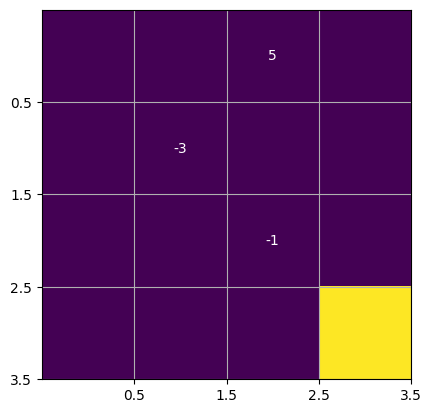

[[ 5.50420942  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.99592056  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.25429725  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         11.81685601  0.        ]
 [ 0.          0.          8.75808457  0.        ]
 [ 0.          0.          9.83281505  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


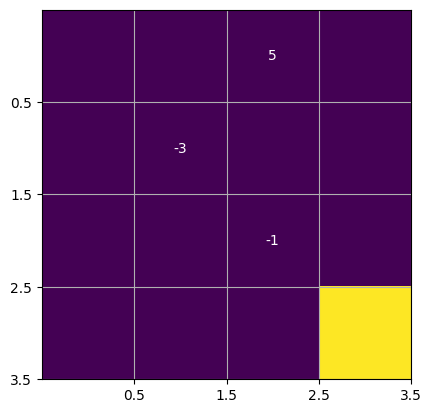

[[ 5.85030447  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 7.53072246  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.85047159  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         12.27004724  0.        ]
 [ 0.          0.          8.968616    0.        ]
 [ 0.          0.          9.87795499  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


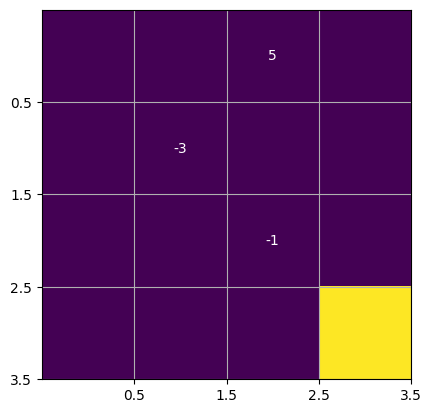

[[ 6.24301848  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 8.0772659   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.40436963  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         12.65601501  0.        ]
 [ 0.          0.          9.13412609  0.        ]
 [ 0.          0.          9.91090714  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


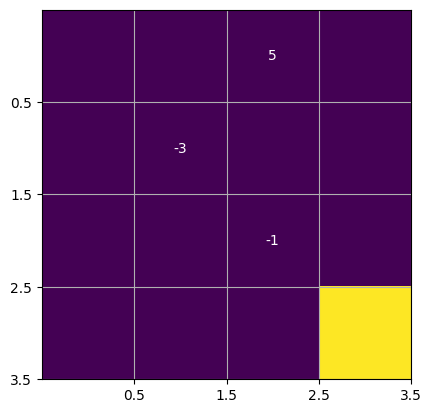

[[ 6.67283943  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 8.62130851  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.90980016  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         12.98111858  0.        ]
 [ 0.          0.          9.26357862  0.        ]
 [ 0.          0.          9.93496221  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


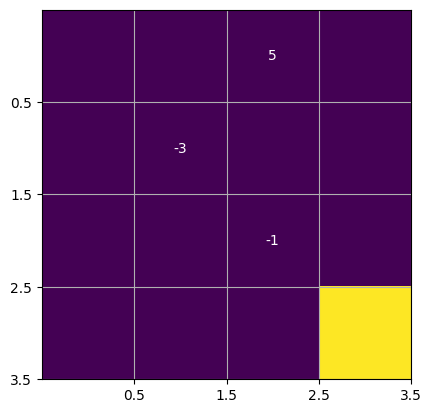

[[ 7.12909348  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.15083188  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.36390907  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         13.25234781  0.        ]
 [ 0.          0.          9.364379    0.        ]
 [ 0.          0.          9.95252241  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


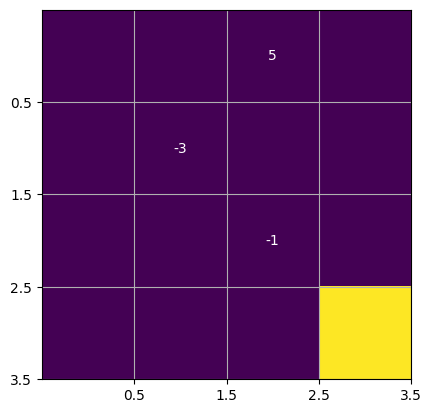

[[ 7.60084111  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.65631506  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.76644351  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         13.47674476  0.        ]
 [ 0.          0.          9.44256229  0.        ]
 [ 0.          0.          9.96534136  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


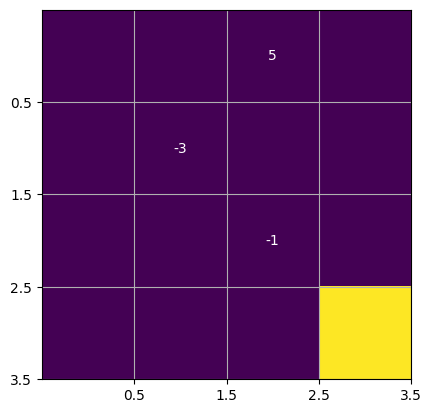

[[ 8.07760292  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.13074155  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.11906322  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         13.66103074  0.        ]
 [ 0.          0.          9.50299337  0.        ]
 [ 0.          0.          9.97469919  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


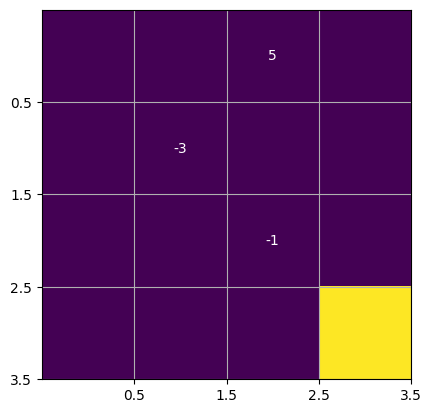

[[ 8.54989135  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.56942399  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.4247401   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         13.8113864   0.        ]
 [ 0.          0.          7.67651889  0.        ]
 [ 0.          0.          9.98153041  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


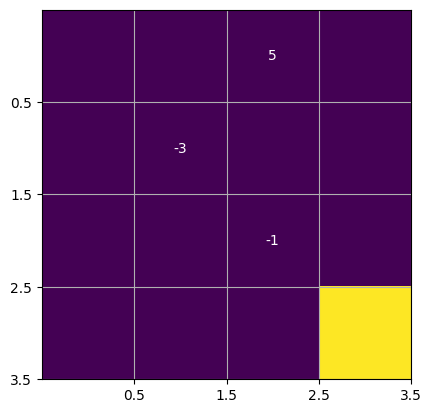

[[ 9.00955282  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.96971894  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.68726237  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         13.44279237  0.        ]
 [ 0.          0.          8.2180216   0.        ]
 [ 0.          0.          9.9865172   1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


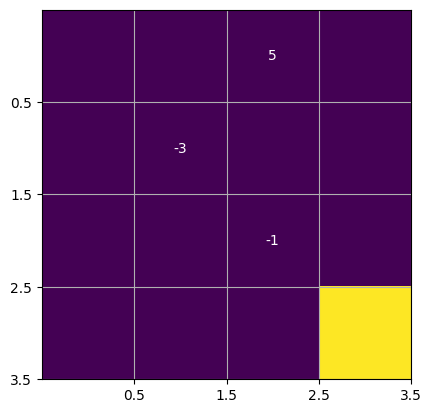

[[ 9.44994295  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.33068884  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.78236885  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         13.31553829  0.        ]
 [ 0.          0.          8.61462463  0.        ]
 [ 0.          0.          9.99015756  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


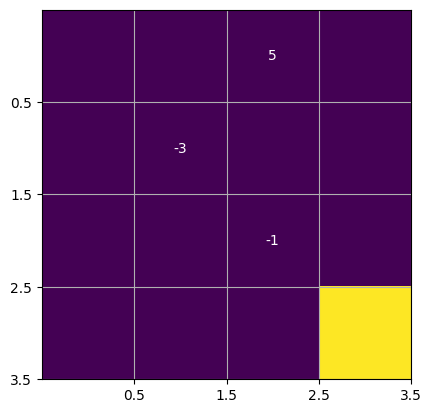

[[ 9.86596576  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.61910526  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.81846874  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         13.32651314  0.        ]
 [ 0.          0.          8.90509824  0.        ]
 [ 0.          0.          9.99281502  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


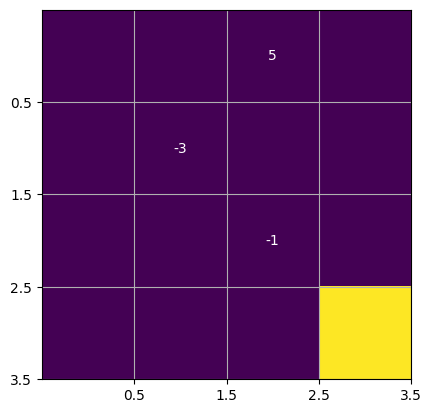

[[10.24519867  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.8391038   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.84769597  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         13.41059982  0.        ]
 [ 0.          0.          9.11783997  0.        ]
 [ 0.          0.          9.99475496  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


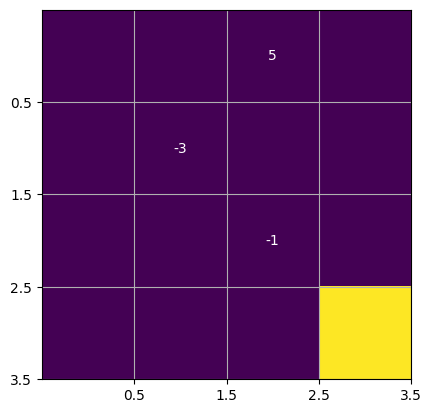

[[10.57965632  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.00735735  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.89105415  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         13.52770016  0.        ]
 [ 0.          0.          9.2736495   0.        ]
 [ 0.          0.          9.99617112  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


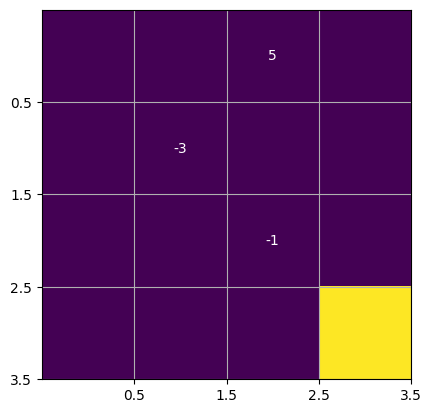

[[10.867876    0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.14153795  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.9533742   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         13.65398992  0.        ]
 [ 0.          0.          9.38776135  0.        ]
 [ 0.          0.          9.99720492  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


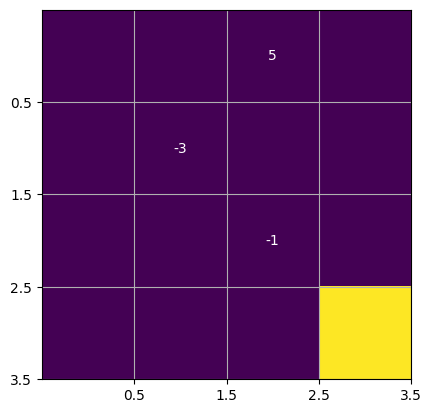

[[11.11341827  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.25581141  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.03194313  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         13.77606734  0.        ]
 [ 0.          0.          9.47133376  0.        ]
 [ 0.          0.          9.99795959  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


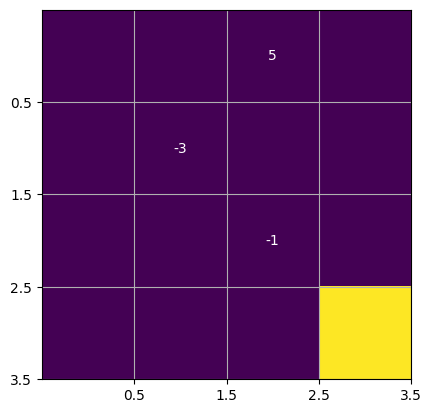

[[11.32259234  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.35980823  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.12127052  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         13.88707147  0.        ]
 [ 0.          0.          9.53253926  0.        ]
 [ 0.          0.          9.9985105   1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


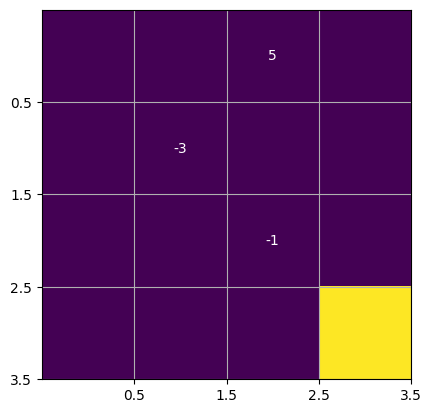

[[11.50252619  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.45912076  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.2155515   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         13.9841342   0.        ]
 [ 0.          0.          9.57736356  0.        ]
 [ 0.          0.          9.99891267  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


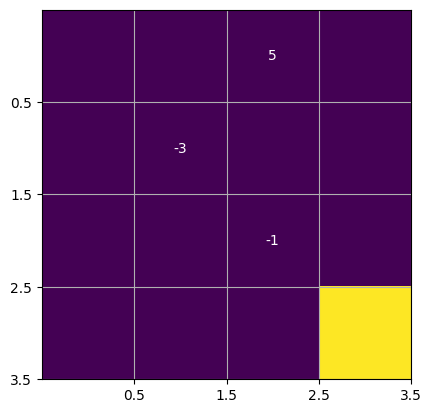

[[11.65988784  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.55631109  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.30979734  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         14.06672949  0.        ]
 [ 0.          0.          9.61019063  0.        ]
 [ 0.          0.          9.99920625  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


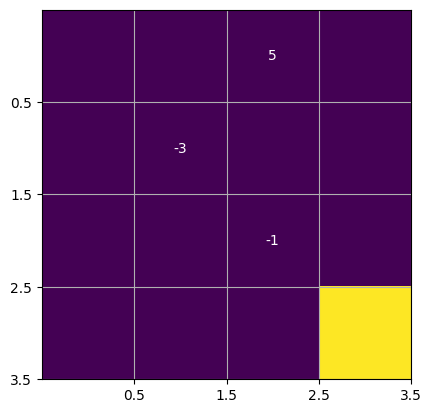

[[11.800216    0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.65194302  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.40022851  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         14.13562145  0.        ]
 [ 0.          0.          9.63423127  0.        ]
 [ 0.          0.          9.99942056  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


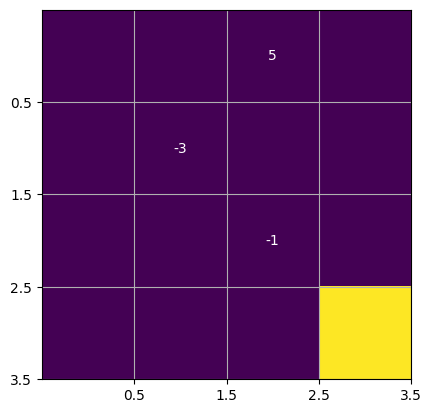

[[11.92770156  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.74543825  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.48428607  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         14.19220883  0.        ]
 [ 0.          0.          9.65183707  0.        ]
 [ 0.          0.          9.99957701  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


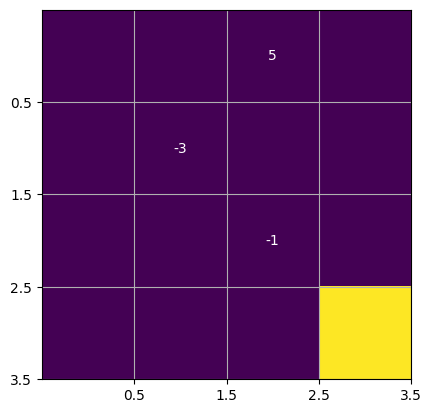

[[12.04525241  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.83570445  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.56046832  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         14.23812857  0.        ]
 [ 0.          0.          9.66473028  0.        ]
 [ 0.          0.          9.99969122  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


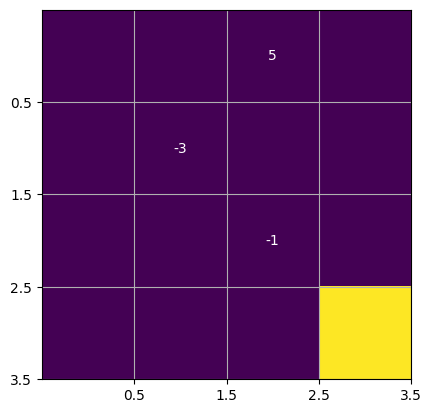

[[12.15470526  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.9215509   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.62810775  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         14.27502672  0.        ]
 [ 0.          0.          9.67417224  0.        ]
 [ 0.          0.          9.99977459  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


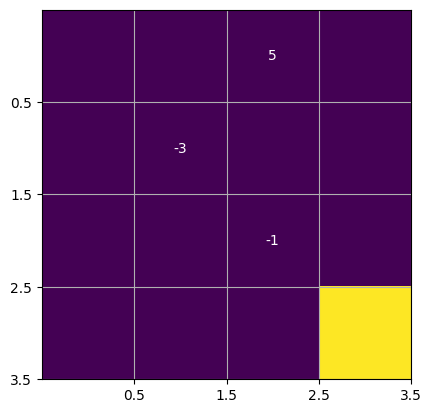

[[12.25708902  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.00193358  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.68714816  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         14.30443521  0.        ]
 [ 0.          0.          9.6810867   0.        ]
 [ 0.          0.          9.99983545  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


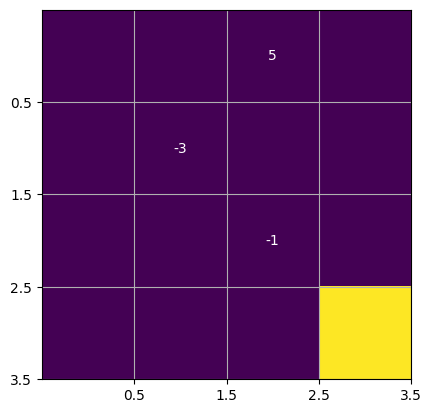

[[12.35288139  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.07607561  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.99161815  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.32771431  0.        ]
 [ 0.          0.          9.68615019  0.        ]
 [ 0.          0.          9.99987988  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


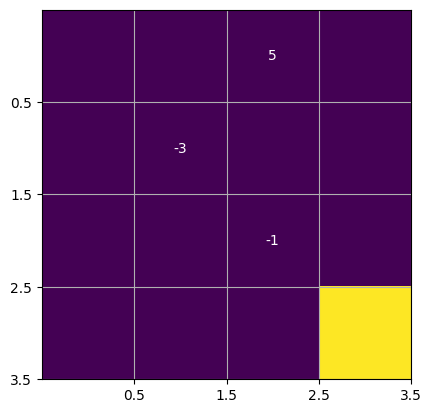

[[12.44222761  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.16233999  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.04630963  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.34603418  0.        ]
 [ 0.          0.          9.68985818  0.        ]
 [ 0.          0.          9.99991231  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


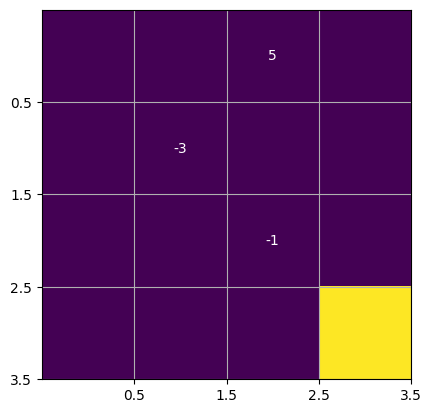

[[12.268143    0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.77153669  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.82103238  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.36037881  0.        ]
 [ 0.          0.          9.69257351  0.        ]
 [ 0.          0.          9.99993599  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


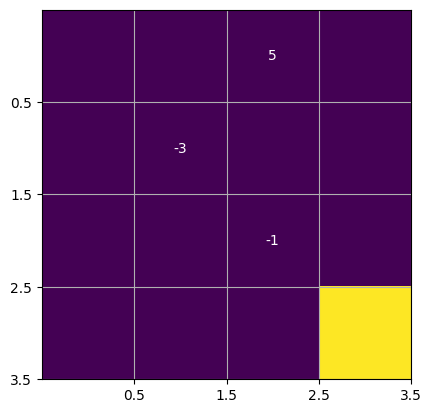

[[12.03870985  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.68915016  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.39033685  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.37156153  0.        ]
 [ 0.          0.          9.69456189  0.        ]
 [ 0.          0.          9.99995327  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


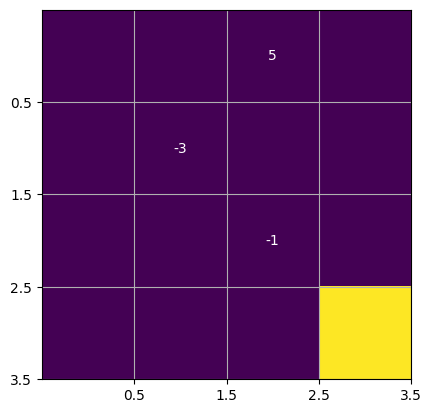

[[11.84964662  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.77810884  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.80885787  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.38024568  0.        ]
 [ 0.          0.          9.69601794  0.        ]
 [ 0.          0.          9.99996589  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


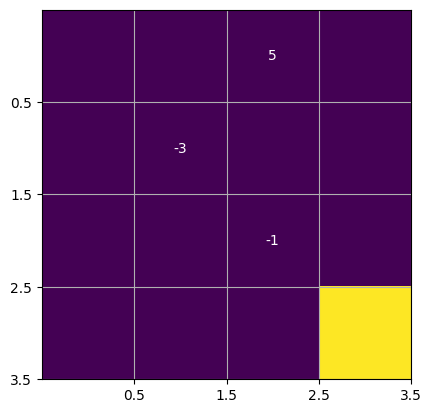

[[11.73492874  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.95265933  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.11665259  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.38696645  0.        ]
 [ 0.          0.          9.69708417  0.        ]
 [ 0.          0.          9.9999751   1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


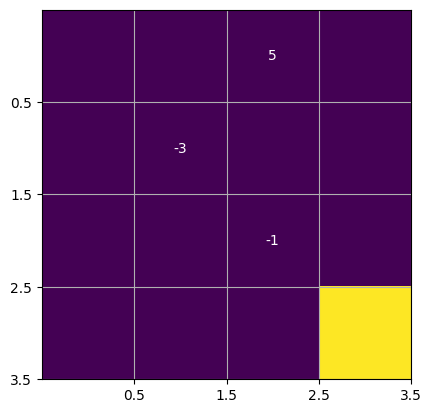

[[11.69689946  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.16069262  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.3431029   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.39215185  0.        ]
 [ 0.          0.          9.69786492  0.        ]
 [ 0.          0.          9.99998182  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


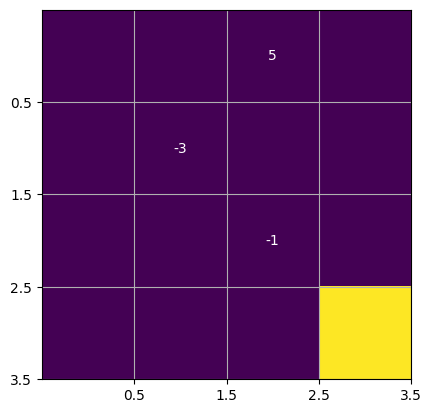

[[11.723622    0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.37186426  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.50976969  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.39614167  0.        ]
 [ 0.          0.          9.69843663  0.        ]
 [ 0.          0.          9.99998673  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


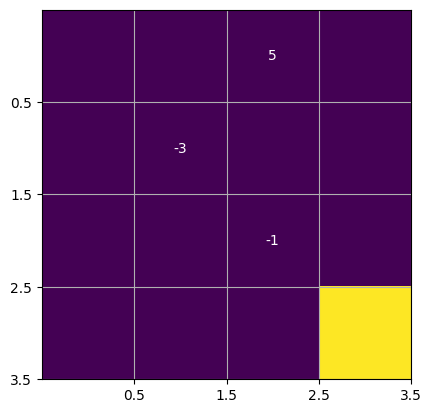

[[11.79843531  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.56966959  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.63248137  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.39920397  0.        ]
 [ 0.          0.          9.69885526  0.        ]
 [ 0.          0.          9.99999031  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


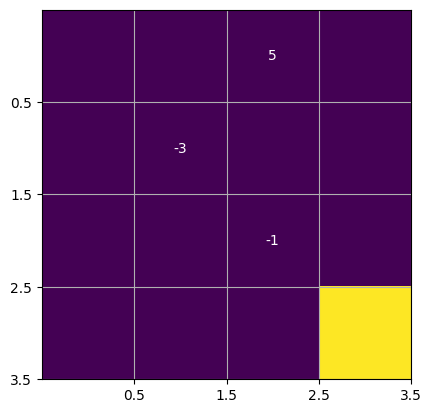

[[11.90485424  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.74620567  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.72286292  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40154909  0.        ]
 [ 0.          0.          9.69916181  0.        ]
 [ 0.          0.          9.99999293  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


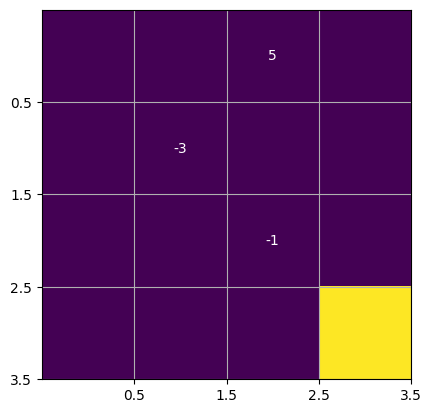

[[12.02877486  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.89874794  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.78945564  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40334132  0.        ]
 [ 0.          0.          9.69938627  0.        ]
 [ 0.          0.          9.99999484  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


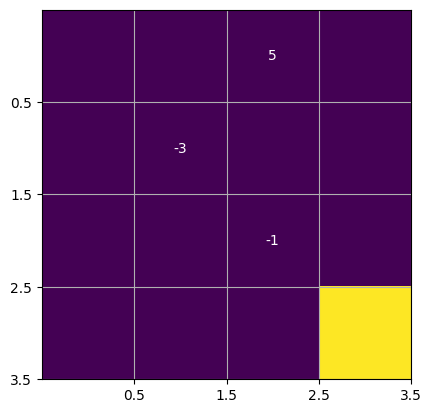

[[12.15918774  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.02754443  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.83853771  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40470842  0.        ]
 [ 0.          0.          9.69955062  0.        ]
 [ 0.          0.          9.99999623  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


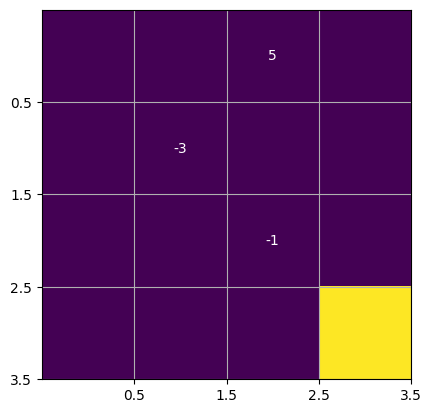

[[12.28812093  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.13442046  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.87472566  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40574946  0.        ]
 [ 0.          0.          9.69967097  0.        ]
 [ 0.          0.          9.99999725  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


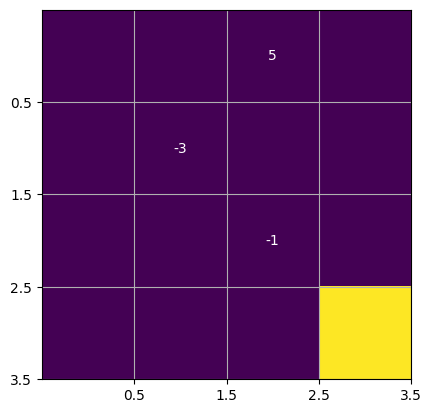

[[12.410233    0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.22191759  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.90141552  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40654093  0.        ]
 [ 0.          0.          9.69975909  0.        ]
 [ 0.          0.          9.99999799  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


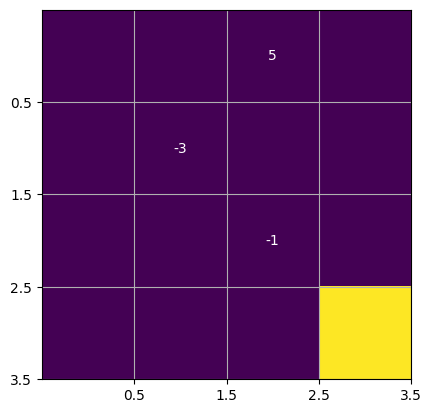

[[12.52229031  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.29278056  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.9211064   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40714178  0.        ]
 [ 0.          0.          9.69982361  0.        ]
 [ 0.          0.          9.99999853  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


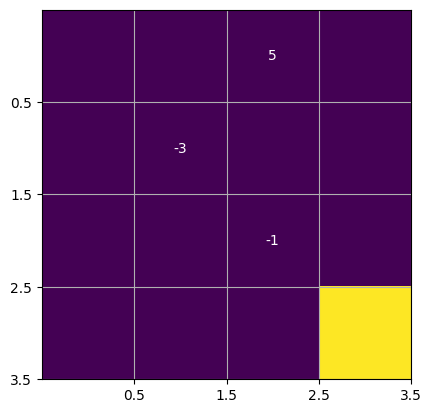

[[12.62265115  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.34966758  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.9356381   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.4075973   0.        ]
 [ 0.          0.          9.69987085  0.        ]
 [ 0.          0.          9.99999893  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


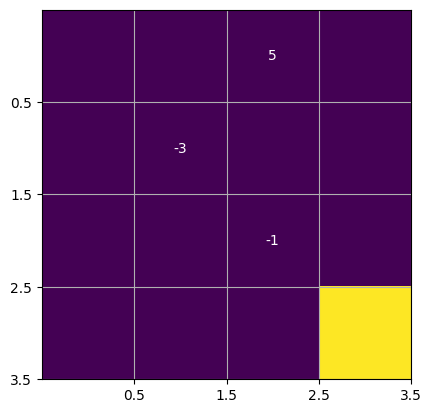

[[12.71081328  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.39500095  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.94636555  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40794221  0.        ]
 [ 0.          0.          9.69990544  0.        ]
 [ 0.          0.          9.99999922  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


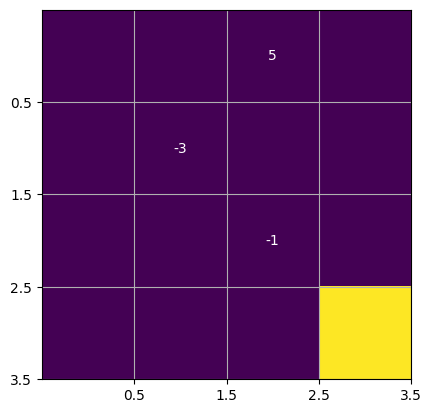

[[12.78704444  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.43090383  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.95428692  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40820305  0.        ]
 [ 0.          0.          9.69993077  0.        ]
 [ 0.          0.          9.99999943  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


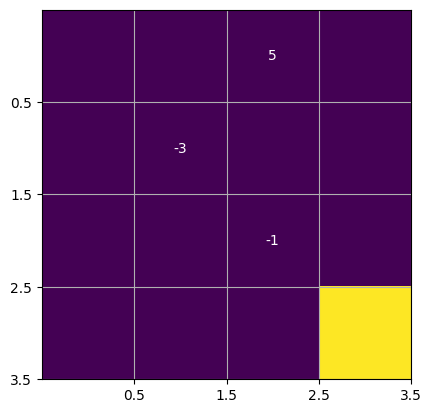

[[12.85209616  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.45918754  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.96013783  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40840009  0.        ]
 [ 0.          0.          9.69994931  0.        ]
 [ 0.          0.          9.99999958  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


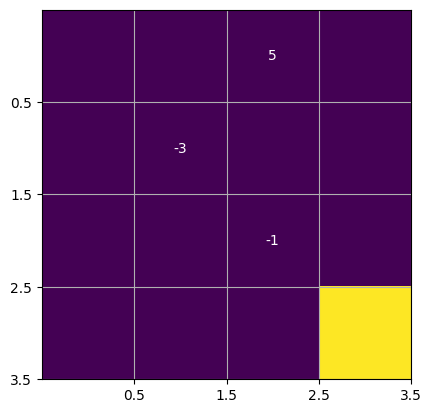

[[12.90699141  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.481367    0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.9644606   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40854879  0.        ]
 [ 0.          0.          9.69996289  0.        ]
 [ 0.          0.          9.9999997   1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


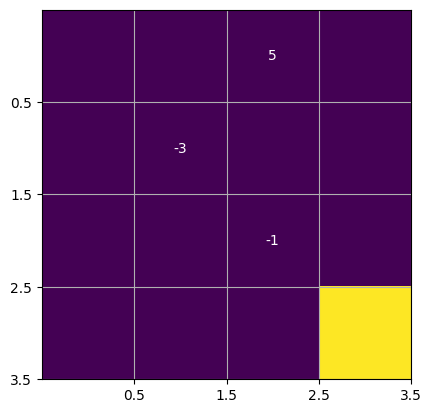

[[12.95287375  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.49869014  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.96765516  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.4086609   0.        ]
 [ 0.          0.          9.69997283  0.        ]
 [ 0.          0.          9.99999978  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


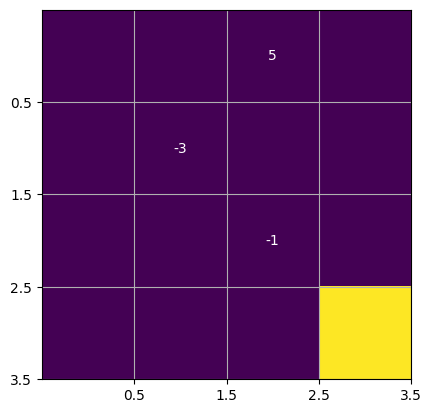

[[12.99090478  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.51217269  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97001656  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40874534  0.        ]
 [ 0.          0.          9.69998011  0.        ]
 [ 0.          0.          9.99999984  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


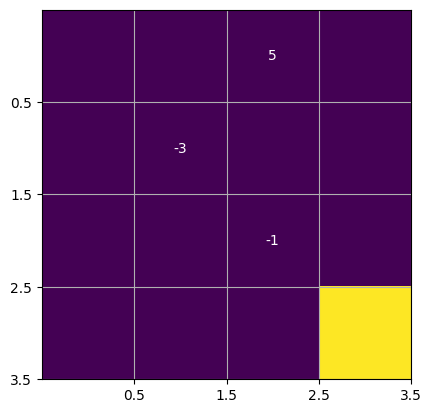

[[13.02219852  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5226334   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97176249  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40880889  0.        ]
 [ 0.          0.          9.69998544  0.        ]
 [ 0.          0.          9.99999988  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


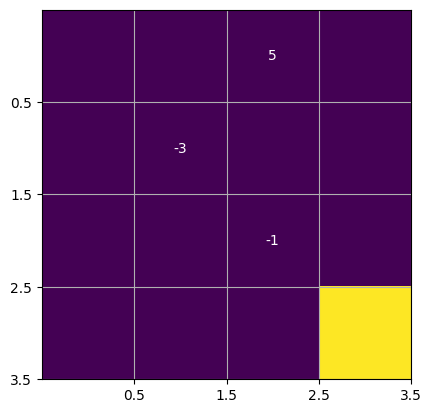

[[13.04778261  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.53072698  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97305367  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40885667  0.        ]
 [ 0.          0.          9.69998934  0.        ]
 [ 0.          0.          9.99999991  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


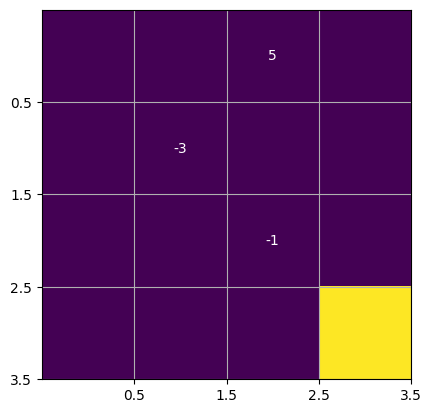

[[13.0685787   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.53697345  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97400874  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40889258  0.        ]
 [ 0.          0.          9.69999219  0.        ]
 [ 0.          0.          9.99999994  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


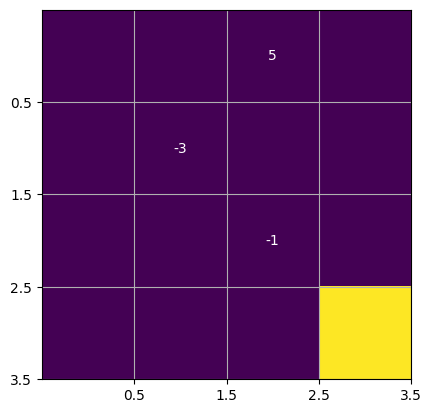

[[13.0853958   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.54178351  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97471535  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40891954  0.        ]
 [ 0.          0.          9.69999428  0.        ]
 [ 0.          0.          9.99999995  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


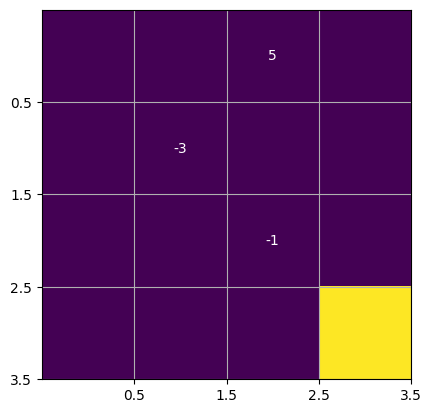

[[13.09893203  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.54547991  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97523823  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40893977  0.        ]
 [ 0.          0.          9.69999582  0.        ]
 [ 0.          0.          9.99999997  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


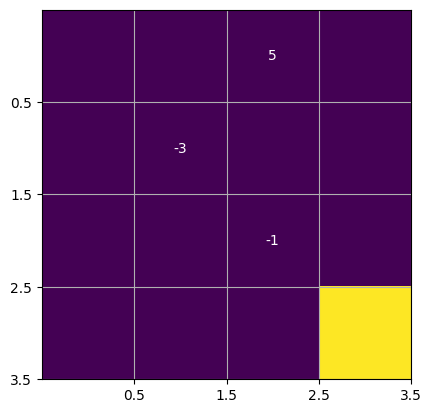

[[13.10978157  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.54831523  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97562523  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40895493  0.        ]
 [ 0.          0.          9.69999694  0.        ]
 [ 0.          0.          9.99999998  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


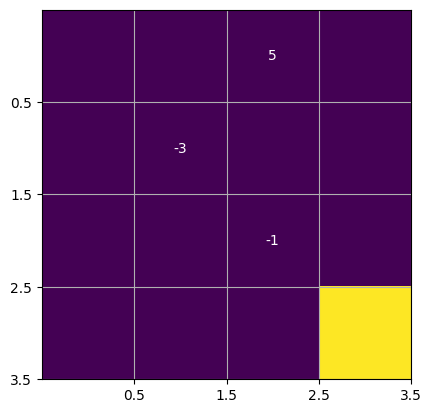

[[13.11844431  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55048636  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97591172  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.4089663   0.        ]
 [ 0.          0.          9.69999776  0.        ]
 [ 0.          0.          9.99999998  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


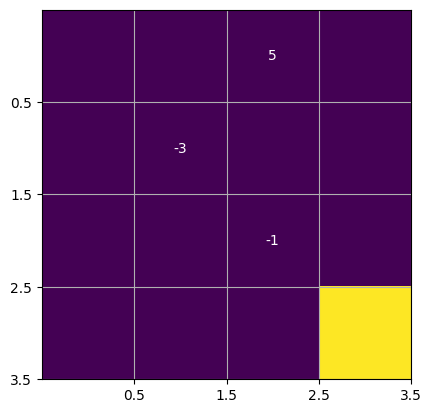

[[13.12533672  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55214632  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97612383  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40897481  0.        ]
 [ 0.          0.          9.69999836  0.        ]
 [ 0.          0.          9.99999999  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


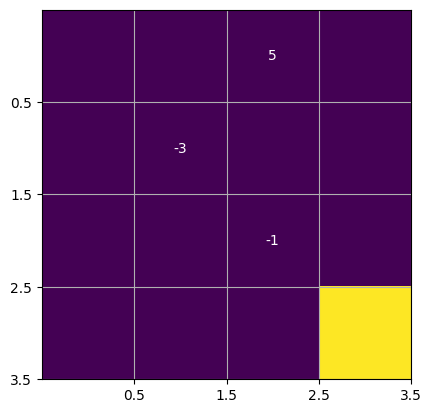

[[13.13080293  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55341365  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.9762809   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40898118  0.        ]
 [ 0.          0.          9.6999988   0.        ]
 [ 0.          0.          9.99999999  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


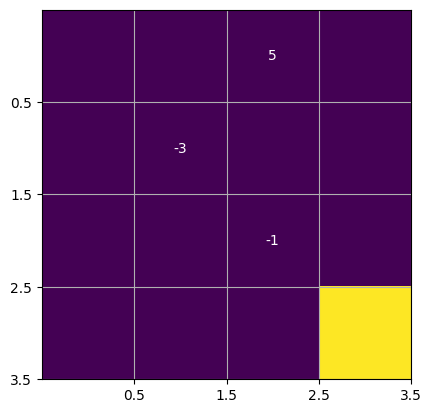

[[13.13512517  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55437993  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97639723  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40898595  0.        ]
 [ 0.          0.          9.69999912  0.        ]
 [ 0.          0.          9.99999999  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


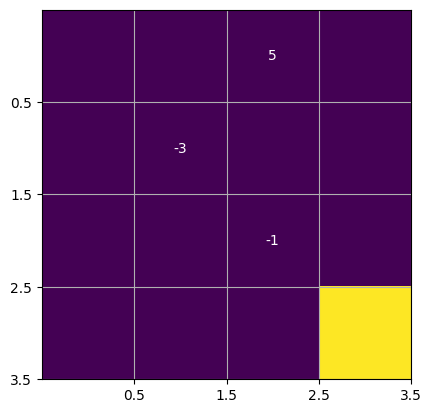

[[13.13853348  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55511578  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97648339  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40898951  0.        ]
 [ 0.          0.          9.69999936  0.        ]
 [ 0.          0.          9.99999999  1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


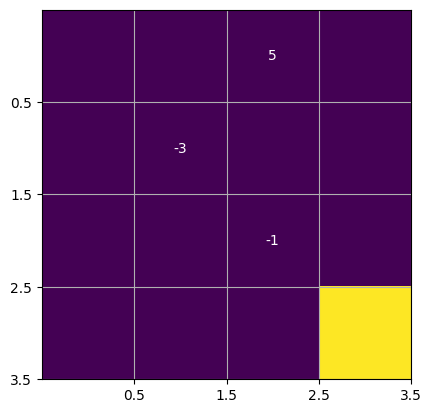

[[13.14121426  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55567552  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97654723  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899217  0.        ]
 [ 0.          0.          9.69999953  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


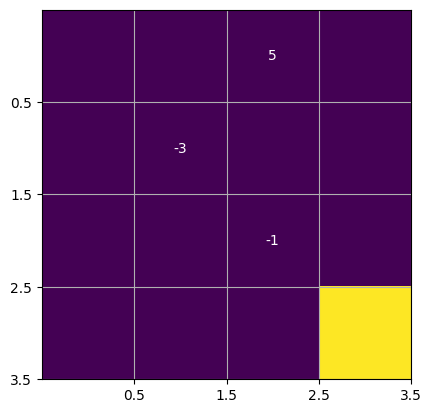

[[13.14331783  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55610085  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97659453  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899416  0.        ]
 [ 0.          0.          9.69999965  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


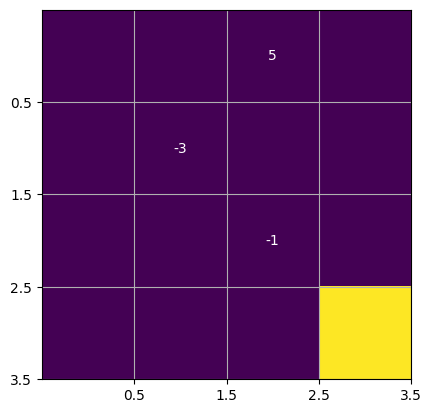

[[13.14496483  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55642373  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97662958  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899565  0.        ]
 [ 0.          0.          9.69999975  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


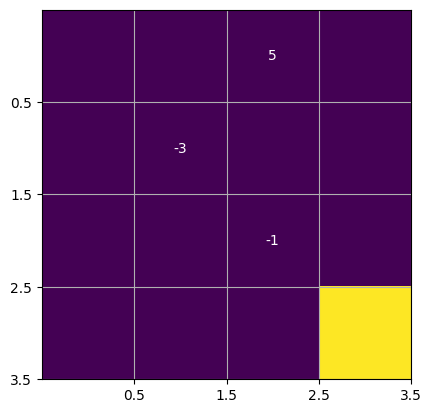

[[13.1462517   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55666861  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97665555  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899676  0.        ]
 [ 0.          0.          9.69999981  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


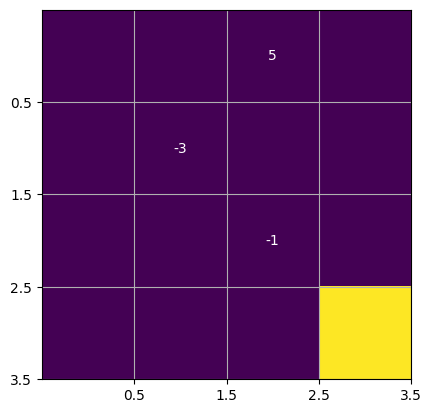

[[13.14725525  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55685417  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.9766748   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899758  0.        ]
 [ 0.          0.          9.69999986  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


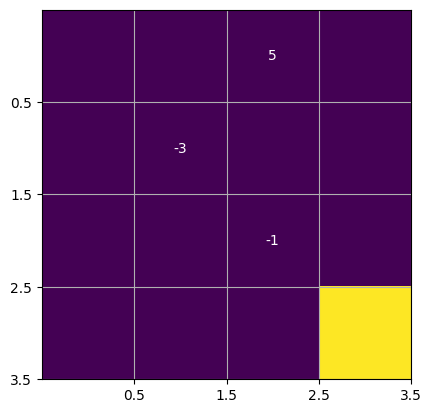

[[13.14803644  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55699468  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97668907  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.4089982   0.        ]
 [ 0.          0.          9.6999999   0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


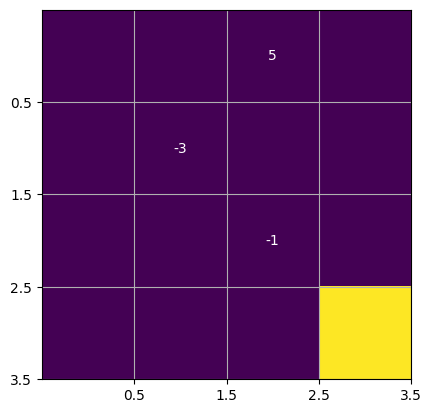

[[13.14864351  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55710098  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97669965  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899866  0.        ]
 [ 0.          0.          9.69999993  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


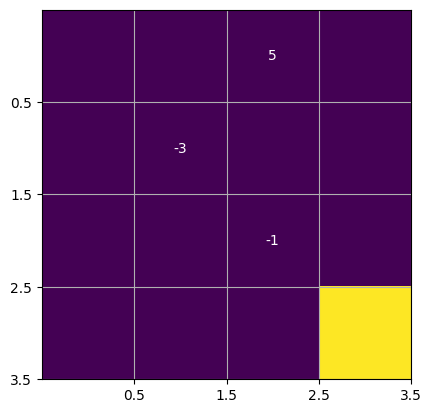

[[13.14911451  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55718136  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.9767075   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.408999    0.        ]
 [ 0.          0.          9.69999995  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


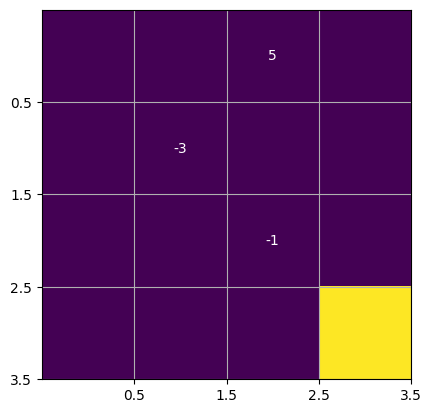

[[13.14947939  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55724208  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97671331  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899926  0.        ]
 [ 0.          0.          9.69999996  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


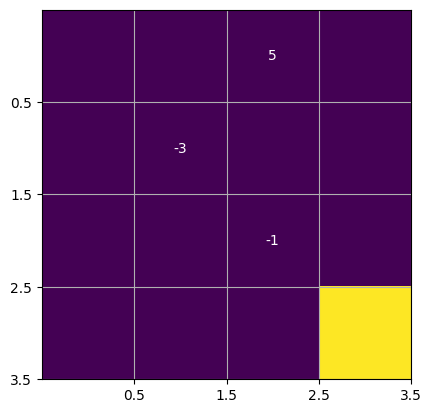

[[13.14976166  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55728794  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97671762  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899945  0.        ]
 [ 0.          0.          9.69999997  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


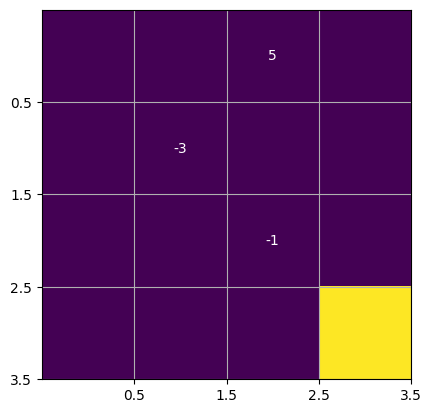

[[13.14997972  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55732254  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672082  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899959  0.        ]
 [ 0.          0.          9.69999998  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


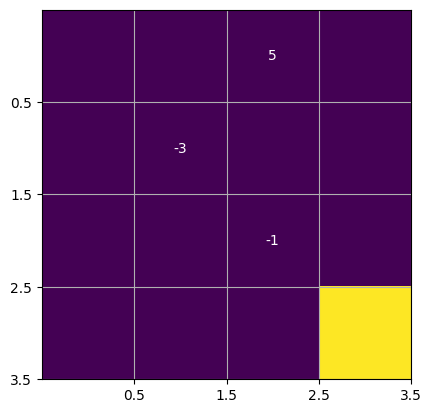

[[13.15014797  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55734864  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672319  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.4089997   0.        ]
 [ 0.          0.          9.69999998  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


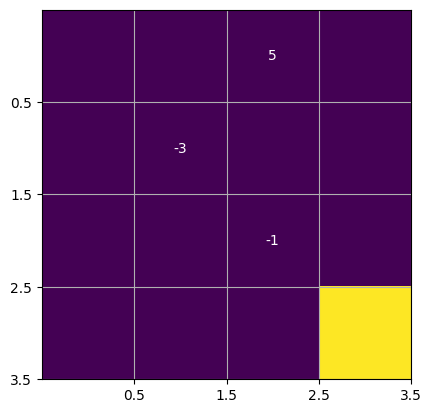

[[13.15027762  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55736831  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672495  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899977  0.        ]
 [ 0.          0.          9.69999999  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


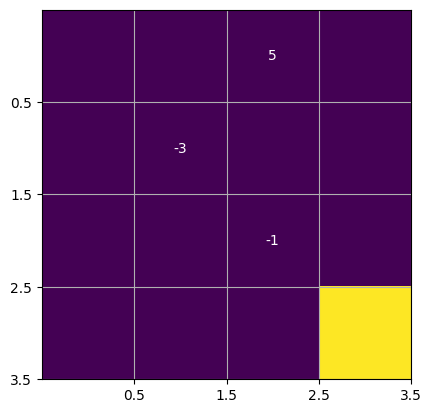

[[13.15037743  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55738313  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672625  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899983  0.        ]
 [ 0.          0.          9.69999999  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


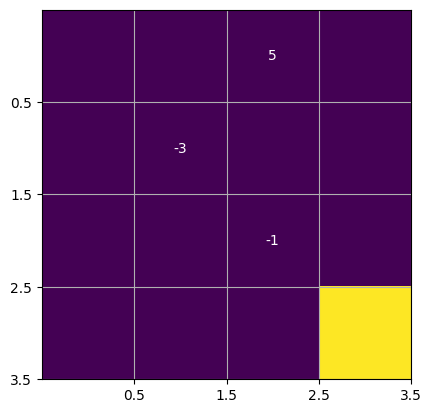

[[13.15045416  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55739429  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672722  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899988  0.        ]
 [ 0.          0.          9.69999999  0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


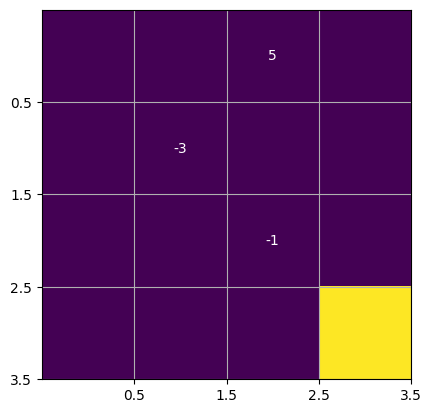

[[13.1505131   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55740269  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672794  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899991  0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


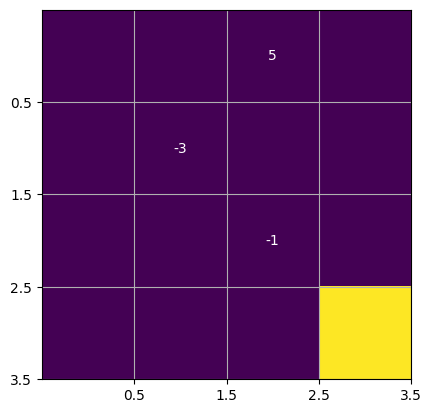

[[13.15055833  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55740901  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672847  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899993  0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


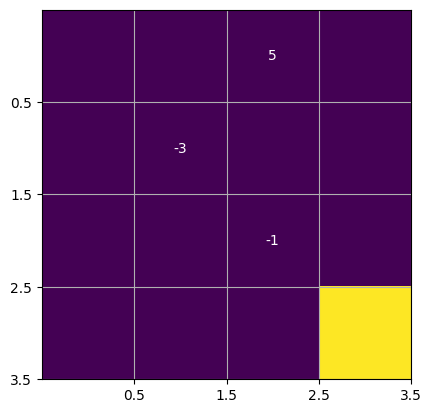

[[13.150593    0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55741377  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672887  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899995  0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


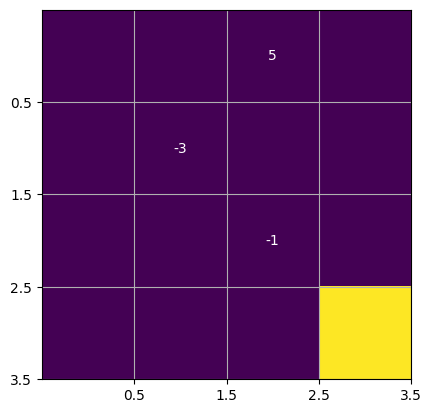

[[13.15061956  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55741734  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672916  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899996  0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


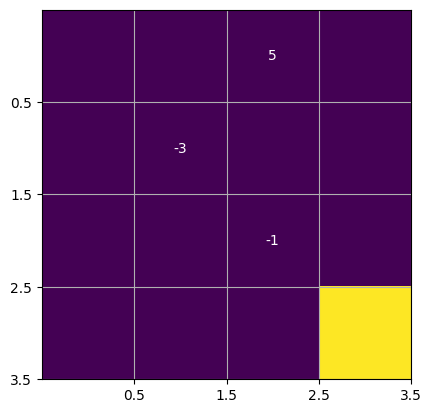

[[13.15063988  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742002  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672938  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899997  0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


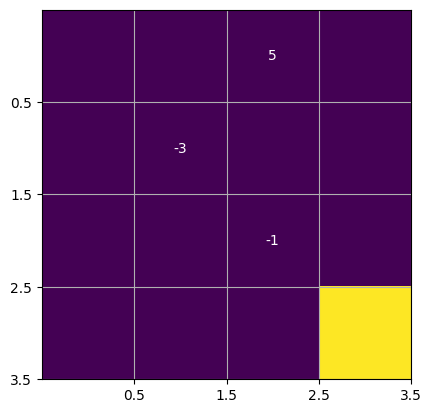

[[13.15065541  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742204  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672954  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899998  0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


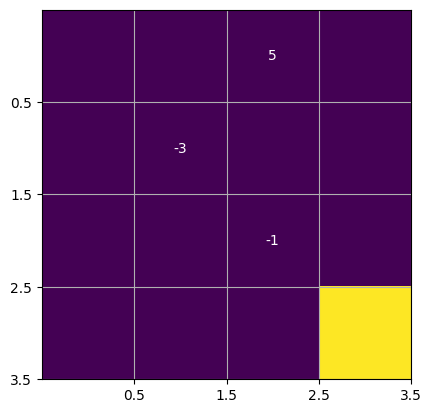

[[13.15066729  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742356  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672966  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899998  0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


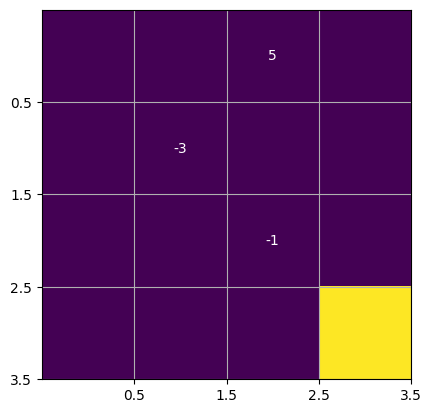

[[13.15067635  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742469  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672975  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899999  0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


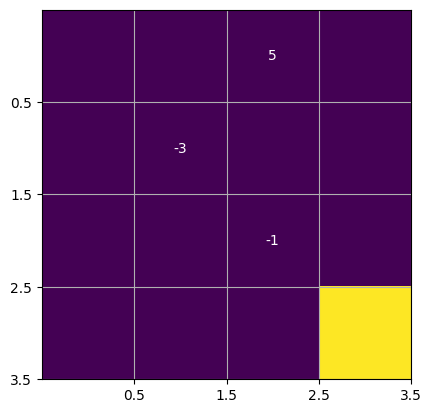

[[13.15068326  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742555  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672981  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899999  0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


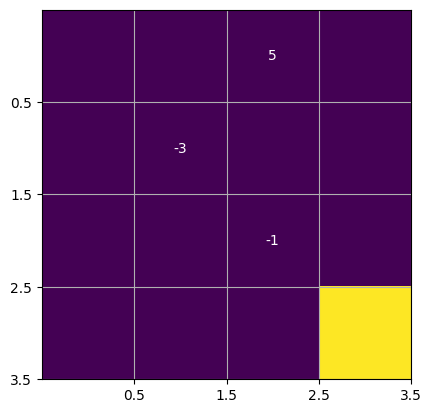

[[13.15068853  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742619  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672986  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.40899999  0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


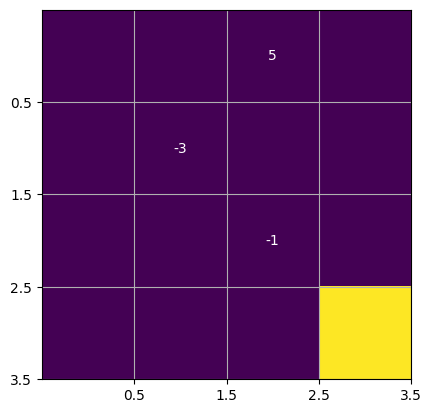

[[13.15069255  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742667  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.9767299   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


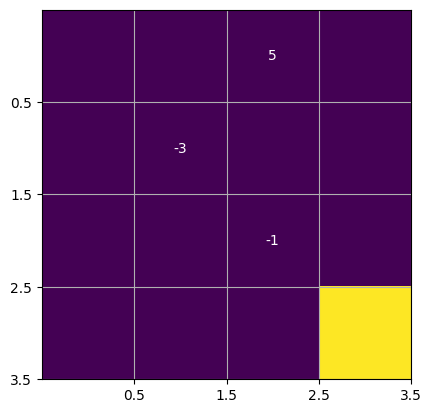

[[13.1506956   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742703  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672992  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


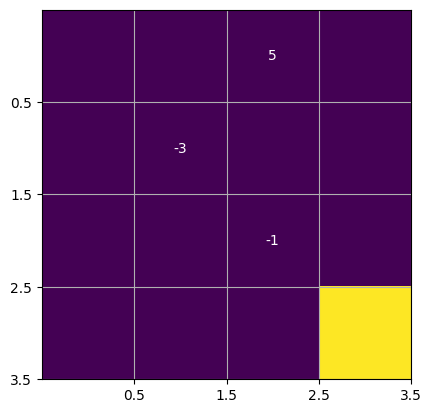

[[13.15069793  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5574273   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672994  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


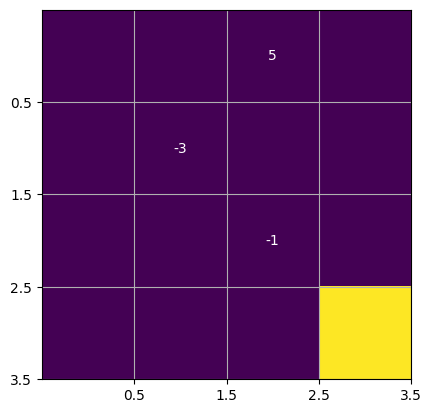

[[13.1506997   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5574275   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672996  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


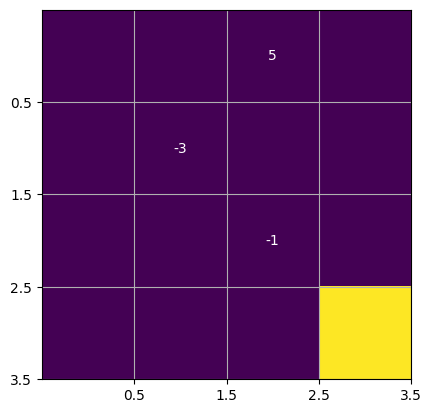

[[13.15070104  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742765  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672997  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


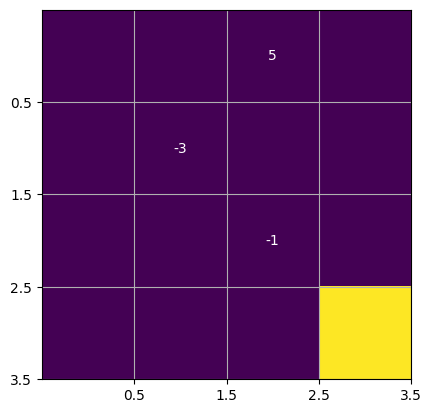

[[13.15070206  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742776  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672998  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


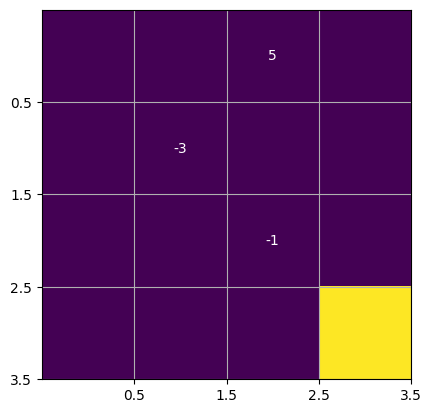

[[13.15070284  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742785  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672998  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


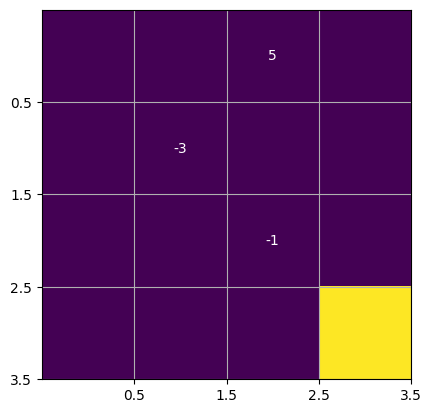

[[13.15070342  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742791  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672999  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


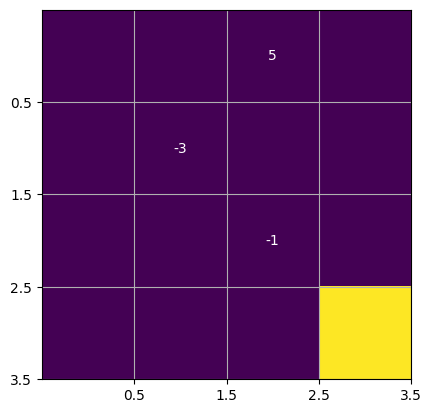

[[13.15070387  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742796  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672999  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


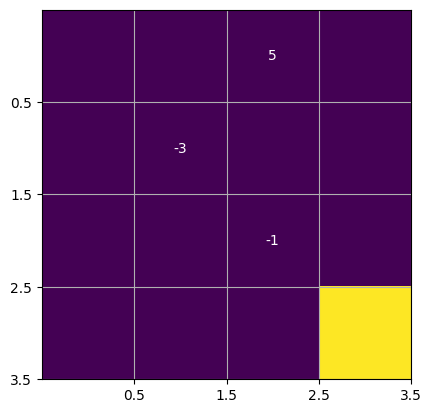

[[13.15070421  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742799  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672999  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


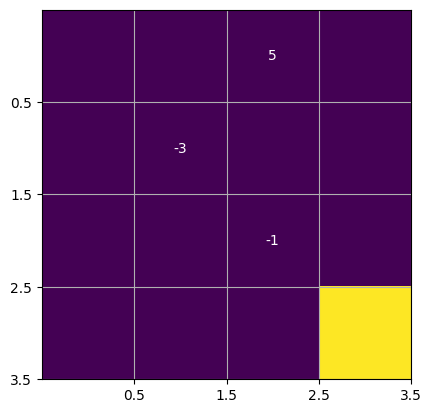

[[13.15070446  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742802  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672999  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


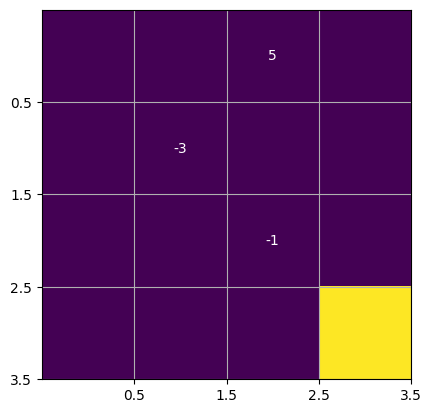

[[13.15070466  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742804  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


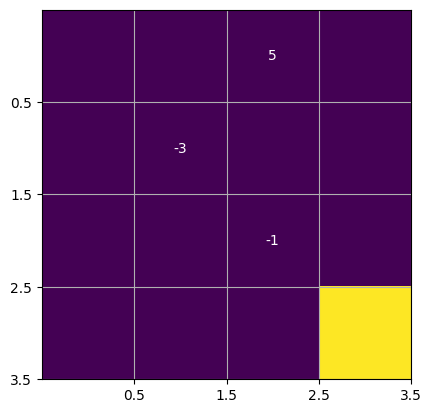

[[13.1507048   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742806  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


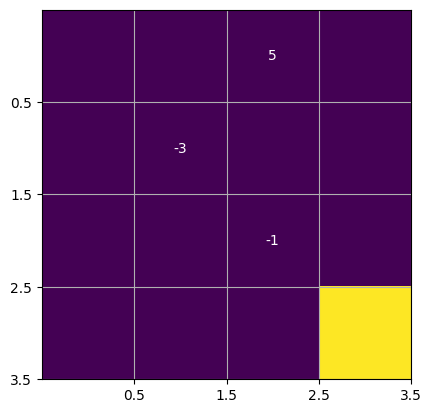

[[13.15070491  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742807  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


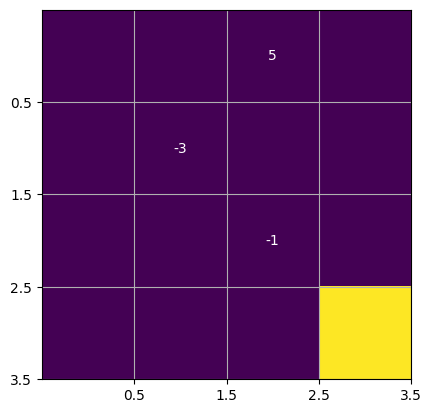

[[13.150705    0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742808  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


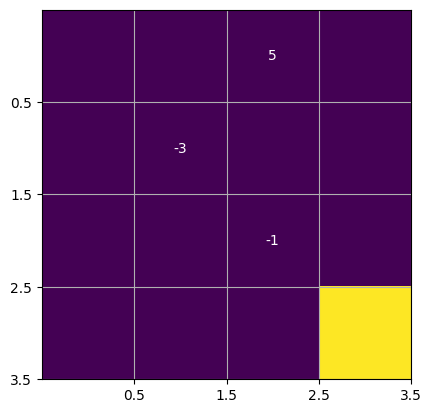

[[13.15070506  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742808  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


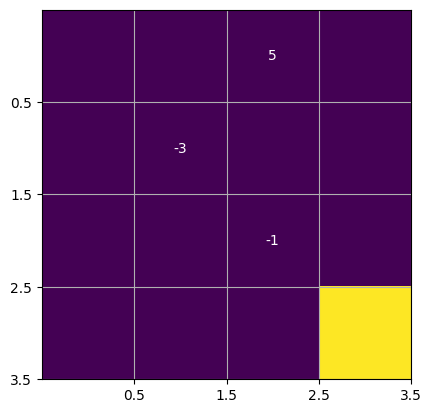

[[13.15070511  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742809  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


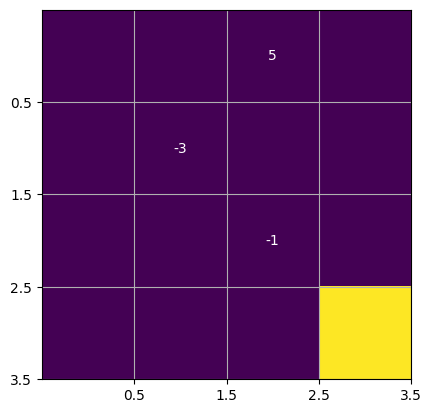

[[13.15070515  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742809  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


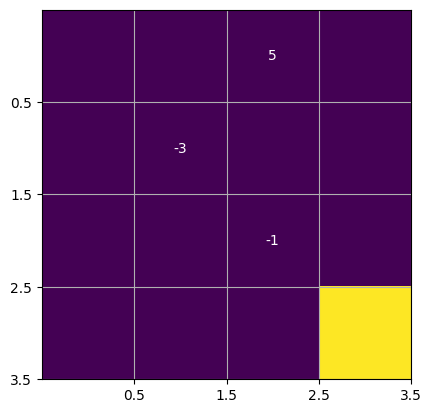

[[13.15070517  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742809  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


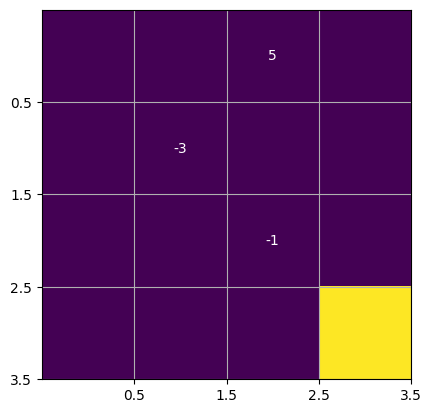

[[13.15070519  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742809  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


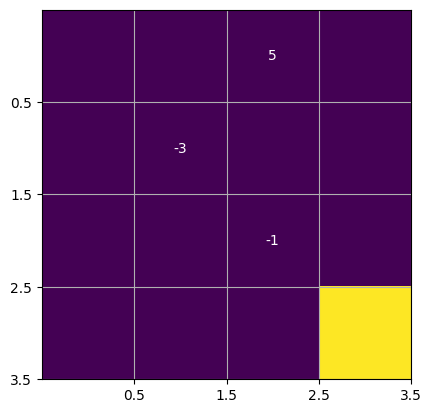

[[13.15070521  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5574281   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


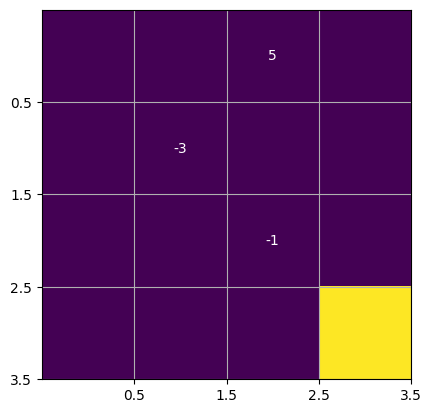

[[13.15070522  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5574281   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


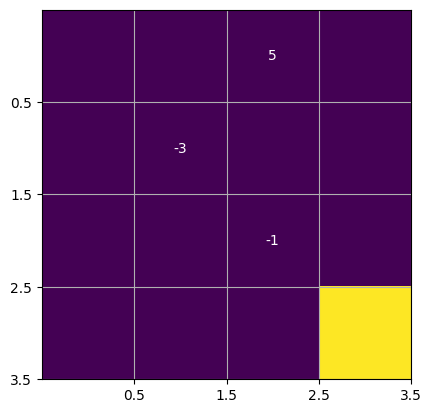

[[13.15070523  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5574281   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


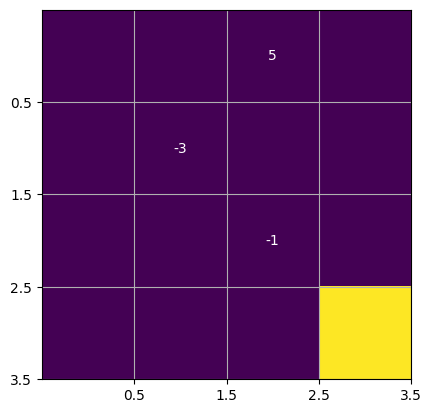

[[13.15070524  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5574281   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


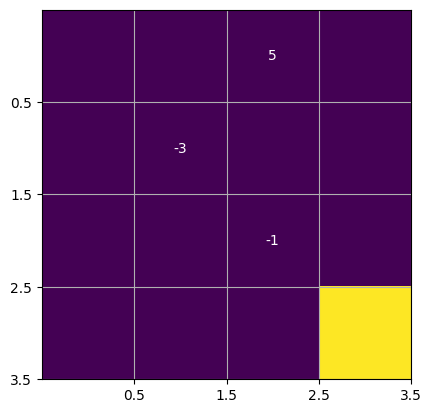

[[13.15070524  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5574281   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


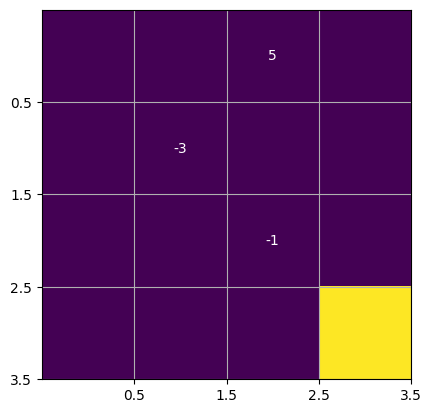

[[13.15070525  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5574281   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


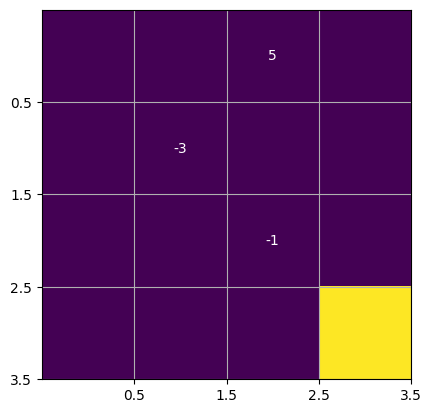

[[13.15070525  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5574281   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.74633158  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


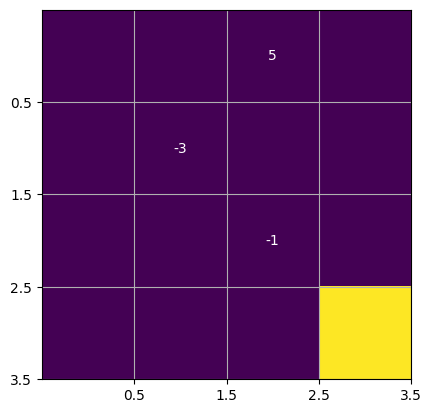

[[13.15070525  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5574281   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.18417714  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


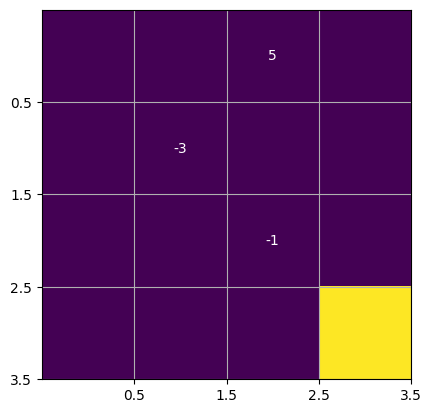

[[13.15070525  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.82605851  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.93816641  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


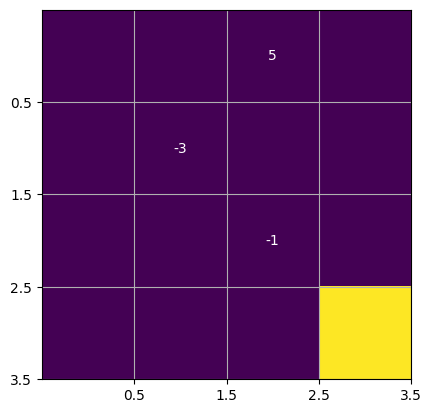

[[12.95915956  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.48962849  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.48857858  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


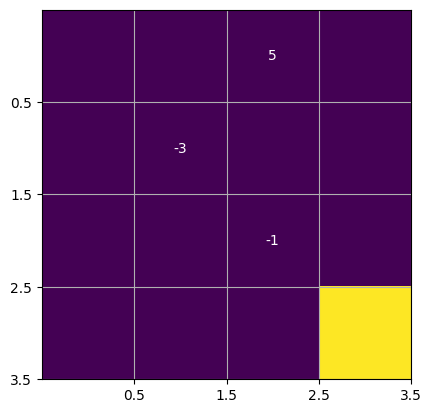

[[12.73122018  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.38818753  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.89037946  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


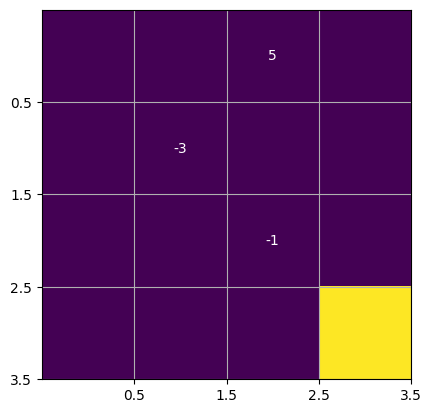

[[12.53825704  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.41936728  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.18369411  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


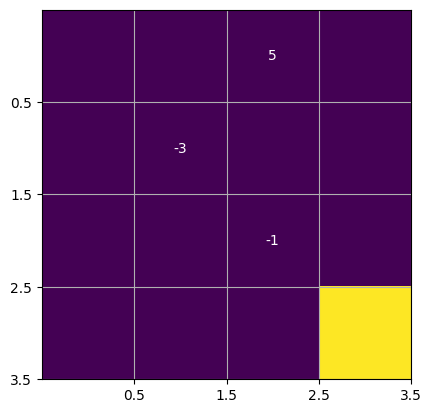

[[12.40555993  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.5189476   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.3978138   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


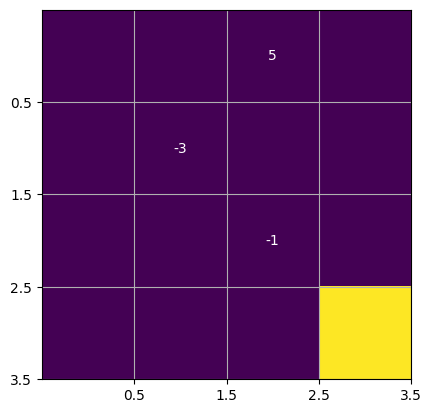

[[12.33477113  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.64771918  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55412117  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


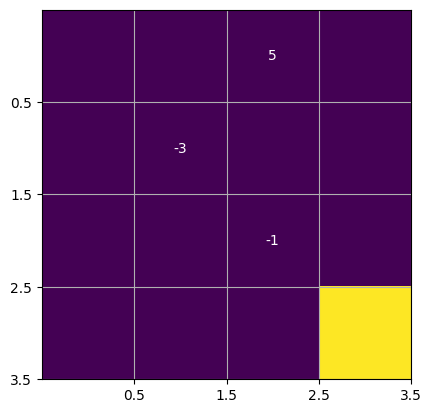

[[12.31682058  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.78265934  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.66822556  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


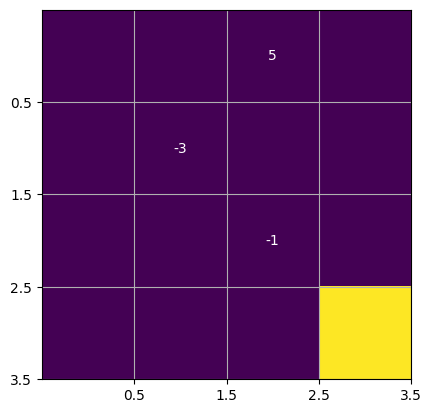

[[12.3390575   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.91104959  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.75152176  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


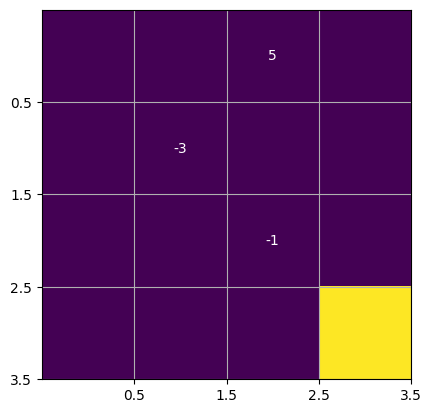

[[12.38891586  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.02658975  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.81232798  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


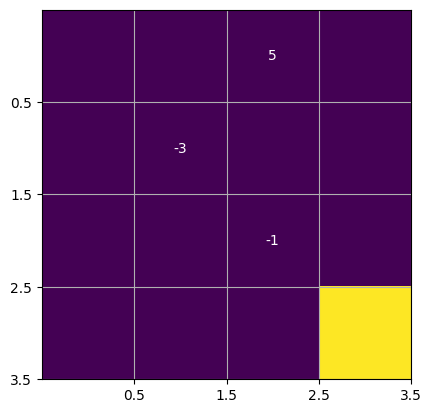

[[12.45557244  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.12685922  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.85671653  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


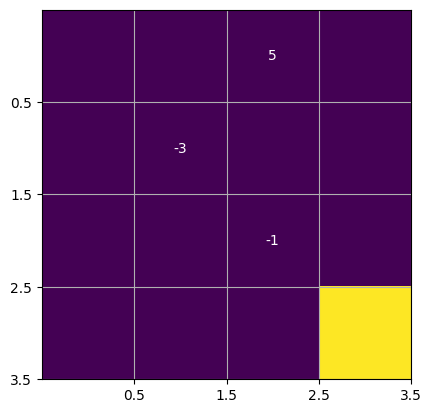

[[12.53049231  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.21168129  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.88912016  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


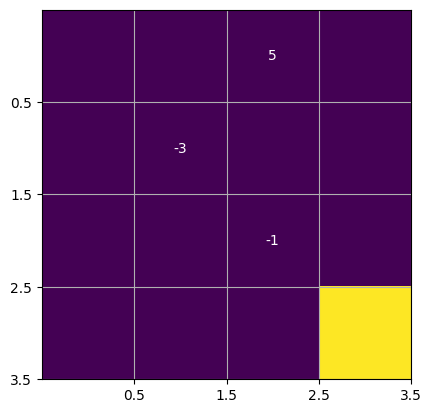

[[12.60739871  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.28208791  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.91277482  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


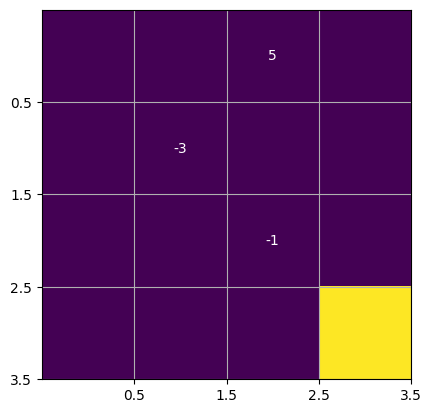

[[12.68197988  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.3396799   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.93004272  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


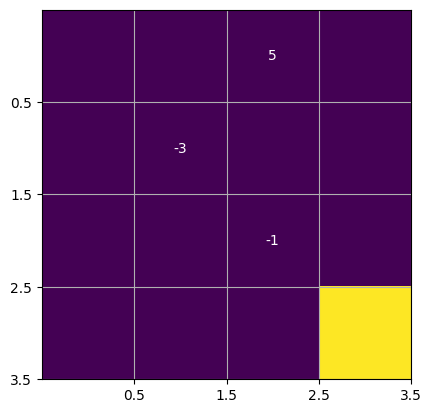

[[12.75150748  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.38624451  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.94264828  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


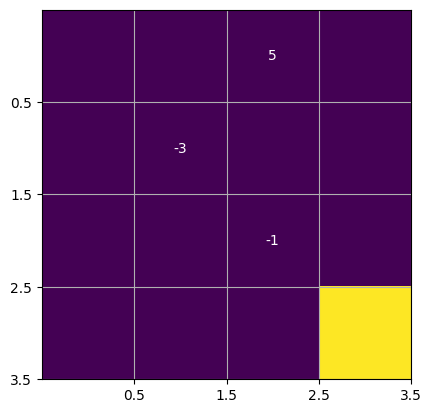

[[12.8144579   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.42353808  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.95185035  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


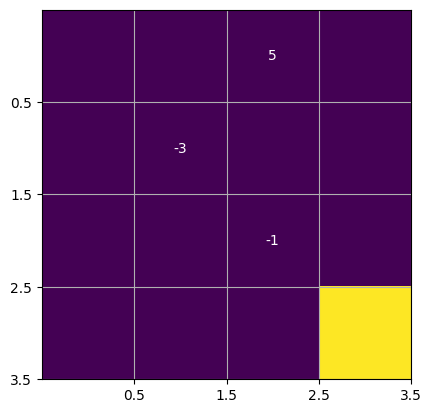

[[12.87017889  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.45317241  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.95856785  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


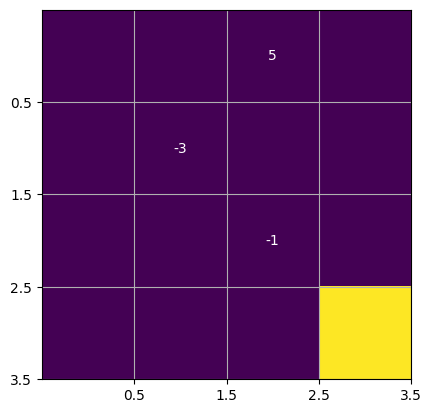

[[12.91861644  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.47656478  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.96347163  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


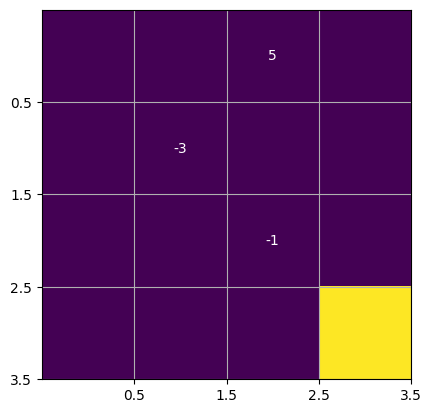

[[12.96010232  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.49492551  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.96705139  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


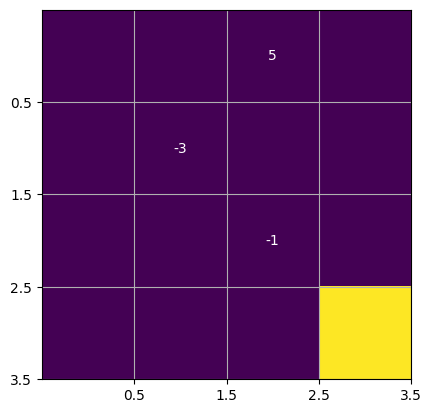

[[12.99519568  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.50926638  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.96966462  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


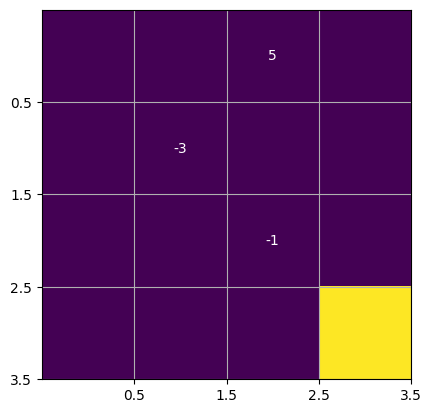

[[13.02456971  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.52041962  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97157227  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


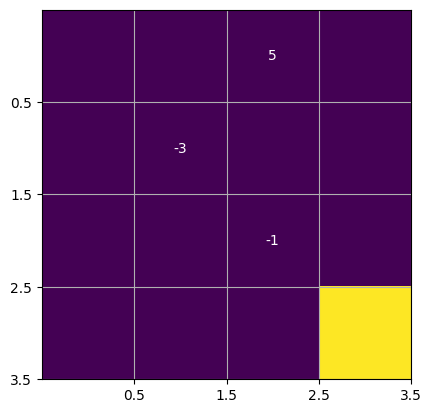

[[13.04893379  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5290611   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97296486  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


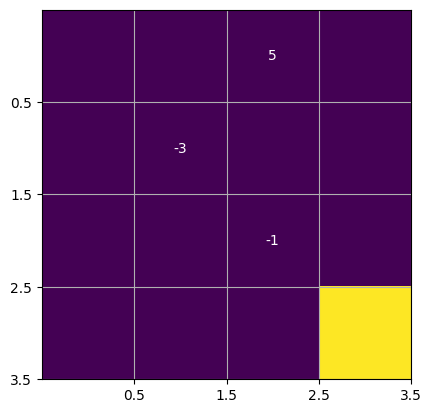

[[13.06898277  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5357341   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97398145  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


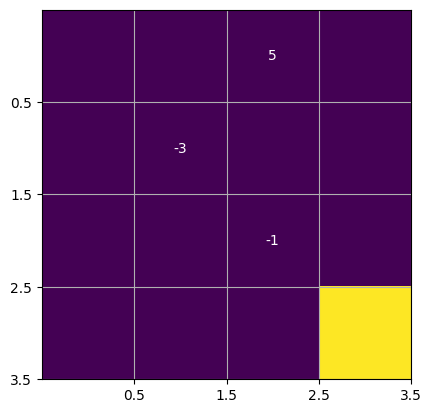

[[13.08536618  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.54087163  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97472356  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


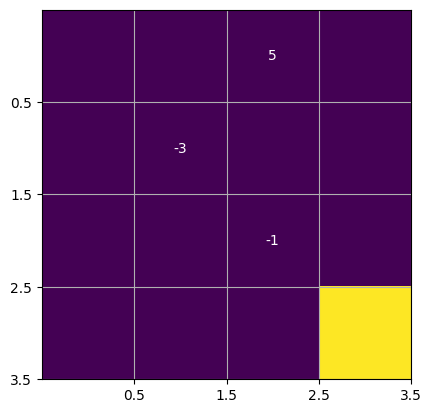

[[13.09867159  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.54481639  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.9752653   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


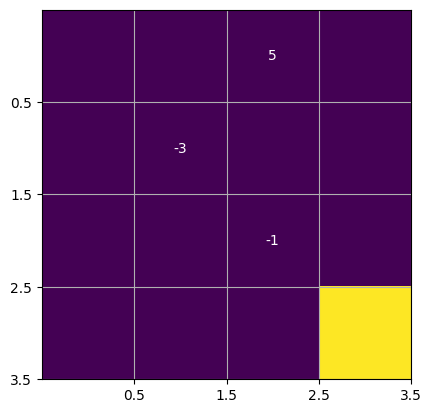

[[13.10941768  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.54783795  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97566077  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


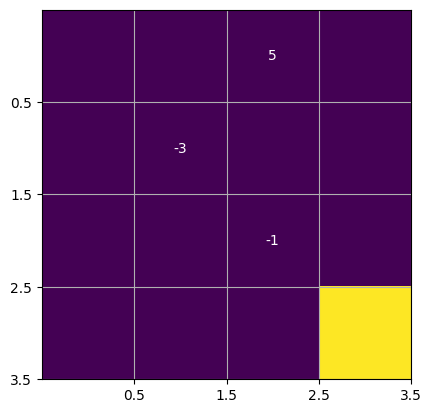

[[13.11805366  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55014726  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97594946  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


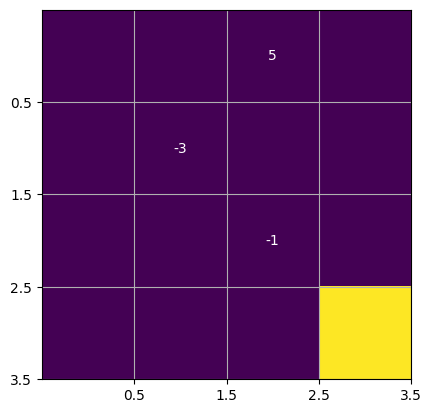

[[13.12496274  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55190866  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97616021  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


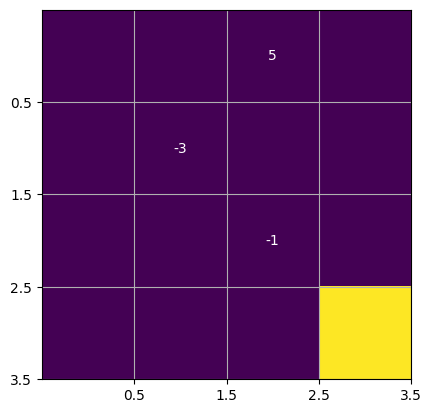

[[13.13046768  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55324968  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97631405  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


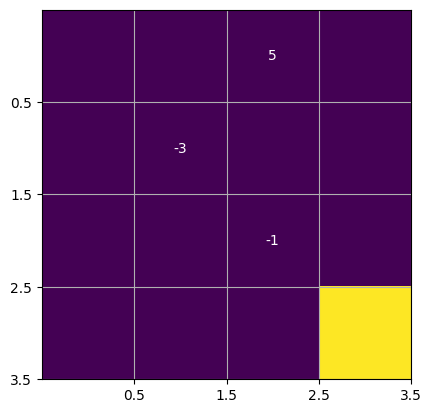

[[13.1348375   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55426892  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97642636  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


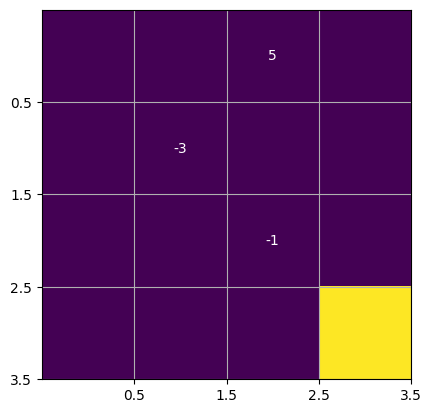

[[13.1382944   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55504237  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97650834  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


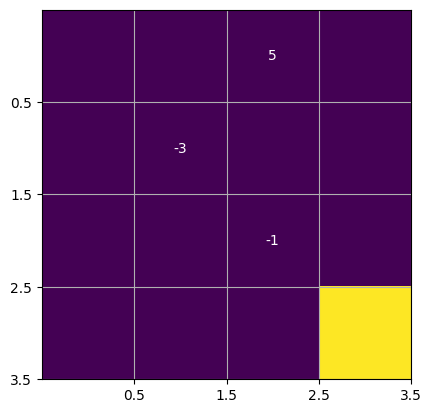

[[13.14102051  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55562847  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97656819  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


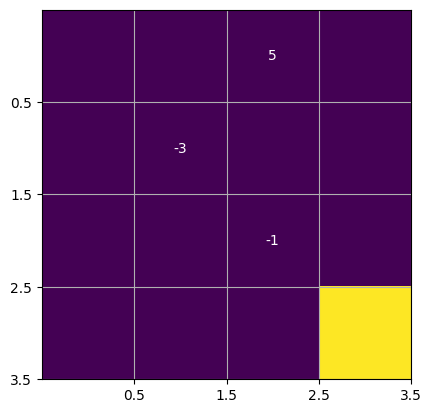

[[13.14316407  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55607199  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97661188  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


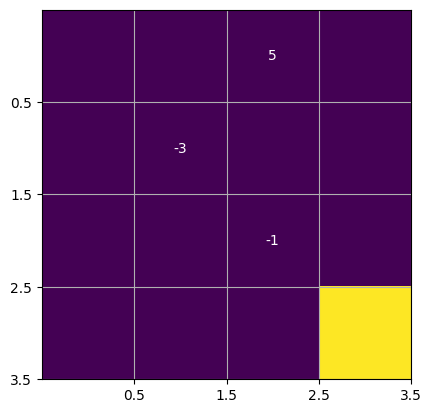

[[13.14484502  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5564072   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97664377  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


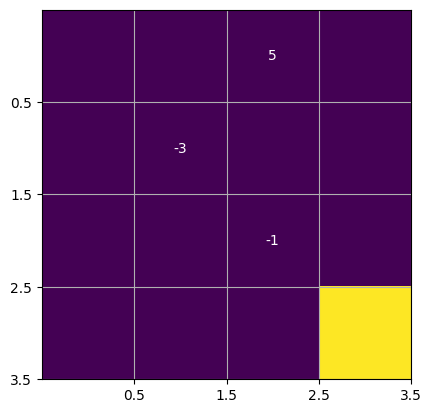

[[13.14615991  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55666026  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97666705  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


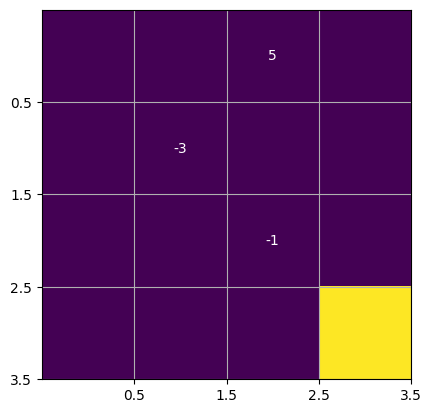

[[13.14718606  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55685109  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97668405  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


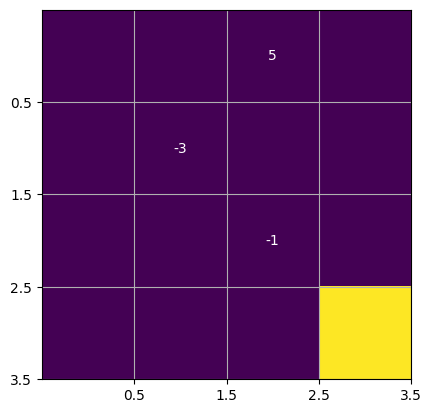

[[13.14798512  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55699485  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97669646  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


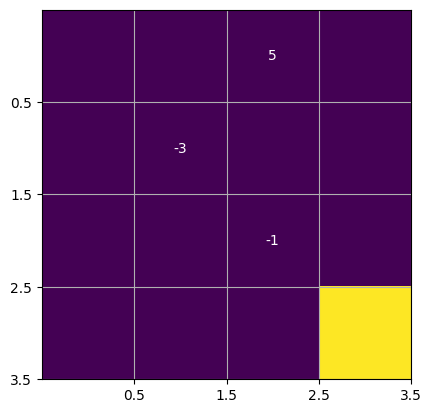

[[13.14860609  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55710304  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97670551  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


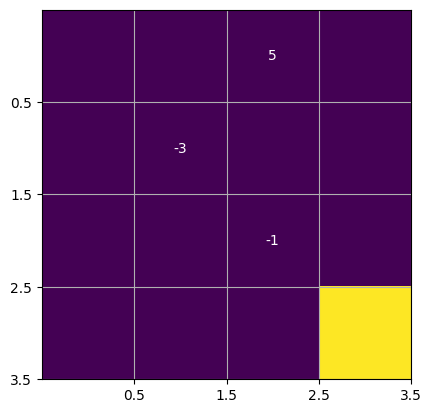

[[13.14908773  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55718439  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97671212  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


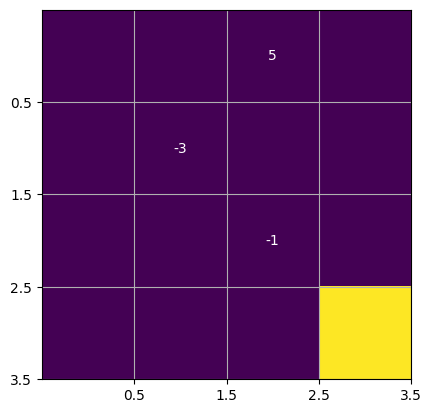

[[13.14946064  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55724551  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97671695  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


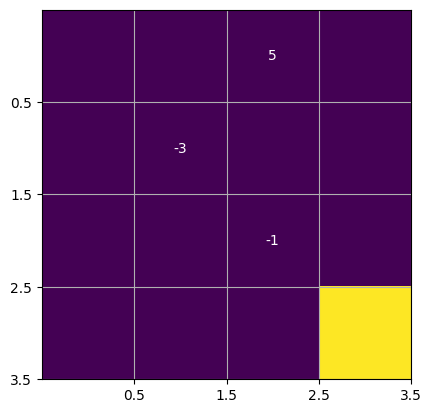

[[13.14974887  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55729139  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672047  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


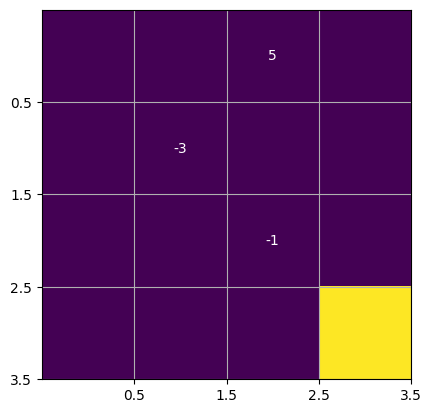

[[13.14997129  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55732581  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672305  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


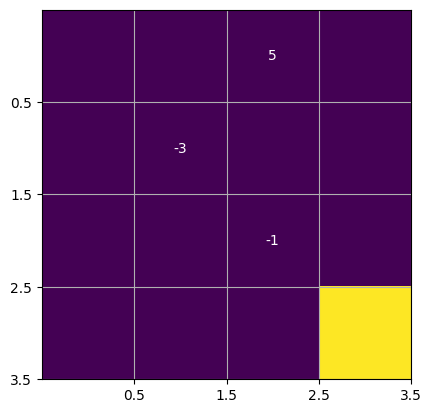

[[13.15014267  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55735161  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672492  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


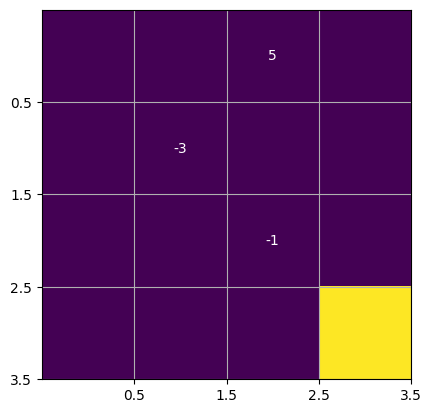

[[13.15027453  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55737093  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672629  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


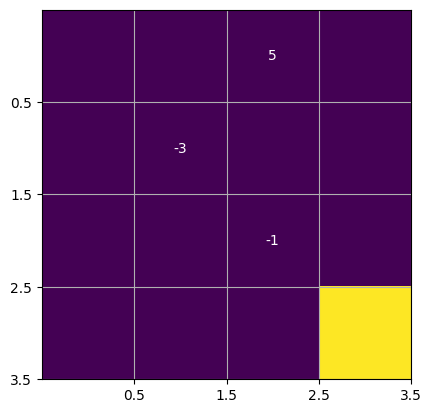

[[13.15037586  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5573854   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672729  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


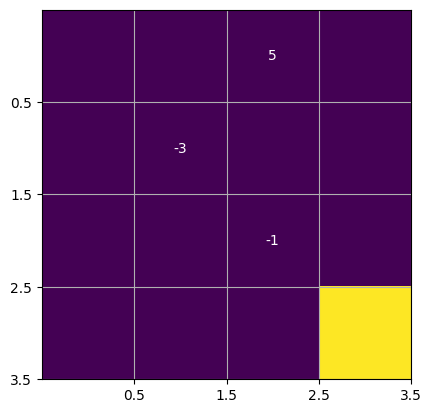

[[13.15045361  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55739622  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672803  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


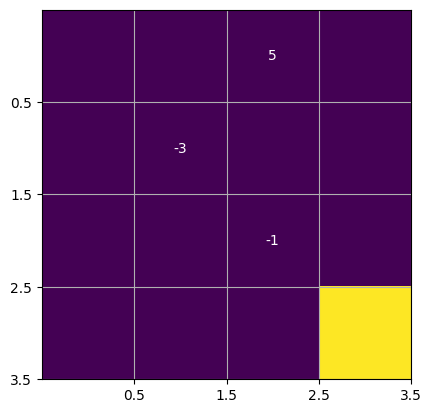

[[13.15051321  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55740431  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672856  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


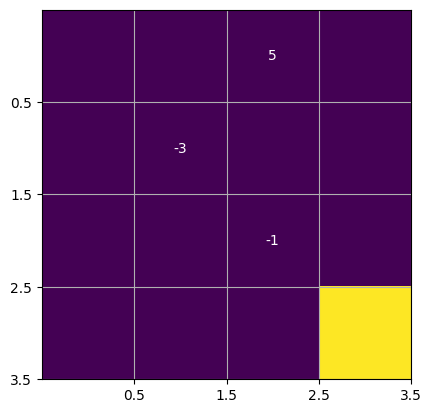

[[13.15055883  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55741035  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672895  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


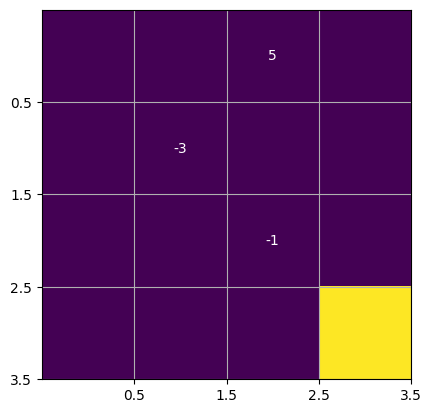

[[13.15059372  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55741487  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672923  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


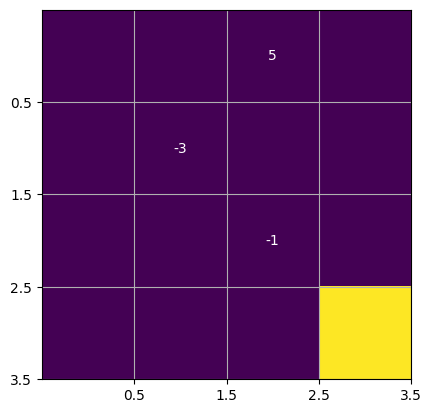

[[13.15062037  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55741824  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672944  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


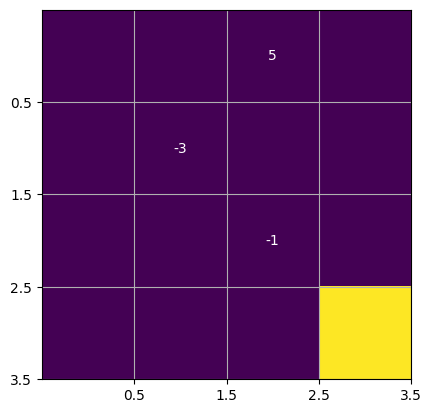

[[13.15064071  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742076  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672959  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


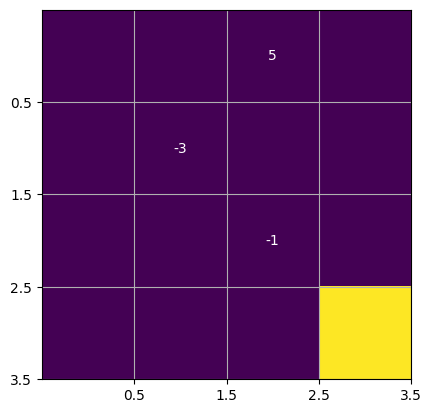

[[13.15065621  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742263  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.9767297   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


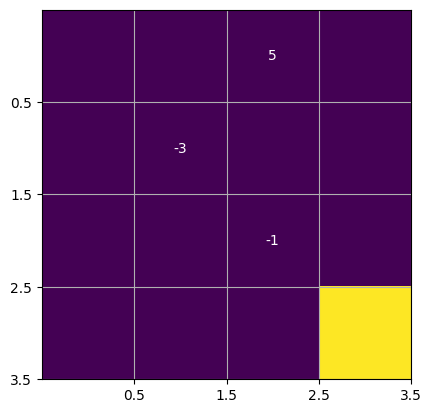

[[13.15066802  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742403  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672978  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


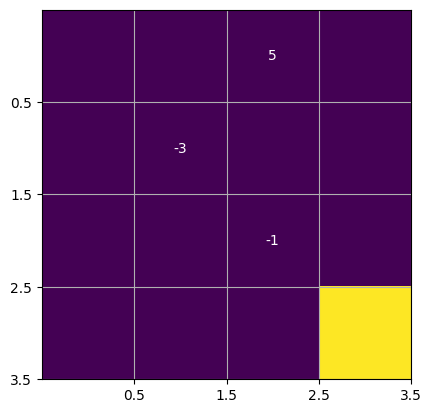

[[13.15067701  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742507  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672984  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


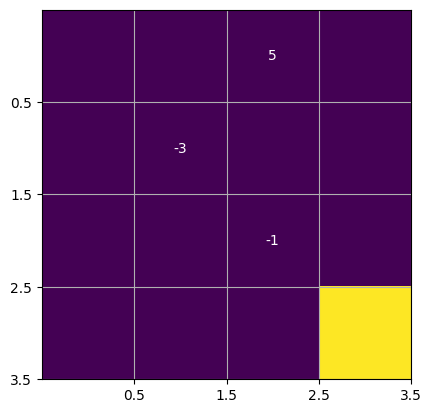

[[13.15068384  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742585  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672988  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


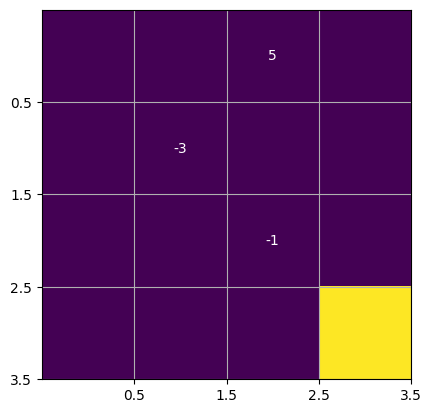

[[13.15068903  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742643  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672992  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


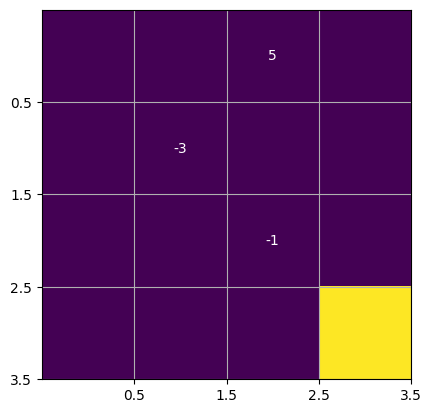

[[13.15069298  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742686  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672994  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


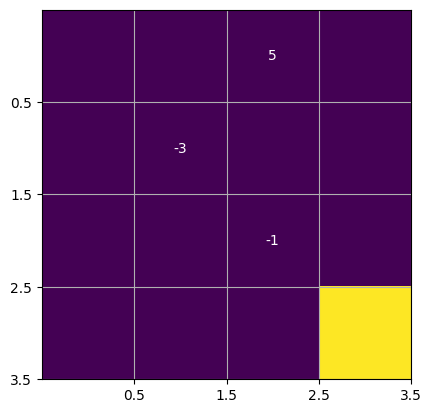

[[13.15069597  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742718  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672995  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


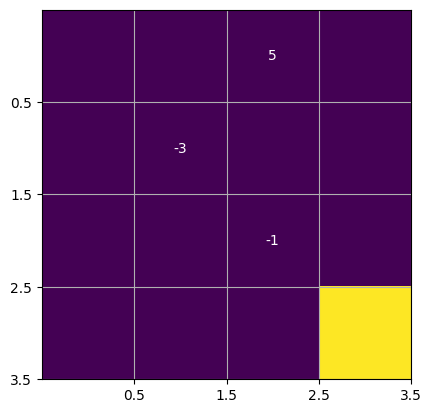

[[13.15069823  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742741  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672997  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


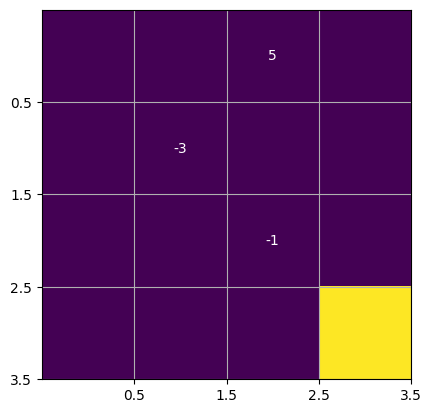

[[13.15069995  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742759  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672998  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


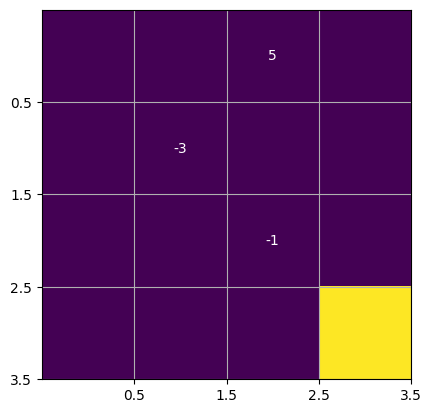

[[13.15070125  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742772  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672998  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


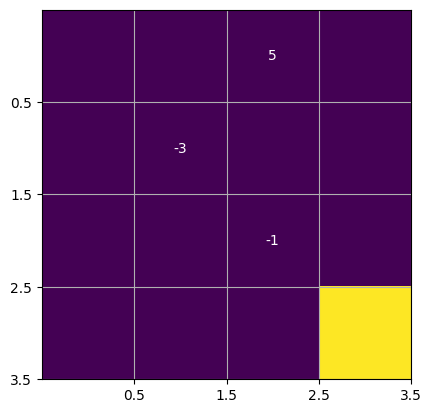

[[13.15070223  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742782  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672999  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


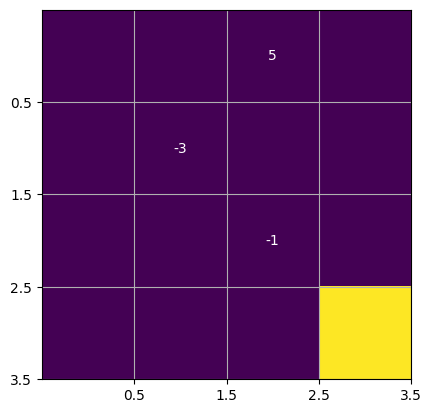

[[13.15070297  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742789  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672999  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


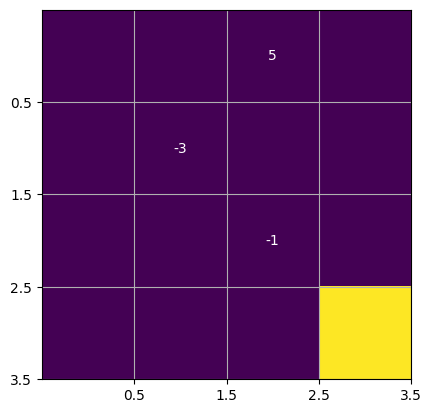

[[13.15070354  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742795  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672999  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


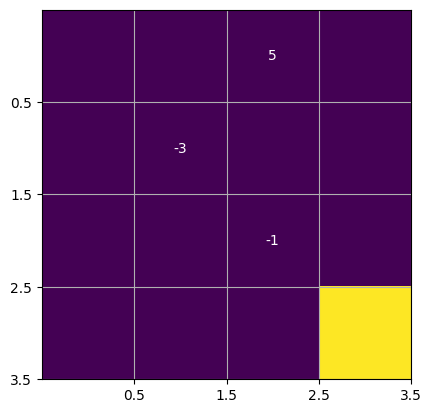

[[13.15070396  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742799  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


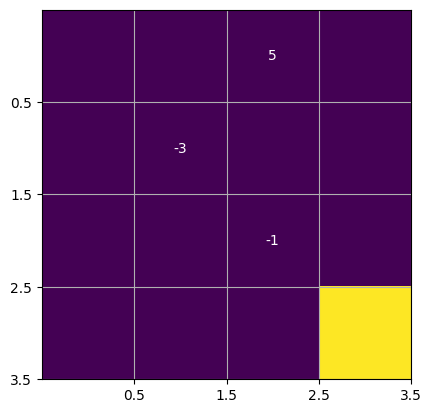

[[13.15070428  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742801  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


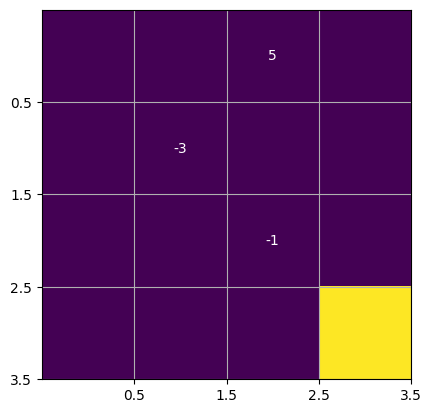

[[13.15070452  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742804  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          9.7         0.        ]
 [ 0.          0.         10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


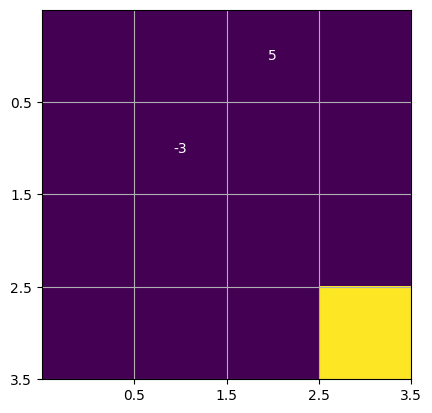

[[13.1507047   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742805  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.409       0.        ]
 [ 0.          0.          7.081       0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


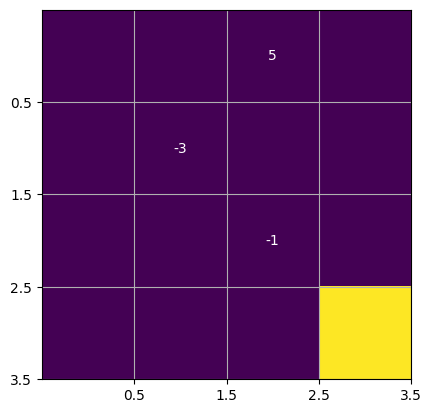

[[13.15070484  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742807  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97673     0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.7230839   0.        ]
 [ 0.          0.          7.78813     0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


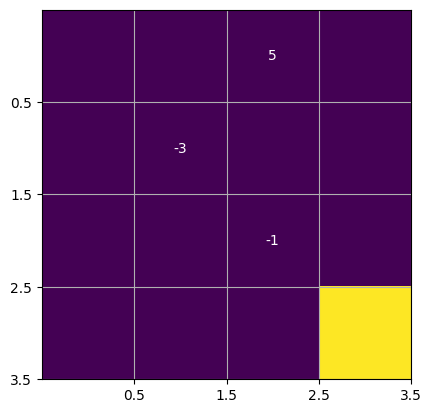

[[13.15070494  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55742807  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.79708857  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.40756249  0.        ]
 [ 0.          0.          8.3043349   0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


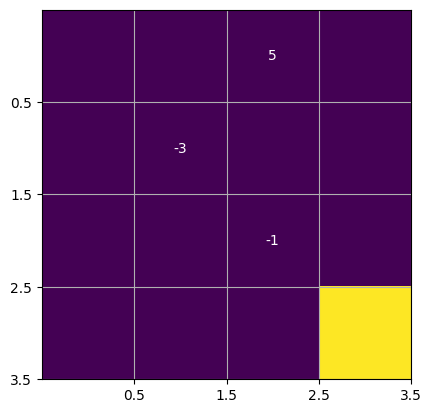

[[13.15070502  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.51037999  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.58331528  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.31242593  0.        ]
 [ 0.          0.          8.68116448  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


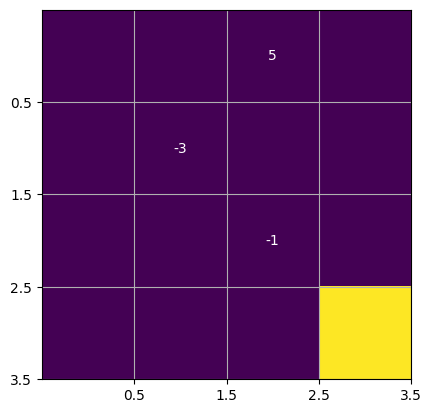

[[13.13838319  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.42004766  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.4023445   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.34166791  0.        ]
 [ 0.          0.          8.95625007  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


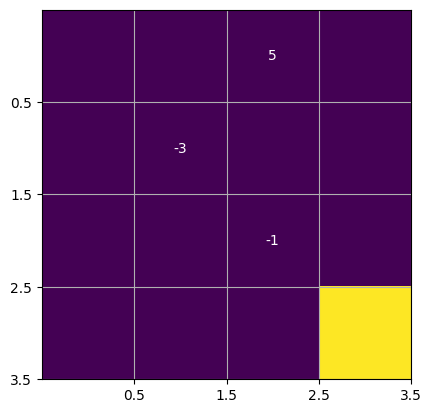

[[13.10573021  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.30670882  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.27789431  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.43505946  0.        ]
 [ 0.          0.          9.15706255  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


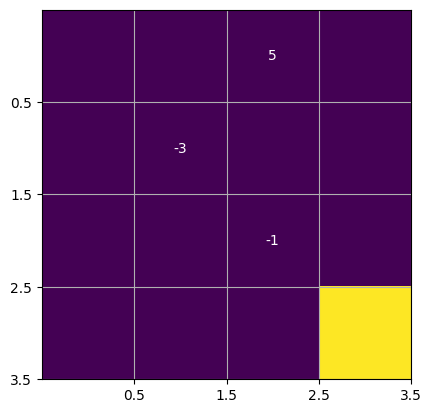

[[13.05221009  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.19137796  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.21150492  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.55582809  0.        ]
 [ 0.          0.          9.30365566  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


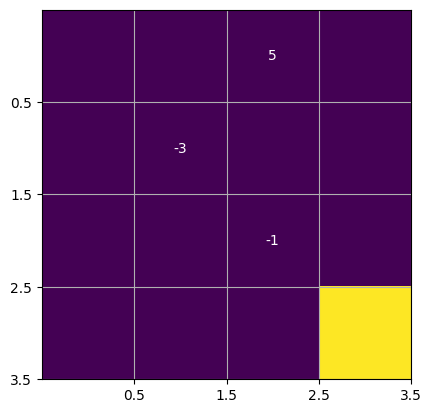

[[12.98293525  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08979905  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.19466997  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.68238192  0.        ]
 [ 0.          0.          9.41066863  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


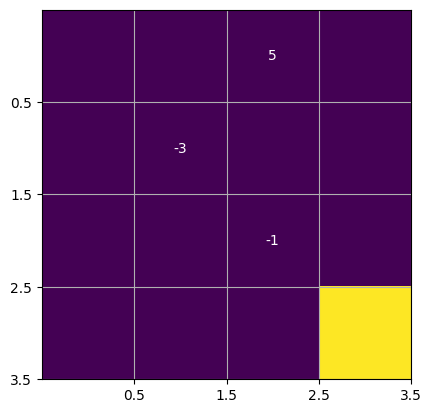

[[12.90576111  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.01123737  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.2155249   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.80279292  0.        ]
 [ 0.          0.          9.4887881   0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


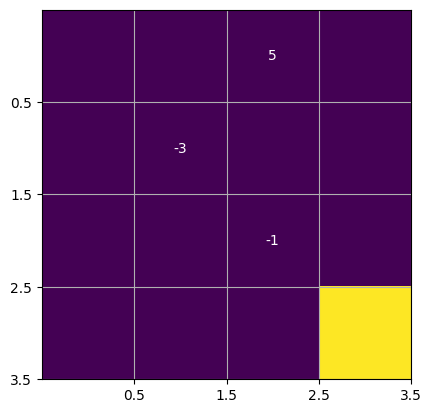

[[12.82884868  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.95934925  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.26228465  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.91115244  0.        ]
 [ 0.          0.          9.54581531  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


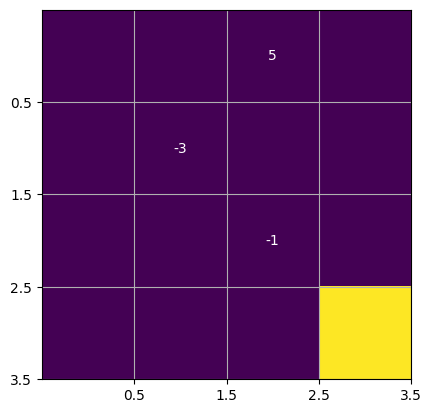

[[12.7591131   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.9337173   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.32479861  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.00519031  0.        ]
 [ 0.          0.          9.58744518  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


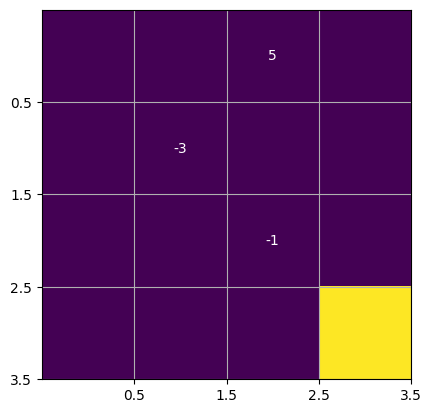

[[12.70149313  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.93137839  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.39506233  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.08474082  0.        ]
 [ 0.          0.          9.61783498  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


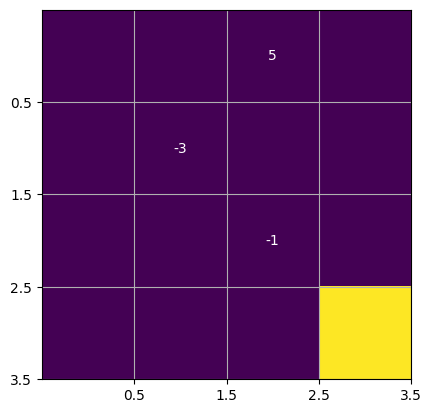

[[12.65881798  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.94807305  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.46718912  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.15077178  0.        ]
 [ 0.          0.          9.64001954  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


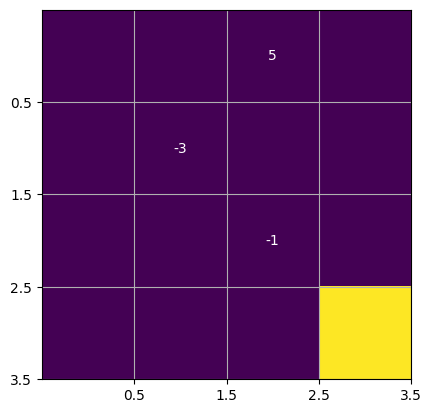

[[12.63203746  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.97915016  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.53713519  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.20478451  0.        ]
 [ 0.          0.          9.65621426  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


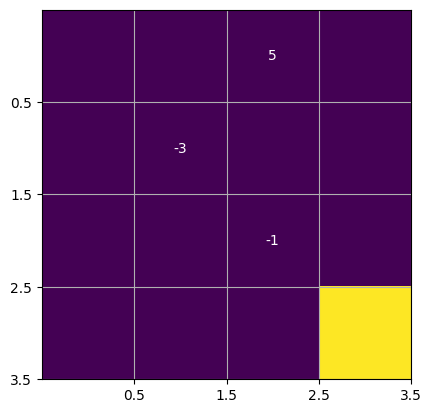

[[12.62062677  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.02015532  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.60234175  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.24845521  0.        ]
 [ 0.          0.          9.66803641  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


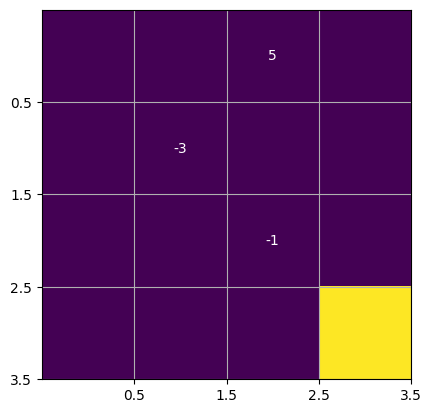

[[12.62303622  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.06716669  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.6613799   0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.28343104  0.        ]
 [ 0.          0.          9.67666658  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


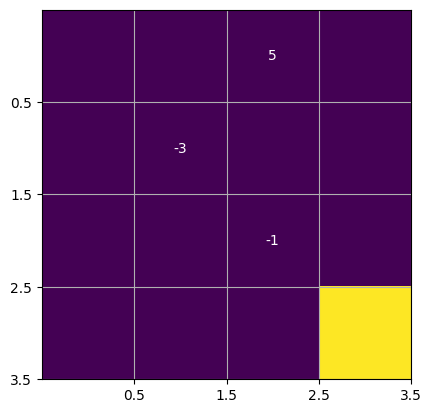

[[12.6371074   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.11694708  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.71363791  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.31122364  0.        ]
 [ 0.          0.          9.6829666   0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


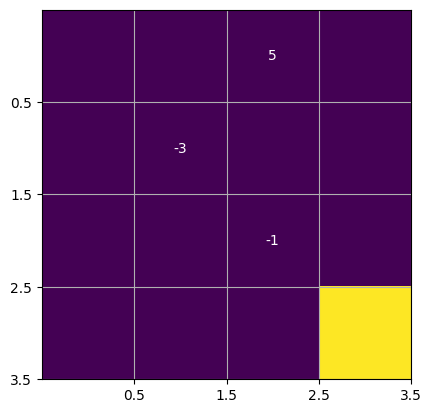

[[12.66041684  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.16697314  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.75906515  0.          0.          0.        ]
 [ 1.35        0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.33316221  0.        ]
 [ 0.          0.          9.68756562  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


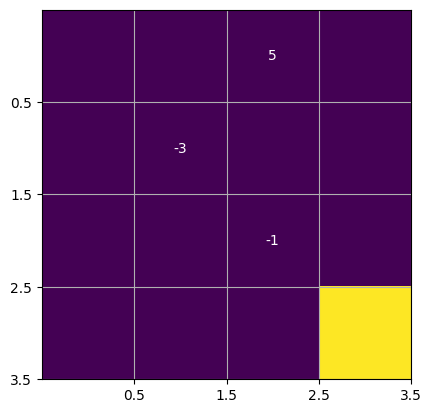

[[12.69053456  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.61189039  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.75906515  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.33316221  0.        ]
 [ 0.          0.          9.6909229   0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


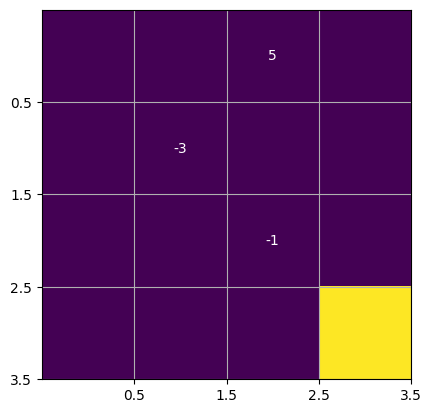

[[11.78144432  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.62017915  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.79797274  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.35126112  0.        ]
 [ 0.          0.          9.69337372  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


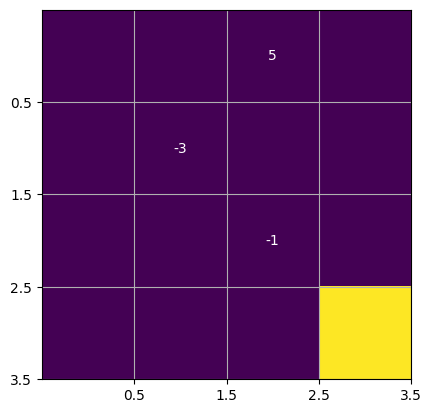

[[11.38187927  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.36641984  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.83111539  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.36511519  0.        ]
 [ 0.          0.          9.69516281  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


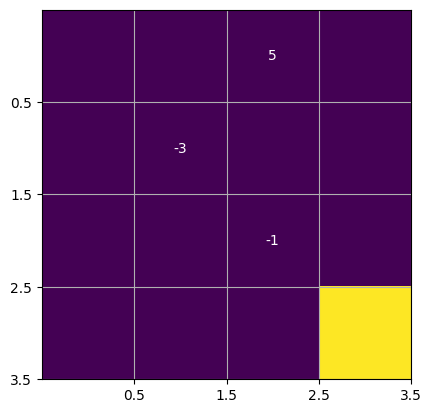

[[11.28563722  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.9198556   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.8589379   0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.37569723  0.        ]
 [ 0.          0.          9.69646885  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


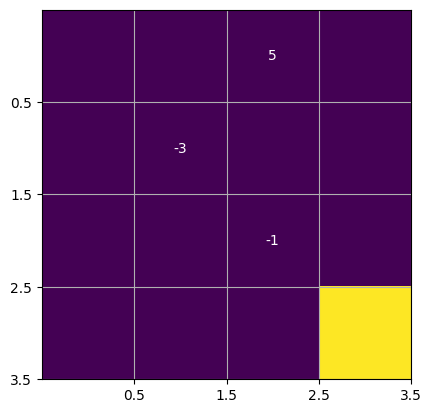

[[11.36032536  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.33115043  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.88201977  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.38376417  0.        ]
 [ 0.          0.          9.69742226  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


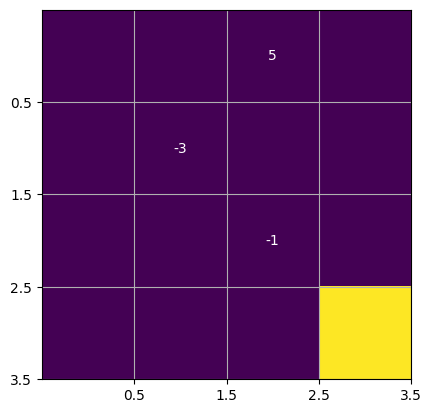

[[11.52256581  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.63744079  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.90098227  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.38990274  0.        ]
 [ 0.          0.          9.69811825  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


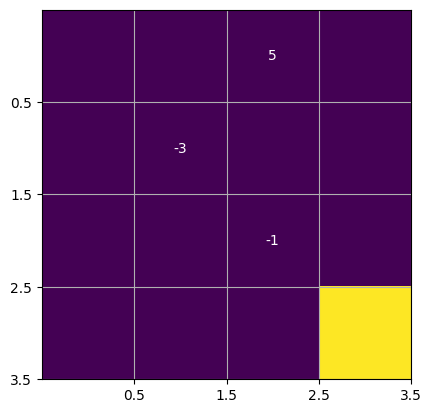

[[11.72121878  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.86599903  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.91643259  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.39456617  0.        ]
 [ 0.          0.          9.69862632  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


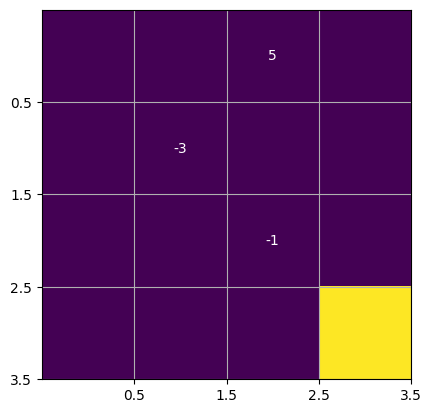

[[11.92609486  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.03689299  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.92893267  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.39810354  0.        ]
 [ 0.          0.          9.69899722  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


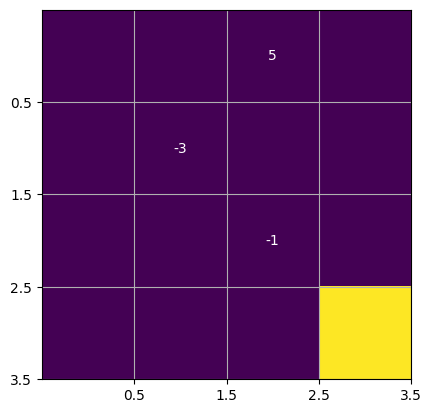

[[12.12041152  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.16491935  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.93898416  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40078295  0.        ]
 [ 0.          0.          9.69926797  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


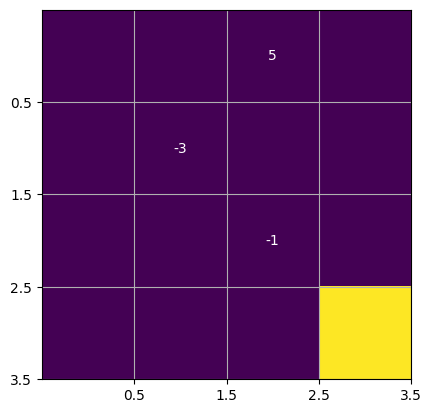

[[12.29579279  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.26101108  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.94702349  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40280984  0.        ]
 [ 0.          0.          9.69946562  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


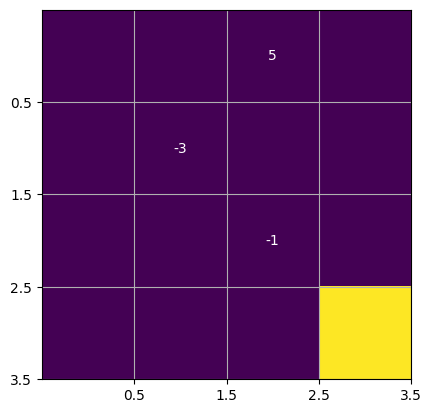

[[12.44898753  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.33326354  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.95342305  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40434123  0.        ]
 [ 0.          0.          9.6996099   0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


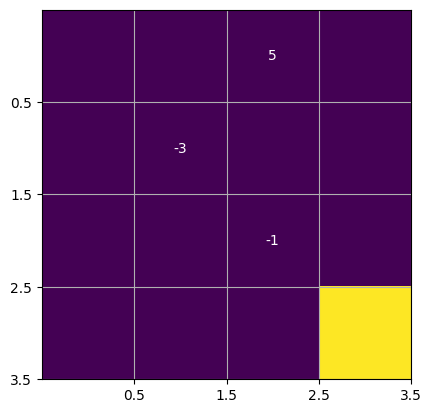

[[12.57974262  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.38768388  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.95849579  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40549693  0.        ]
 [ 0.          0.          9.69971523  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


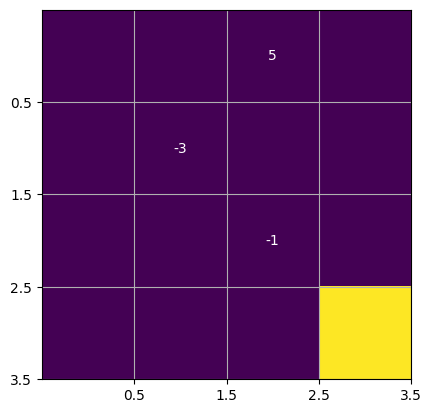

[[12.68944652  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.42873928  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.96250157  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40636818  0.        ]
 [ 0.          0.          9.69979212  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


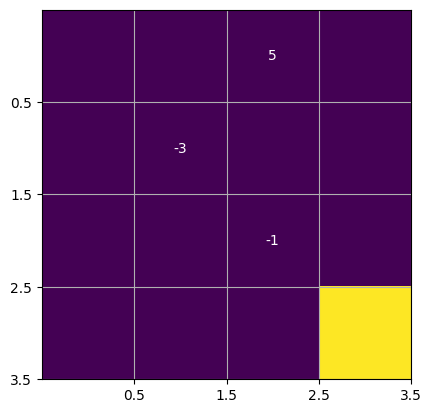

[[12.78028278  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.45975884  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.96565397  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40702432  0.        ]
 [ 0.          0.          9.69984824  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


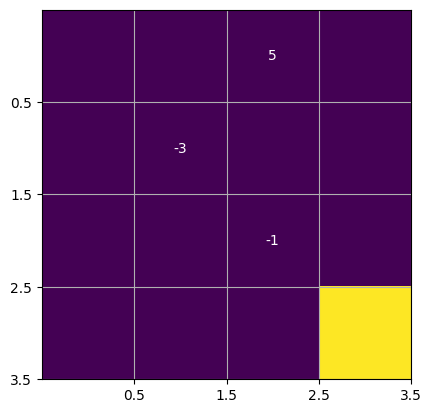

[[12.85471727  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.48322873  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.96812707  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40751801  0.        ]
 [ 0.          0.          9.69988922  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


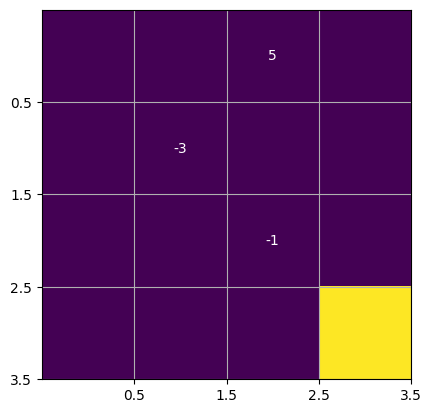

[[12.91520121  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.50100945  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97006173  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40788913  0.        ]
 [ 0.          0.          9.69991913  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


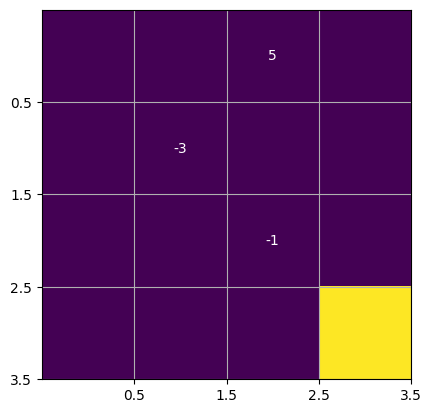

[[12.96401126  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.51449607  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97157123  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40816789  0.        ]
 [ 0.          0.          9.69994096  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


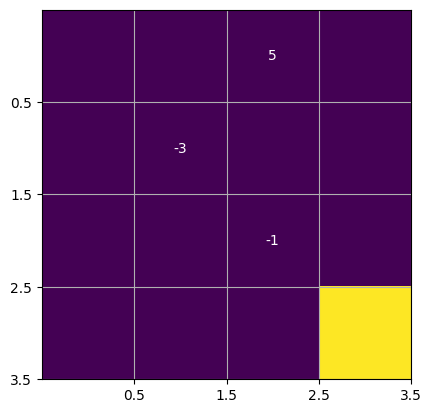

[[13.00317474  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.52473663  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97274617  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.4083771   0.        ]
 [ 0.          0.          9.6999569   0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


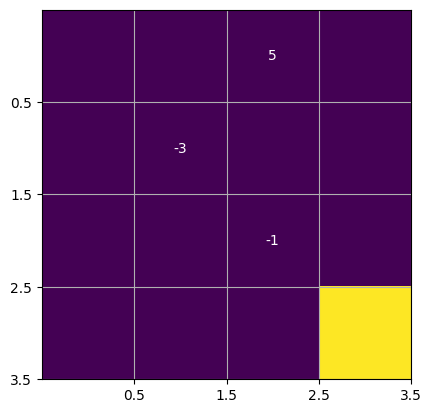

[[13.03444608  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.53251996  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97365866  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40853399  0.        ]
 [ 0.          0.          9.69996854  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


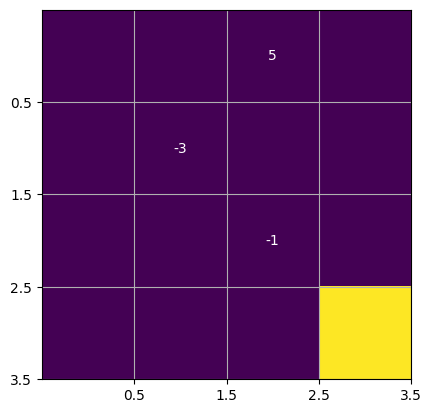

[[13.05931262  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.53844078  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97436588  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40865158  0.        ]
 [ 0.          0.          9.69997703  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


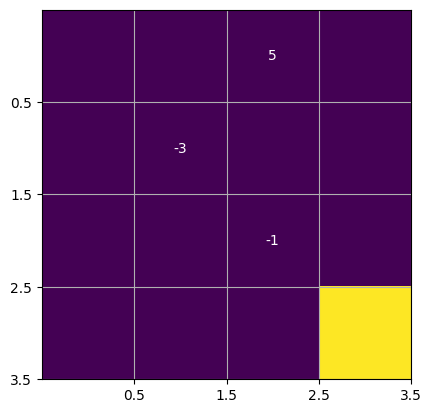

[[13.07901585  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.54294819  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97491294  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40873964  0.        ]
 [ 0.          0.          9.69998323  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


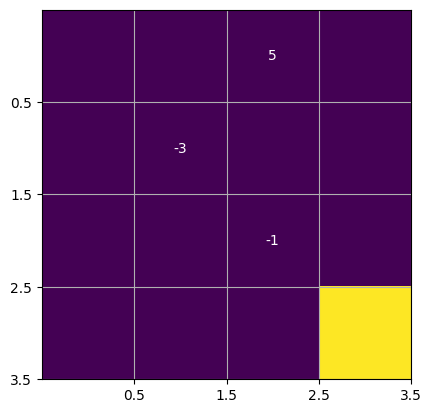

[[13.0945797   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.54638188  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97533536  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40880554  0.        ]
 [ 0.          0.          9.69998776  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


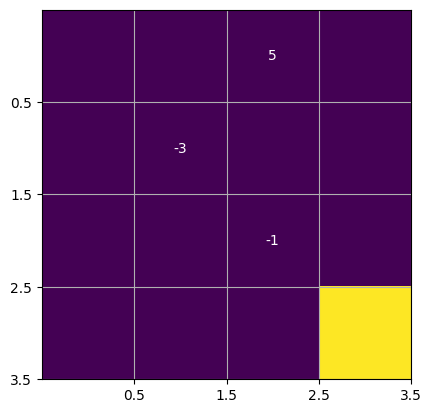

[[13.1068406   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5489991   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97566098  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40885484  0.        ]
 [ 0.          0.          9.69999107  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


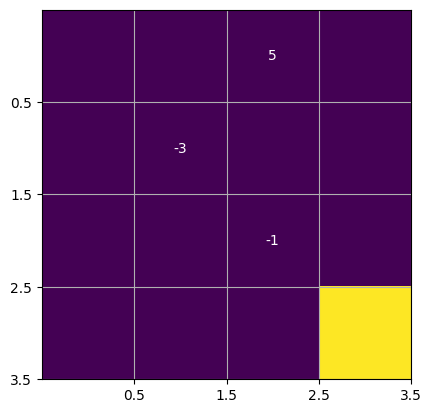

[[13.1164765   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55099495  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.9759116   0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40889169  0.        ]
 [ 0.          0.          9.69999348  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


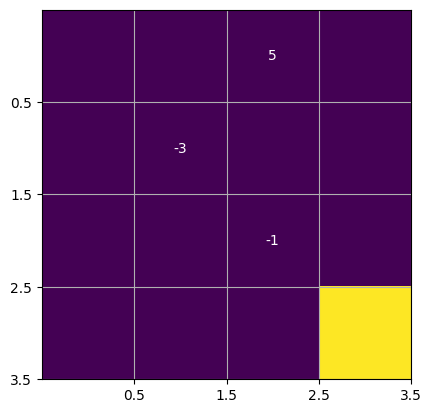

[[13.12403342  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55251756  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.9761042   0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40891923  0.        ]
 [ 0.          0.          9.69999524  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


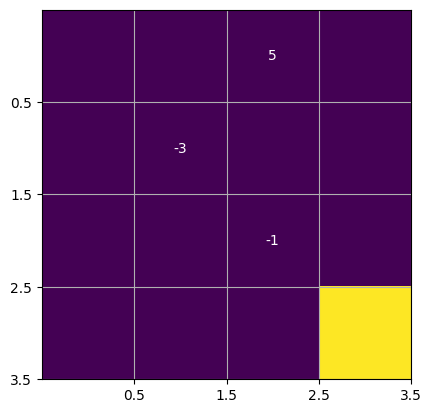

[[13.12994875  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55367951  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97625201  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40893979  0.        ]
 [ 0.          0.          9.69999652  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


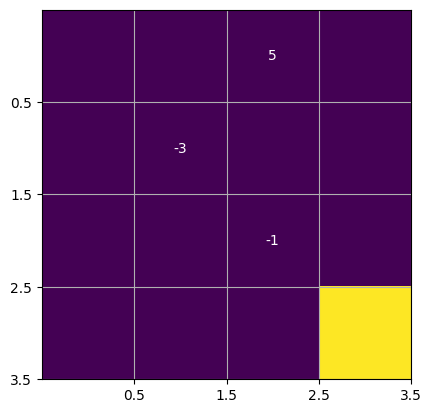

[[13.13457125  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55456645  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.9763653   0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40895514  0.        ]
 [ 0.          0.          9.69999746  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


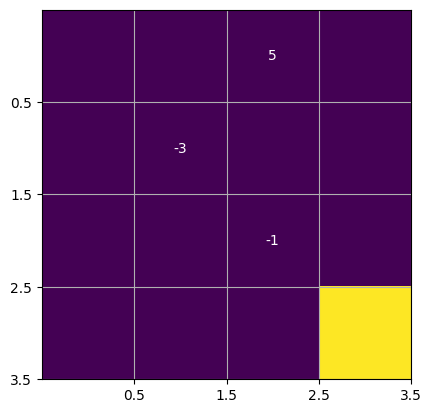

[[13.13817797  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55524358  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97645202  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40896659  0.        ]
 [ 0.          0.          9.69999815  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


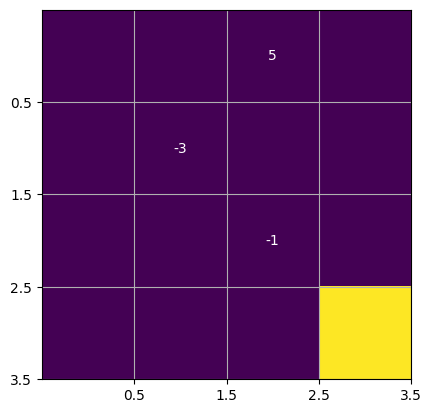

[[13.14098821  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5557606   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97651832  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40897512  0.        ]
 [ 0.          0.          9.69999865  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


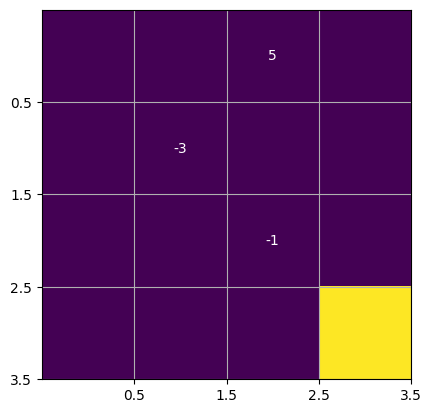

[[13.14317509  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55615538  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97656896  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40898149  0.        ]
 [ 0.          0.          9.69999901  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


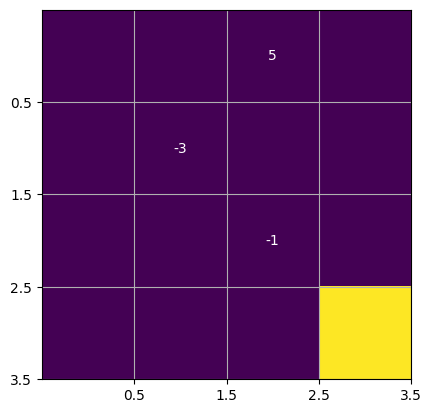

[[13.14487491  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55645684  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97660759  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40898623  0.        ]
 [ 0.          0.          9.69999928  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


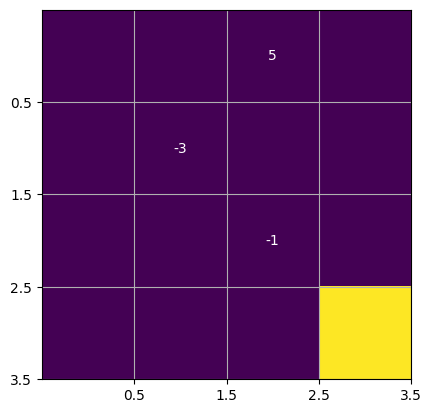

[[13.14619473  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55668702  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97663703  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40898976  0.        ]
 [ 0.          0.          9.69999947  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


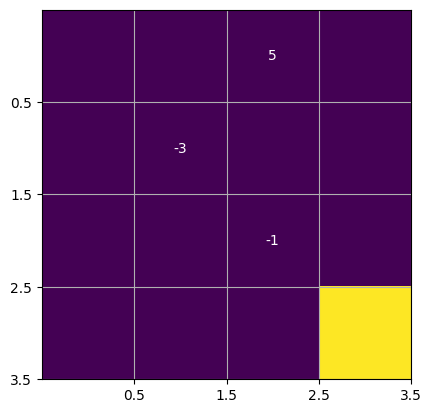

[[13.14721849  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55686277  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97665945  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40899238  0.        ]
 [ 0.          0.          9.69999962  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


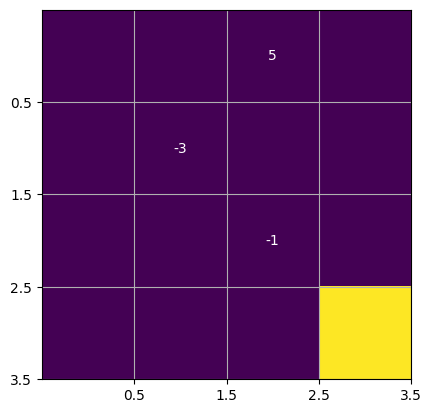

[[13.14801185  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55699693  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97667651  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40899434  0.        ]
 [ 0.          0.          9.69999972  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


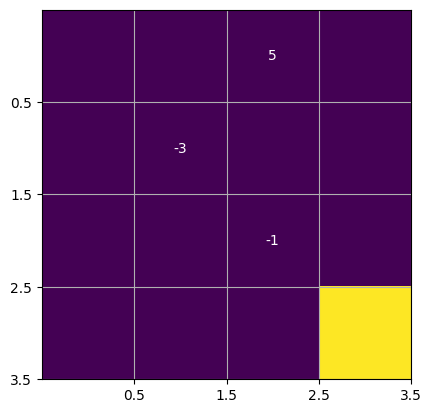

[[13.14862615  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55709934  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97668947  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40899579  0.        ]
 [ 0.          0.          9.6999998   0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


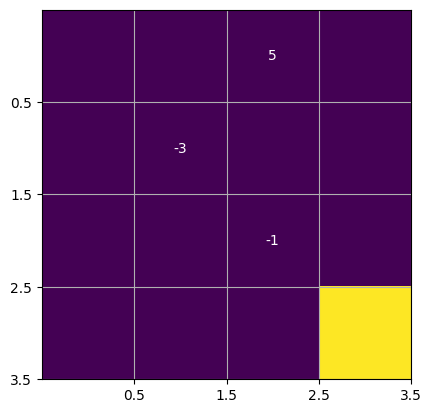

[[13.1491014   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55717749  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97669931  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40899688  0.        ]
 [ 0.          0.          9.69999985  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


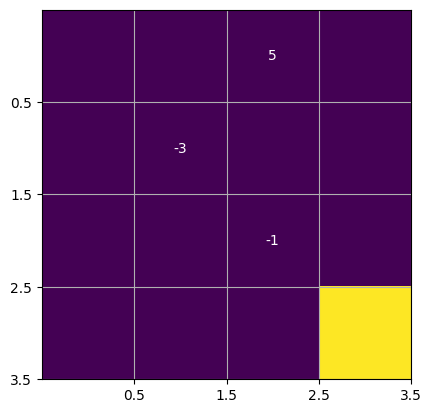

[[13.14946881  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55723711  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97670678  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40899768  0.        ]
 [ 0.          0.          9.69999989  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


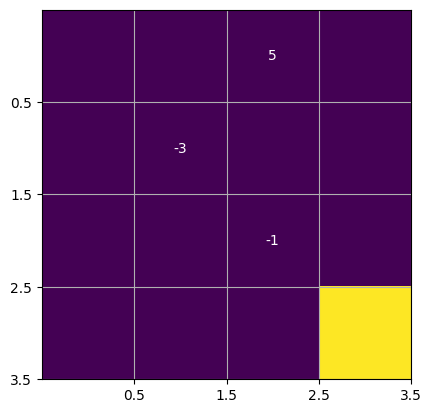

[[13.14975263  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.5572826   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97671244  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40899828  0.        ]
 [ 0.          0.          9.69999992  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


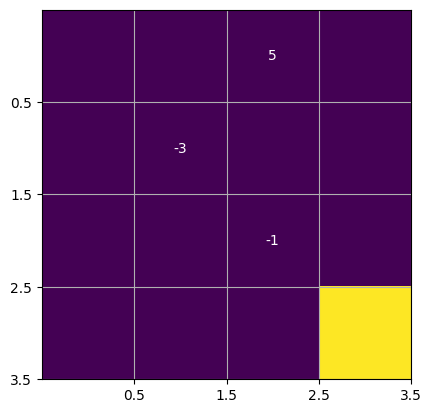

[[13.14997173  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55731728  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97671673  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40899872  0.        ]
 [ 0.          0.          9.69999994  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


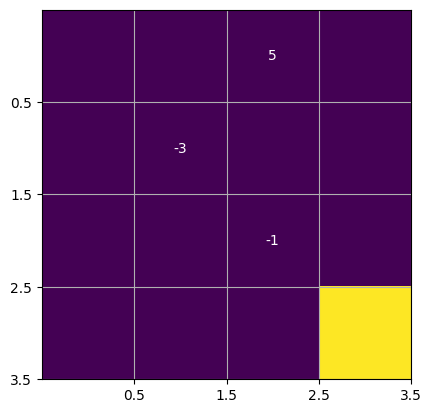

[[13.15014076  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55734373  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97671998  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.40899905  0.        ]
 [ 0.          0.          9.69999996  0.        ]
 [ 0.         -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


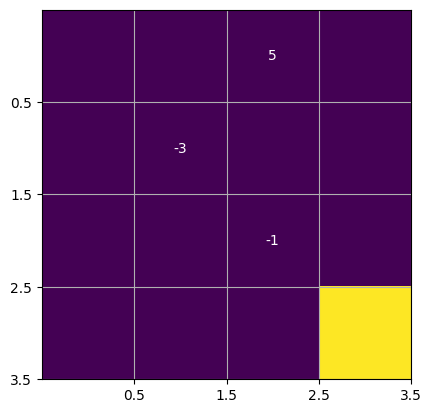

[[13.15027108  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55736389  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672244  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.4089993   0.        ]
 [ 0.          0.          7.08099997  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


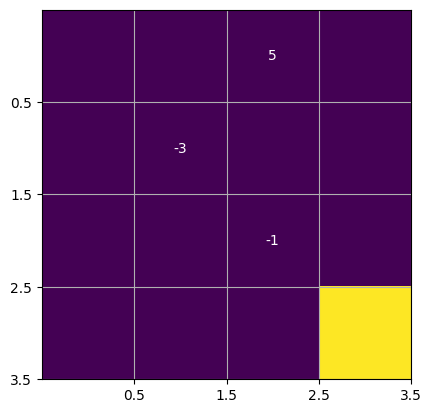

[[13.15037149  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55737924  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.97672429  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.72308338  0.        ]
 [ 0.          0.          7.78812998  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


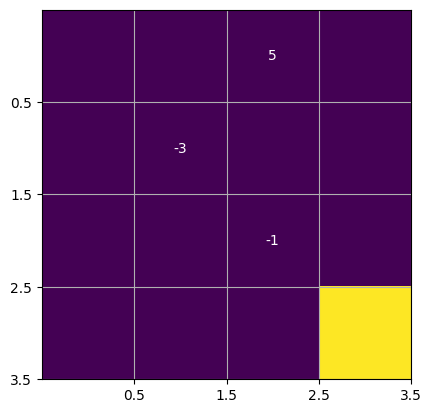

[[13.15044881  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55739094  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.79708427  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.40756211  0.        ]
 [ 0.          0.          8.30433488  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


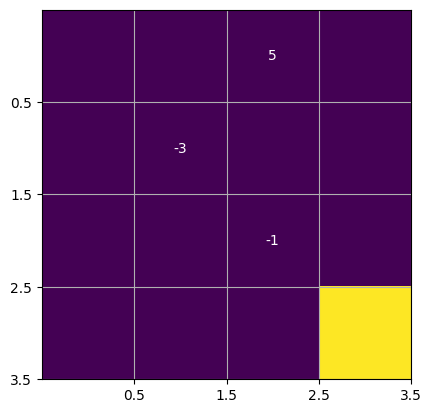

[[13.15050832  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.51035176  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.58331203  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.31242564  0.        ]
 [ 0.          0.          8.68116446  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


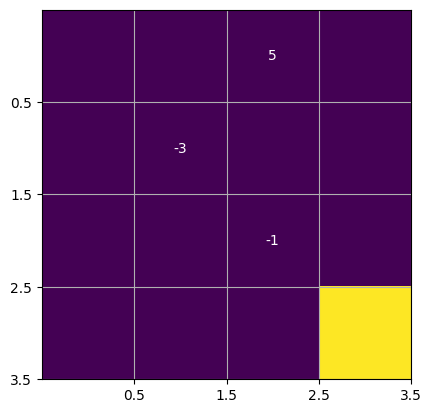

[[13.1382322   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.4200262   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.40234206  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.34166769  0.        ]
 [ 0.          0.          8.95625006  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


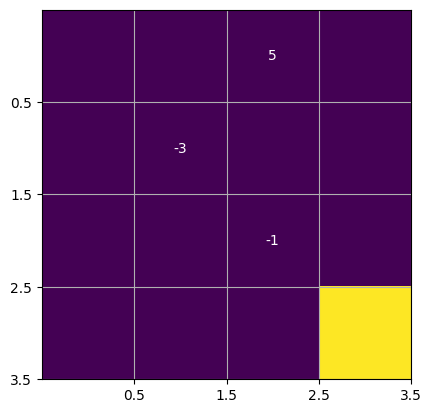

[[13.10561437  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.30669251  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.27789247  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.43505931  0.        ]
 [ 0.          0.          9.15706254  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


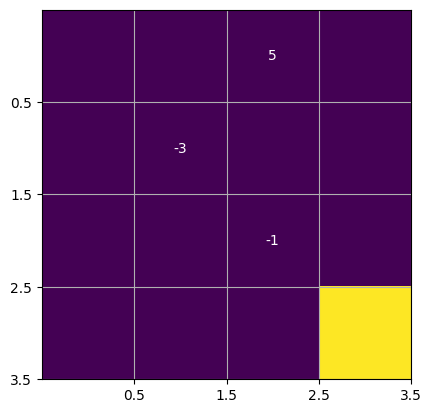

[[13.05212126  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.19136557  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.21150354  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.55582797  0.        ]
 [ 0.          0.          9.30365566  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


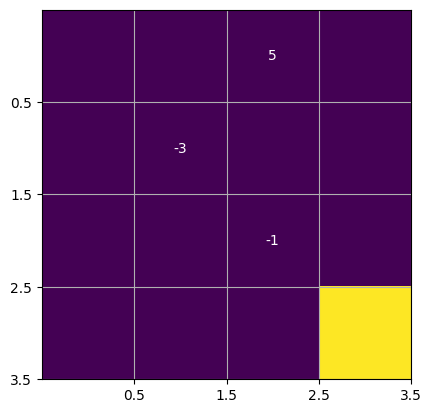

[[12.98286716  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08978965  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.19466893  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.68238184  0.        ]
 [ 0.          0.          9.41066863  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


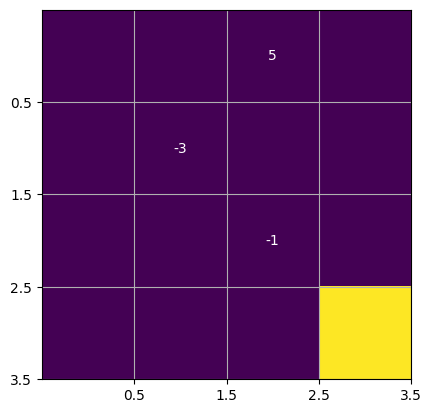

[[12.90570894  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.01123023  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.21552412  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.80279286  0.        ]
 [ 0.          0.          9.4887881   0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


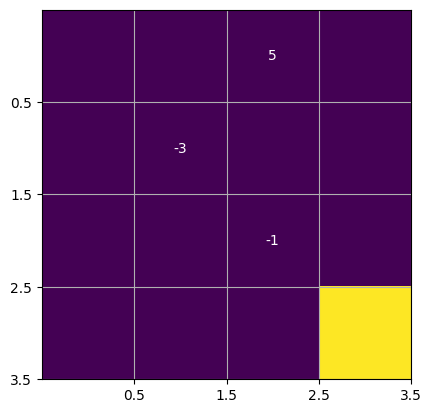

[[12.82880872  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.95934384  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.26228406  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         13.91115239  0.        ]
 [ 0.          0.          9.54581531  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


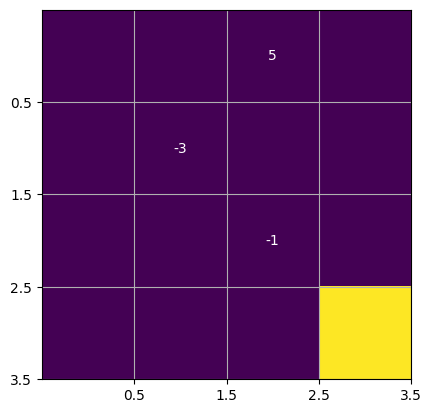

[[12.75908252  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.9337132   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.32479817  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.00519027  0.        ]
 [ 0.          0.          9.58744518  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


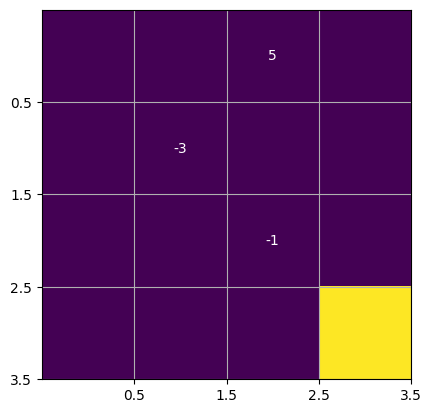

[[12.70146972  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.93137528  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.395062    0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.08474079  0.        ]
 [ 0.          0.          9.61783498  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


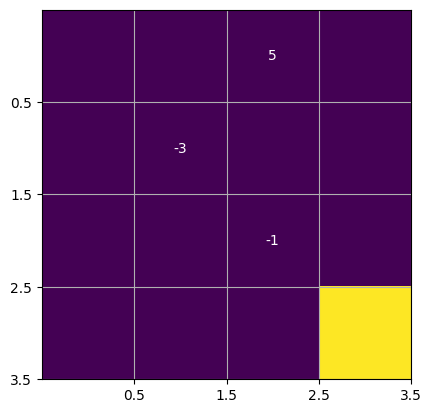

[[12.65880008  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.94807069  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.46718887  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.15077176  0.        ]
 [ 0.          0.          9.64001954  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


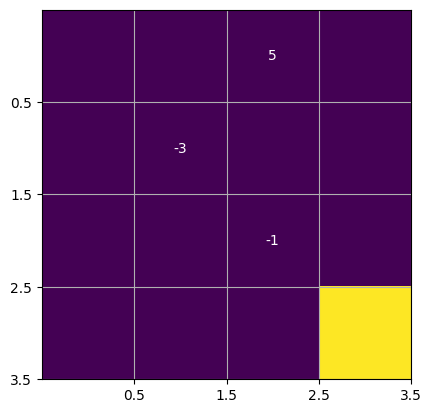

[[12.63202377  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.97914837  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.537135    0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.2047845   0.        ]
 [ 0.          0.          9.65621426  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


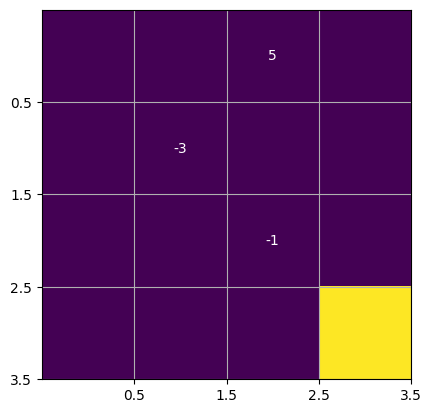

[[12.62061631  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.02015397  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.60234161  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.2484552   0.        ]
 [ 0.          0.          9.66803641  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


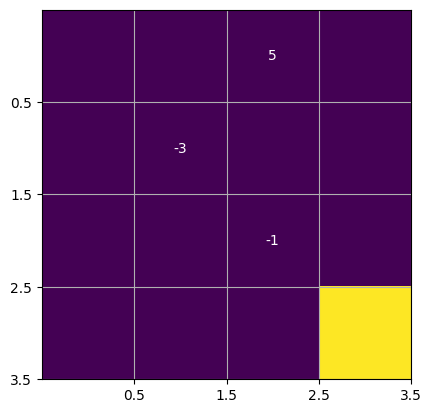

[[12.62302823  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.06716566  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.66137979  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.28343103  0.        ]
 [ 0.          0.          9.67666658  0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]
Gotcha


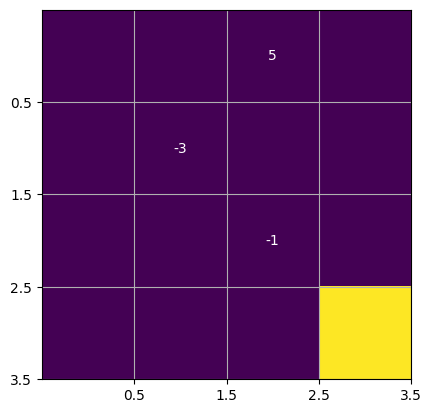

[[ 9.21481061  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.1169463   0.         -0.81        3.42229069]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.71363784  0.          0.353565    0.        ]
 [ 4.87267344  0.         -0.27        0.        ]
 [ 2.619       0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.50853916  0.         14.31122363  0.        ]
 [ 0.          0.          9.6829666   0.        ]
 [ 2.619      -0.27       10.          1.81684879]
 [ 0.          0.          0.          0.        ]]


In [ ]:
env = GridEnvironment()
agent = SARSA(env)
gridStates = {(0,0):0,(0,1):1,(0,2):2,(0,3):3
                ,(1,0):4,(1,1):5,(1,2):6,(1,3):7
                ,(2,0):8,(2,1):9,(2,2):10,(2,3):11
                ,(3,0):12,(3,1):13,(3,2):14,(3,3):15}

episode_reward, epsilon_over_episodes = run_sarsa(env, agent, gridStates, num_episodes=300)

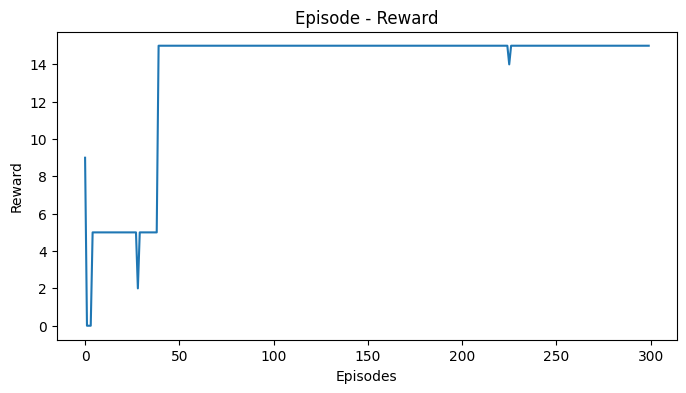

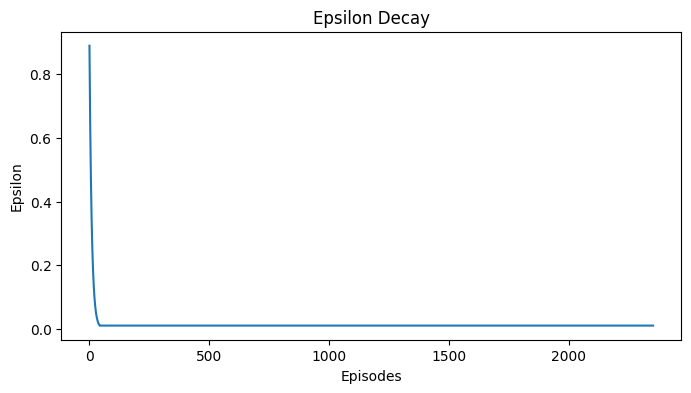

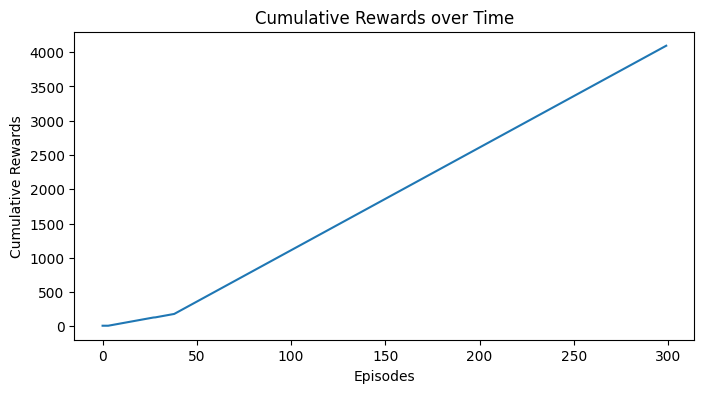

In [ ]:
plot_rewards_and_epsilon(episode_reward, epsilon_over_episodes)

# **Hyper Parameter Tuning**

1



*   Discount Factor : 0.99
*   Epsilon Decay : 0.9

Gotcha


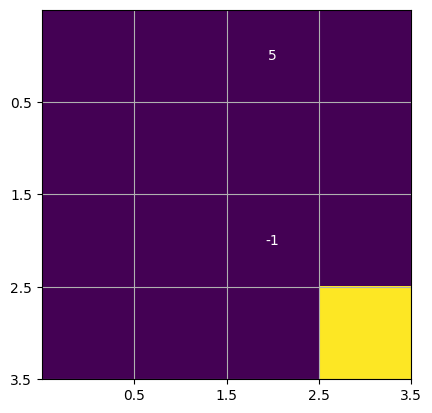

[[10.0322966   5.53735663  0.          0.        ]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [20.35458078  0.         -1.4013      5.38523567]
 [ 4.44849973  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [21.32882805  0.73858678  5.63085627  7.06198116]
 [13.49891435  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [15.82431963 14.20975425 22.35201907 14.69409199]
 [14.78233323 16.6681663   0.         22.30524667]
 [ 0.         -0.27        2.7         0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


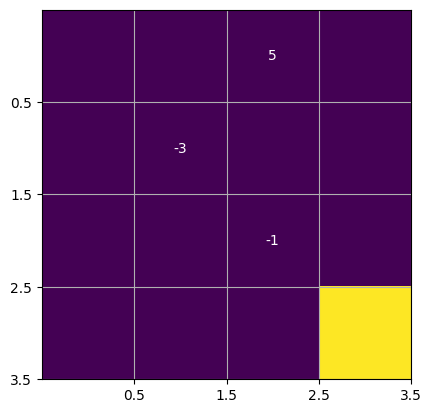

[[18.44823148  5.53735663  0.          0.        ]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [21.18338191  0.         -1.4013      5.38523567]
 [ 4.44849973  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [21.54496168  0.73858678  5.63085627  7.06198116]
 [15.95434406  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [17.62789659 14.20975425 15.99764317 14.69409199]
 [14.78233323 15.7760212   0.72171    21.71634005]
 [ 0.         -0.27        4.671       0.        ]
 [ 0.          0.          0.          0.        ]]


In [ ]:
env = GridEnvironment()
agent = SARSA(env,gamma=0.99,decay_factor=0.9)
episode_reward, epsilon_over_episodes = run_sarsa(env, agent, gridStates, num_episodes=300)

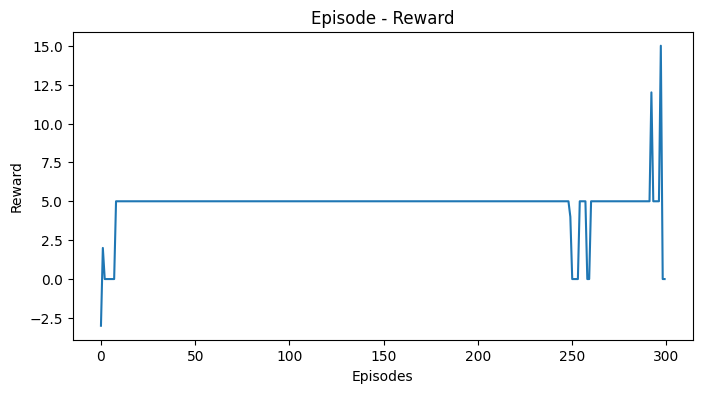

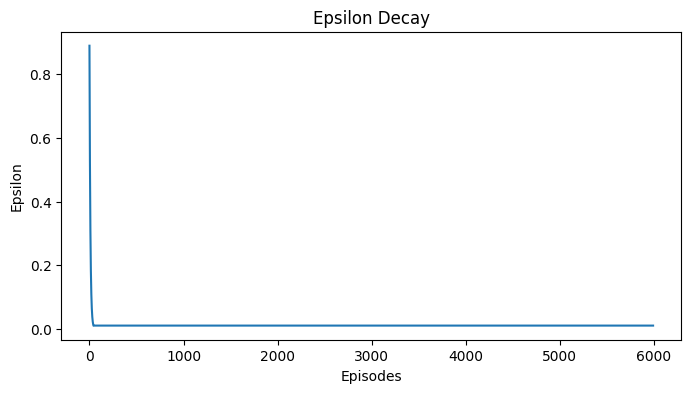

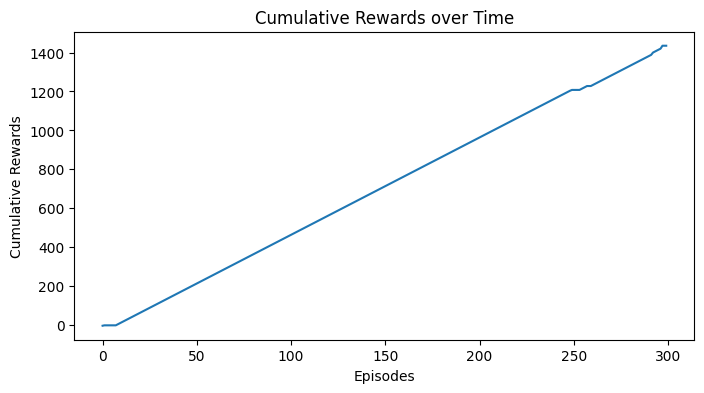

In [ ]:
plot_rewards_and_epsilon(episode_reward, epsilon_over_episodes)

2

* Discount Factor : 0.95
* Epsilon Decay : 0.92

Gotcha


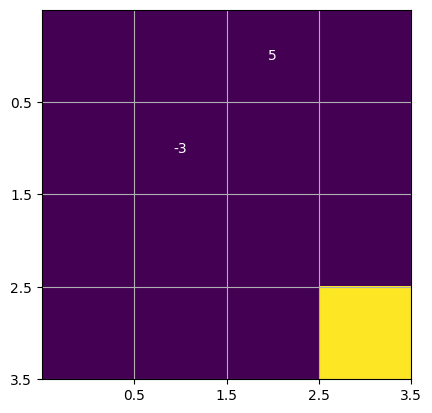

[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 2.7   0.    0.    0.  ]
 [ 0.    0.    1.35  0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.   -0.27  0.    0.  ]
 [ 0.    0.    0.    0.  ]]


In [ ]:
env = GridEnvironment()
agent = SARSA(env,gamma=0.95,decay_factor=0.92)
episode_reward, epsilon_over_episodes = run_sarsa(env, agent, gridStates, num_episodes=300)

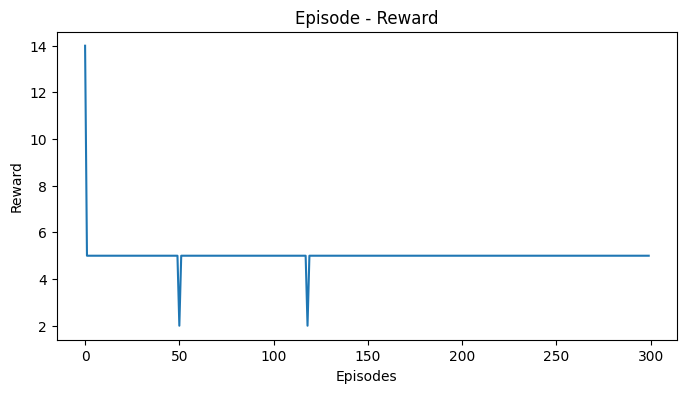

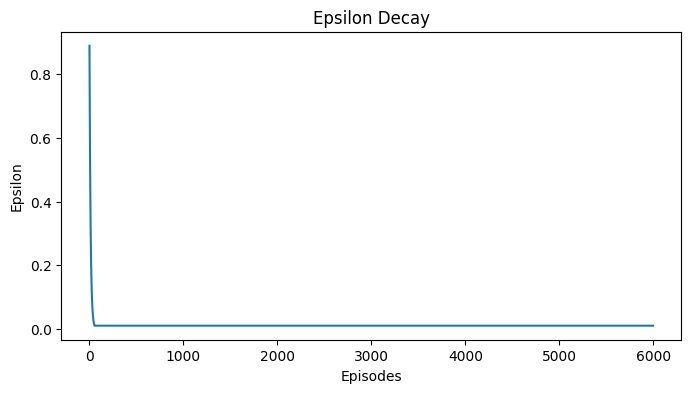

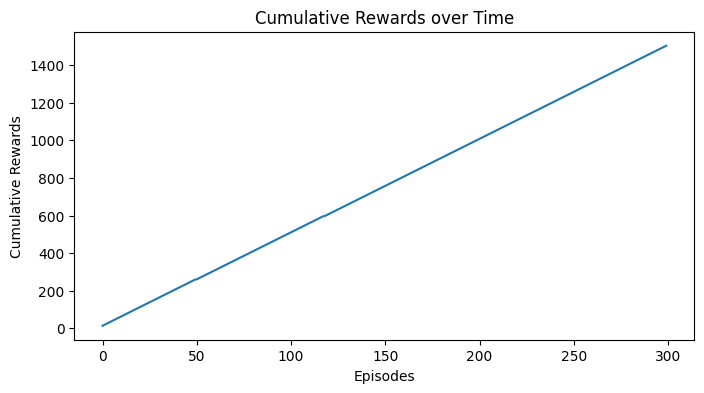

In [ ]:
plot_rewards_and_epsilon(episode_reward, epsilon_over_episodes)

3

* Discount Factor : 0.96
* Epsilon Decay : 0.98

Gotcha


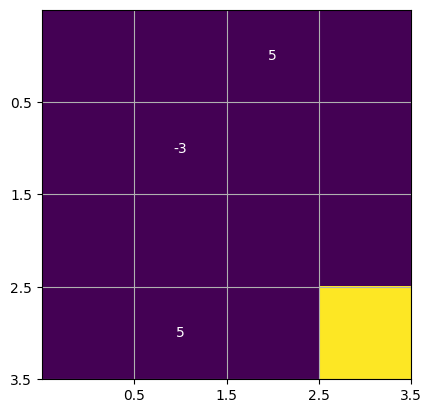

[[ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.      -0.81     0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.      -0.27     0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.9855   0.     ]
 [ 0.       0.       0.       0.34992]
 [ 0.       0.       2.7      0.     ]
 [ 0.       0.       0.       0.     ]]
Gotcha


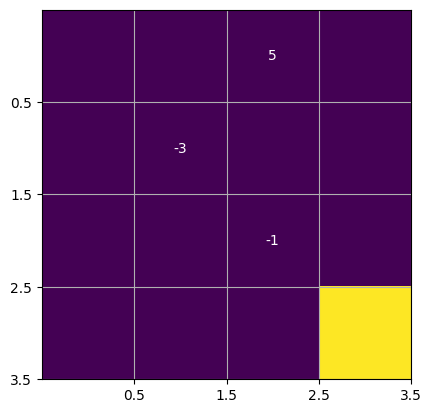

[[ 0.13254985  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.63978786  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 1.18512326  0.          0.          0.06621046]
 [ 0.35012269  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.45360497  0.48496984  1.45553427  0.        ]
 [ 0.24813599  0.          0.69984     1.93132629]
 [ 0.          0.          4.671       0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


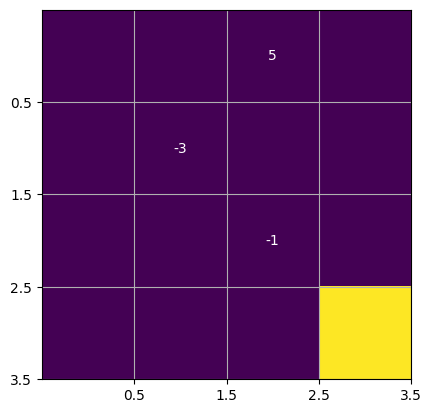

[[ 3.01593169  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 3.51977817  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 4.2424098   0.          0.          0.06621046]
 [ 1.72931114  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 1.31816291  0.48496984  4.39378039  1.39699958]
 [ 0.24813599  0.0907518   1.7216064   5.65296567]
 [ 0.          0.          6.10983     0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


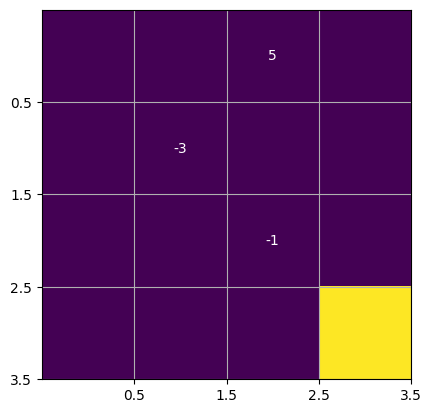

[[ 3.7044873   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 4.40015532  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.21493261  0.          0.          0.06621046]
 [ 1.72931114  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 1.31816291  0.48496984  4.94760025  1.39699958]
 [ 0.24813599  0.0907518   2.84044061  6.10422909]
 [ 0.          0.          7.1601759   0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


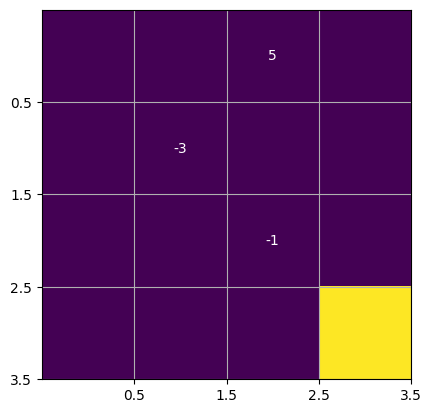

[[ 4.4545734   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.04604859  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.65114526  0.          0.          0.06621046]
 [ 1.72931114  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 1.31816291  0.48496984  6.59974764  1.39699958]
 [ 0.24813599  0.0907518   3.92943924  6.21221238]
 [ 0.          0.          7.92692841  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


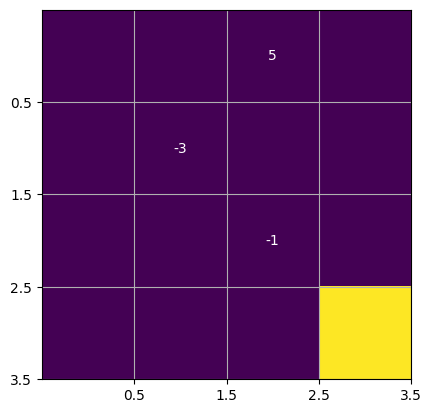

[[ 5.07674122  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.4541254   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.84534463  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  0.48496984  6.61001769  2.81923503]
 [ 0.24813599  0.0907518   4.92315049  5.83722777]
 [ 0.          0.          8.48665774  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


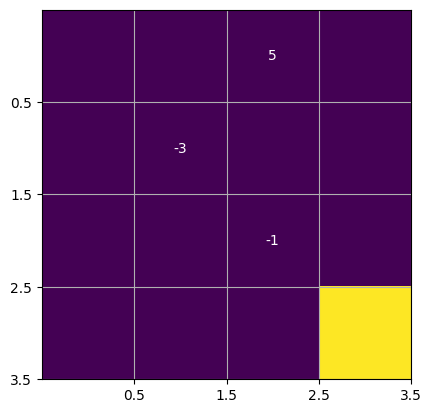

[[ 5.47043016  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.67706291  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.92592702  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671  6.18562134  2.81923503]
 [ 0.24813599  0.0907518   5.79364154  6.602612  ]
 [ 0.          0.          8.89526015  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


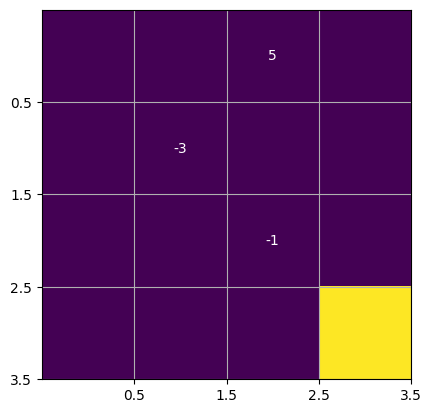

[[ 5.46479042  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.73963153  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.1391087   0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671  6.98981881  4.00669543]
 [ 0.24813599  0.0907518   6.53500975  5.73931502]
 [ 0.          0.          9.19353991  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


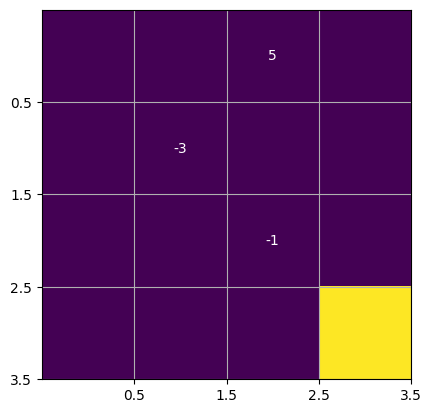

[[ 5.4770095   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.78118799  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.29331039  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671  8.14644226  4.00669543]
 [ 0.24813599  0.0907518   7.15352267  5.73931502]
 [ 0.          0.          9.41128413  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


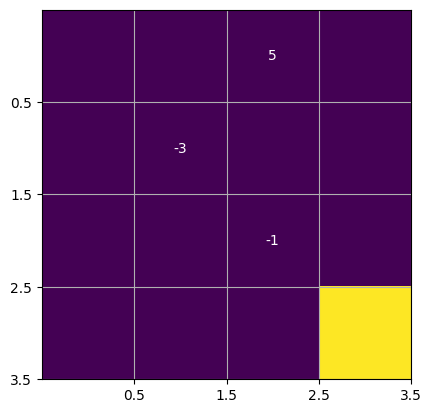

[[ 5.49670086  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.85149329  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.70567442  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671  9.15109592  4.00669543]
 [ 0.24813599  0.0907518   7.66147639  5.73931502]
 [ 0.          0.          9.57023742  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


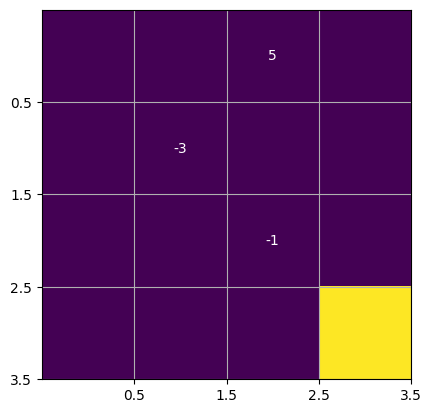

[[ 5.52929869  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.00970091  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 7.26710639  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 10.01615471  4.00669543]
 [ 0.24813599  0.0907518   8.07348331  5.73931502]
 [ 0.          0.          9.68627331  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


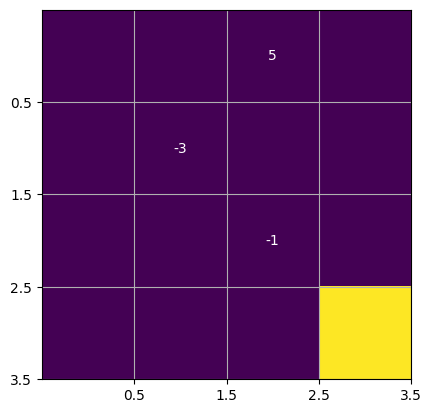

[[ 5.59410252  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.27071564  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 7.90117496  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 10.75443981  4.00669543]
 [ 0.24813599  0.0907518   8.40432486  5.73931502]
 [ 0.          0.          9.77097952  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


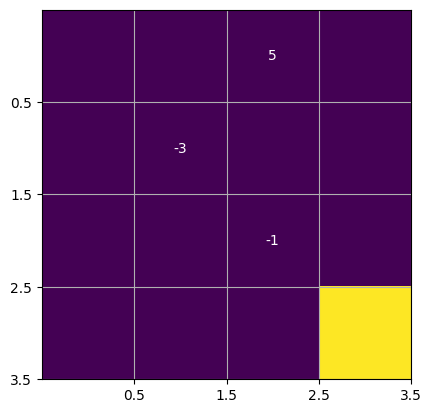

[[ 5.70906433  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.62560697  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 8.55540852  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 11.37914206  4.00669543]
 [ 0.24813599  0.0907518   8.66779504  5.73931502]
 [ 0.          0.          9.83281505  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


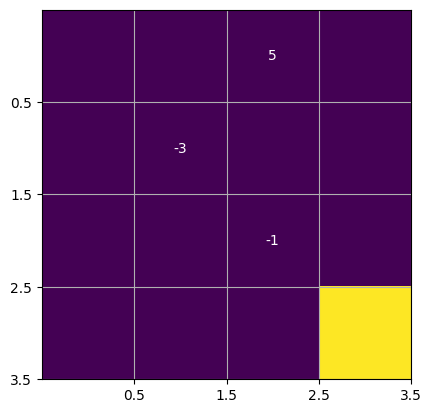

[[ 5.88497429  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 7.05425497  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.19492184  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 11.90346618  4.00669543]
 [ 0.24813599  0.0907518   8.87615604  5.73931502]
 [ 0.          0.          9.87795499  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


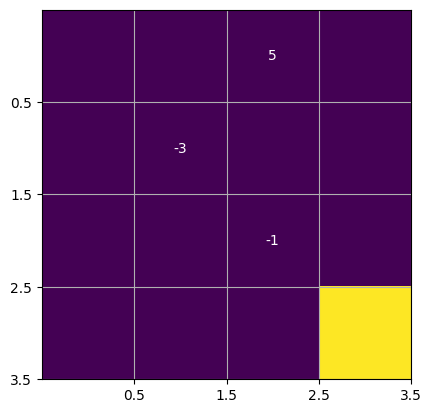

[[ 6.12449412  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 7.53292987  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.79767138  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 12.34022996  4.00669543]
 [ 0.24813599  0.0907518   9.03995984  5.73931502]
 [ 0.          0.          9.91090714  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


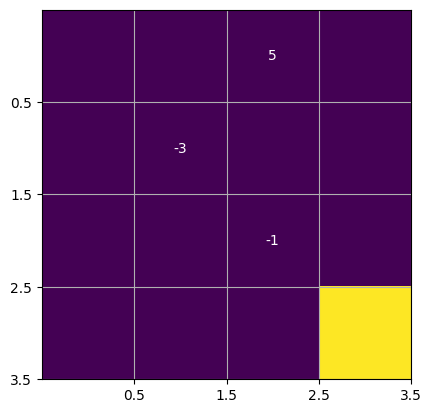

[[ 6.42341613  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 8.03859523  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.35088771  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 12.70152546  4.00669543]
 [ 0.24813599  0.0907518   9.16807781  5.73931502]
 [ 0.          0.          9.93496221  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


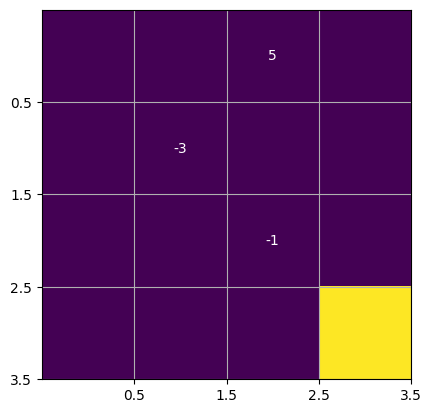

[[ 6.77269766  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 8.55112461  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.84838343  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 11.21647892  4.00669543]
 [ 0.24813599  0.0907518   9.26783901  7.32854562]
 [ 0.          0.          9.95252241  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


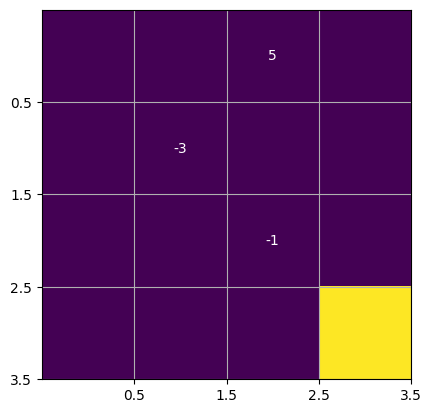

[[ 7.16052079  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.05422195  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.82663124  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 11.94025348  4.00669543]
 [ 0.24813599  0.0907518   9.34521629  7.32854562]
 [ 0.          0.          9.96534136  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


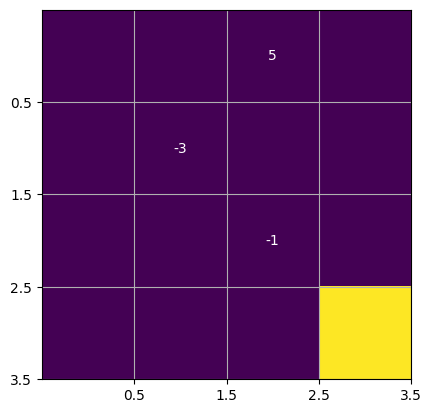

[[ 7.57403451  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.41584484  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.99835451  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 12.4886651   4.00669543]
 [ 0.24813599  0.0907518   9.40502437  7.32854562]
 [ 0.          0.          9.97469919  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


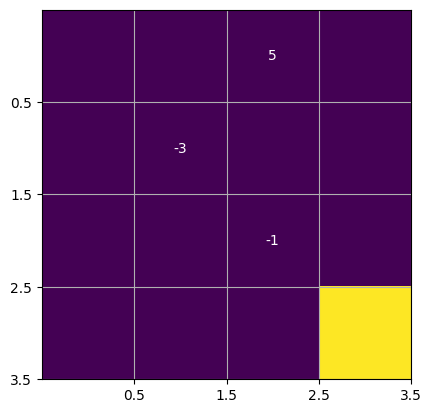

[[ 7.96963217  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.72434022  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.26586078  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 12.90450784  4.00669543]
 [ 0.24813599  0.0907518   9.45110982  7.32854562]
 [ 0.          0.          9.98153041  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


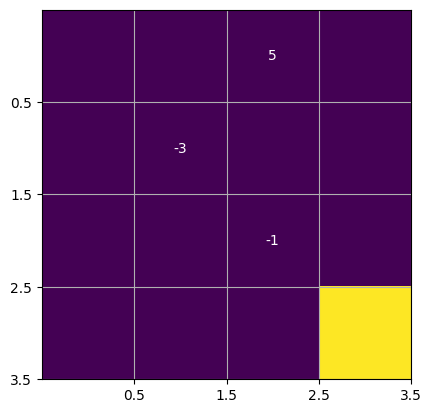

[[ 8.33838047  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.01887948  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.5689268   0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.22001839  4.00669543]
 [ 0.24813599  0.0907518   9.48652285  7.32854562]
 [ 0.          0.          9.9865172   0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


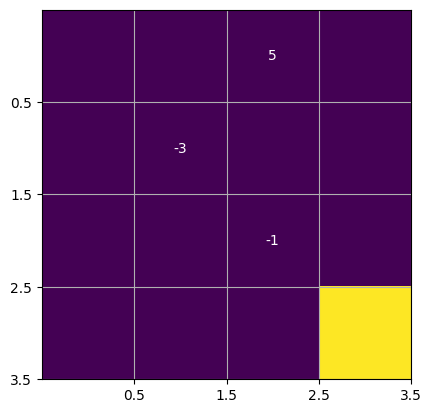

[[ 8.6839113   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.31244785  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.87194533  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.45952015  4.00669543]
 [ 0.24813599  0.0907518   9.51366694  7.32854562]
 [ 0.          0.          9.99015756  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


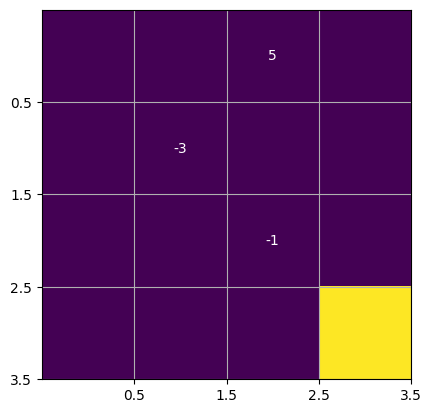

[[ 9.01224173  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.60529516  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.15522772  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.64139218  4.00669543]
 [ 0.24813599  0.0907518   9.53442571  7.32854562]
 [ 0.          0.          9.99281502  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


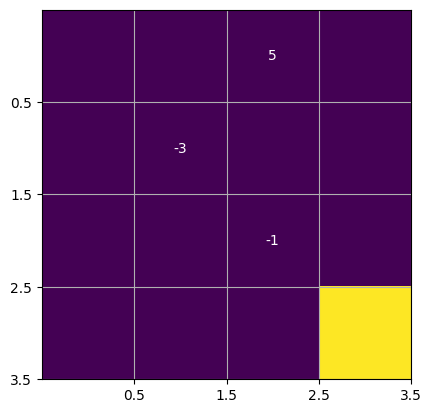

[[ 9.32782897  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.89250049  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.40916509  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.77953943  4.00669543]
 [ 0.24813599  0.0907518   9.55026842  7.32854562]
 [ 0.          0.          9.99475496  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


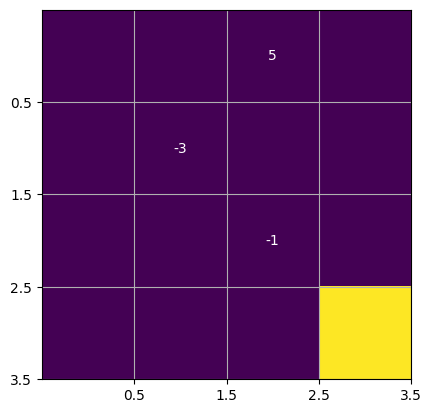

[[ 9.63265128  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.16798095  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.63034713  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.88449336  4.00669543]
 [ 0.24813599  0.0907518   9.56233643  7.32854562]
 [ 0.          0.          9.99617112  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


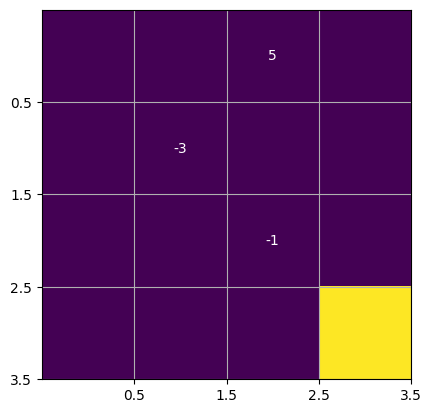

[[ 9.92657609  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.42641207  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.81901409  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.96423776  4.00669543]
 [ 0.24813599  0.0907518   9.57151315  7.32854562]
 [ 0.          0.          9.99720492  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


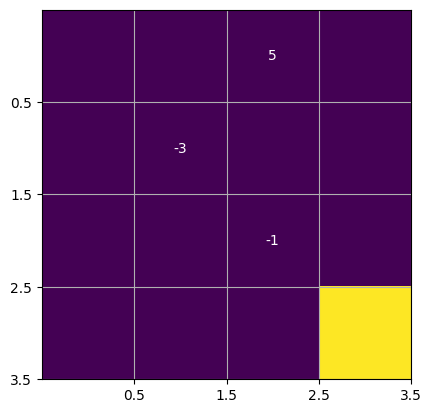

[[10.20812656  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.66396926  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.97741071  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.02482977  4.00669543]
 [ 0.24813599  0.0907518   9.57848011  7.32854562]
 [ 0.          0.          9.99795959  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


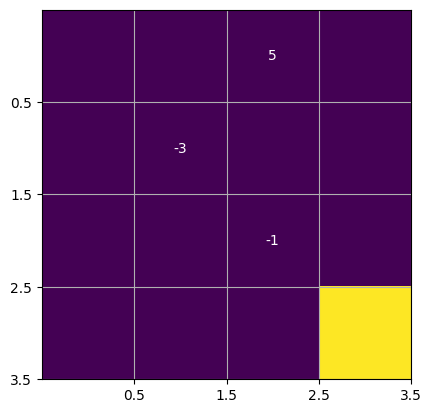

[[10.47523322  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.87844242  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10874569  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.07086778  4.00669543]
 [ 0.24813599  0.0907518   9.58376161  7.32854562]
 [ 0.          0.          9.9985105   0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


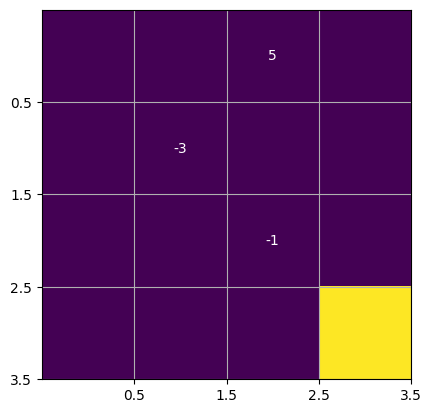

[[10.72581252  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.06904985  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.21655329  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.10584449  4.00669543]
 [ 0.24813599  0.0907518   9.5877599   7.32854562]
 [ 0.          0.          9.99891267  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


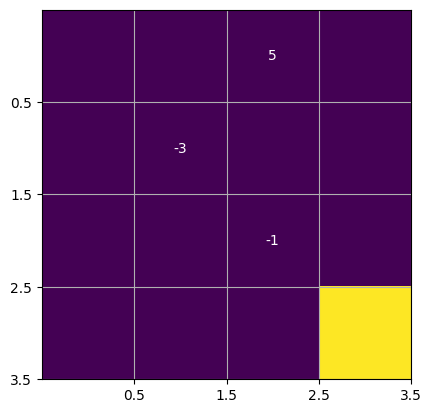

[[10.95814086  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.236137    0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.30431879  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.13241384  4.00669543]
 [ 0.24813599  0.0907518   9.59078289  7.32854562]
 [ 0.          0.          9.99920625  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


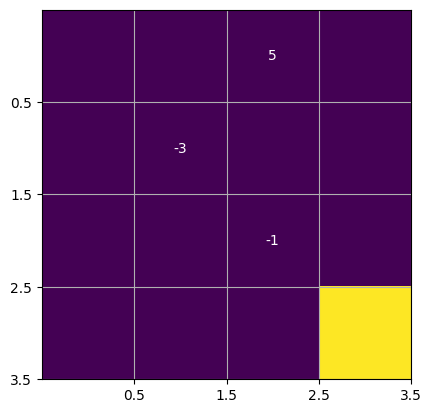

[[11.17104954  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.38085944  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.37527438  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.15259303  4.00669543]
 [ 0.24813599  0.0907518   9.59306577  7.32854562]
 [ 0.          0.          9.99942056  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


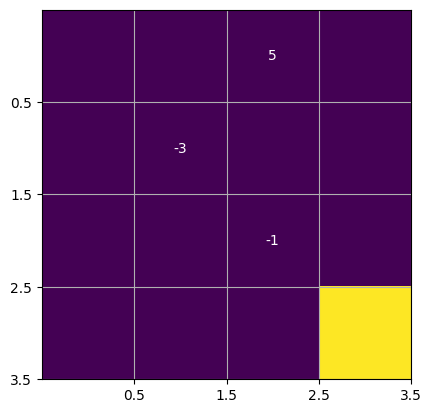

[[11.36398493  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.50489851  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.43230241  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.16791556  4.00669543]
 [ 0.24813599  0.0907518   9.59478782  7.32854562]
 [ 0.          0.          9.99957701  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


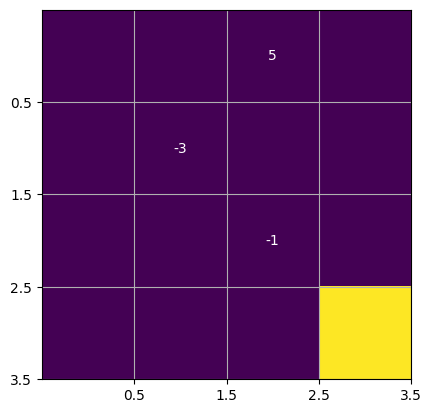

[[11.53697869  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.6102287   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.47790447  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.17954736  4.00669543]
 [ 0.24813599  0.0907518   9.59608547  7.32854562]
 [ 0.          0.          9.99969122  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


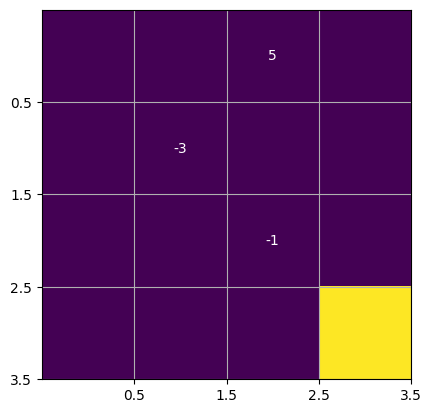

[[11.69056573  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.69893979  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.51420894  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.18837493  4.00669543]
 [ 0.24813599  0.0907518   9.59706236  7.32854562]
 [ 0.          0.          9.99977459  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


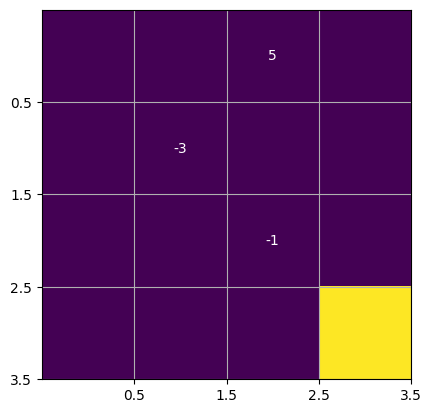

[[11.82567817  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.773109    0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.54299931  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.19507226  4.00669543]
 [ 0.24813599  0.0907518   9.59779709  7.32854562]
 [ 0.          0.          9.99983545  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


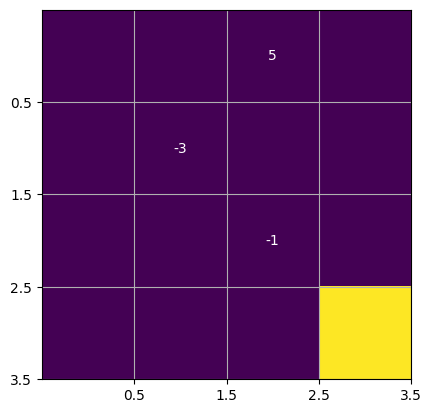

[[11.94353492  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.83471499  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.56575222  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.20015176  4.00669543]
 [ 0.24813599  0.0907518   9.59834923  7.32854562]
 [ 0.          0.          9.99987988  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


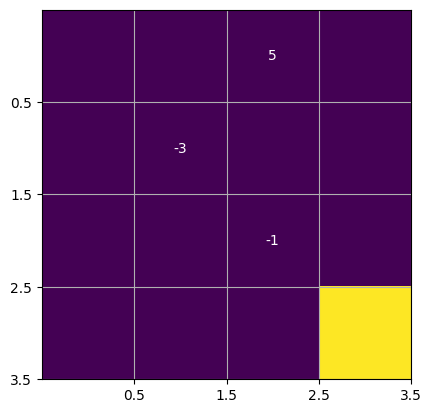

[[12.04553862  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.88558492  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.58367846  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.2040029   4.00669543]
 [ 0.24813599  0.0907518   9.5987638   7.32854562]
 [ 0.          0.          9.99991231  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


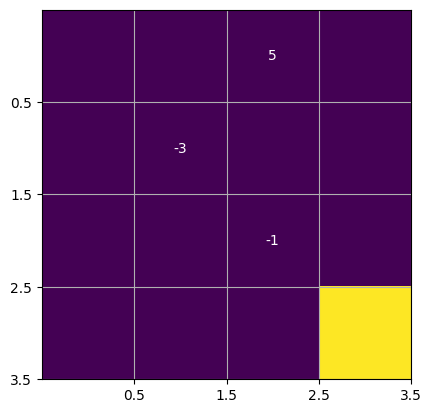

[[12.1331868   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.92736645  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.59776283  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.20692169  4.00669543]
 [ 0.24813599  0.0907518   9.59907484  7.32854562]
 [ 0.          0.          9.99993599  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


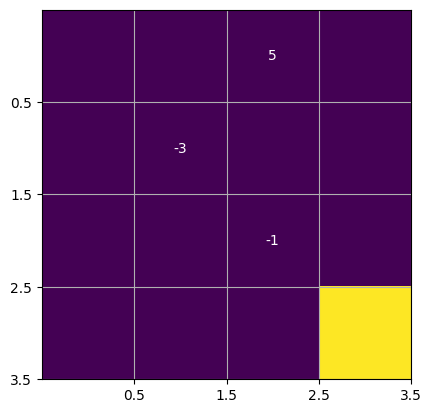

[[12.20799975  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.96151763  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.60880097  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.20913304  4.00669543]
 [ 0.24813599  0.0907518   9.59930804  7.32854562]
 [ 0.          0.          9.99995327  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


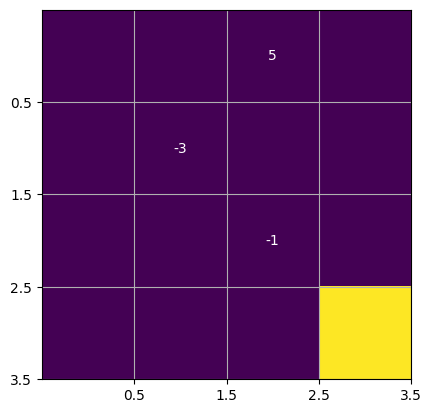

[[12.27146519  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.98930908  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.61743199  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21080776  4.00669543]
 [ 0.24813599  0.0907518   9.59948276  7.32854562]
 [ 0.          0.          9.99996589  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


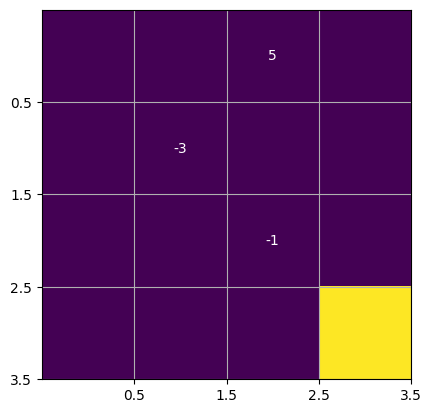

[[12.3249985   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.011834    0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.62416672  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.2120756   4.00669543]
 [ 0.24813599  0.0907518   9.59961357  7.32854562]
 [ 0.          0.          9.9999751   0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


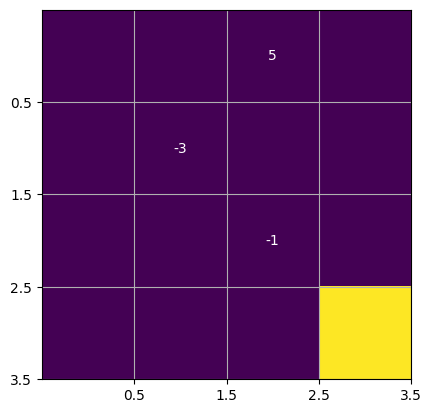

[[12.36991628  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.03002284  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.6294117   0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21303502  4.00669543]
 [ 0.24813599  0.0907518   9.59971145  7.32854562]
 [ 0.          0.          9.99998182  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


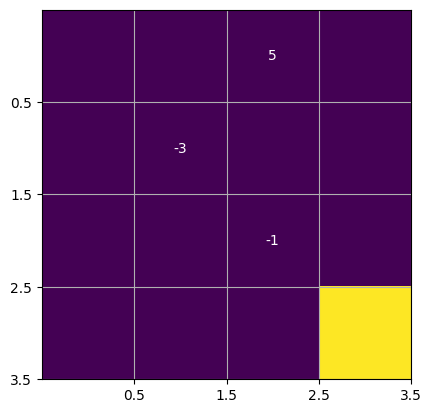

[[12.4074208   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.04466018  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.63348922  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21376078  4.00669543]
 [ 0.24813599  0.0907518   9.59978465  7.32854562]
 [ 0.          0.          9.99998673  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


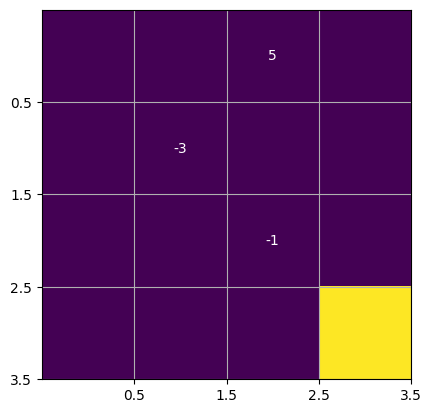

[[12.43859311  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.05640234  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.63665392  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21430955  4.00669543]
 [ 0.24813599  0.0907518   9.59983935  7.32854562]
 [ 0.          0.          9.99999031  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


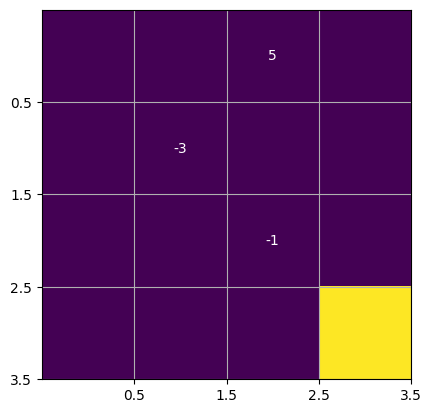

[[12.46439245  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.06579441  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.6391064   0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21472433  4.00669543]
 [ 0.24813599  0.0907518   9.59988022  7.32854562]
 [ 0.          0.          9.99999293  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


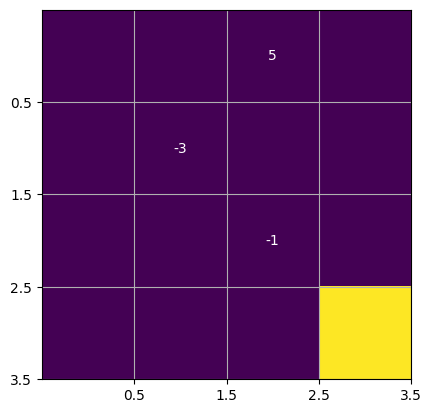

[[12.4856604   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.0732863   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64100422  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21503771  4.00669543]
 [ 0.24813599  0.0907518   9.59991073  7.32854562]
 [ 0.          0.          9.99999484  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


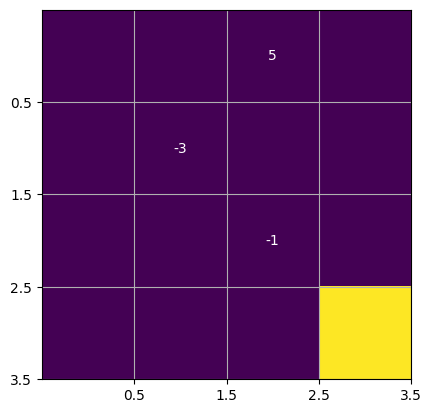

[[12.5031279   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.07924729  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64247085  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21527439  4.00669543]
 [ 0.24813599  0.0907518   9.59993349  7.32854562]
 [ 0.          0.          9.99999623  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


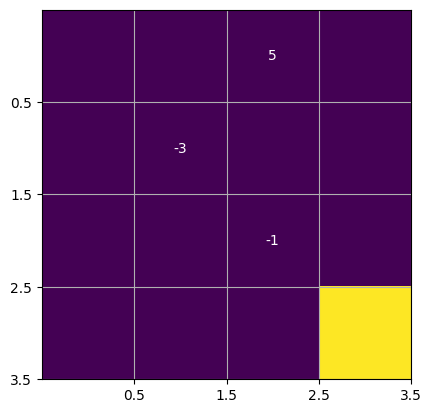

[[12.51742426  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08397897  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64360285  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21545307  4.00669543]
 [ 0.24813599  0.0907518   9.59995047  7.32854562]
 [ 0.          0.          9.99999725  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


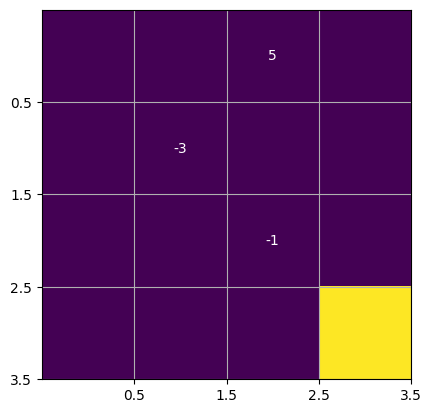

[[12.52908706  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.0877265   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64447551  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.2155879   4.00669543]
 [ 0.24813599  0.0907518   9.59996313  7.32854562]
 [ 0.          0.          9.99999799  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


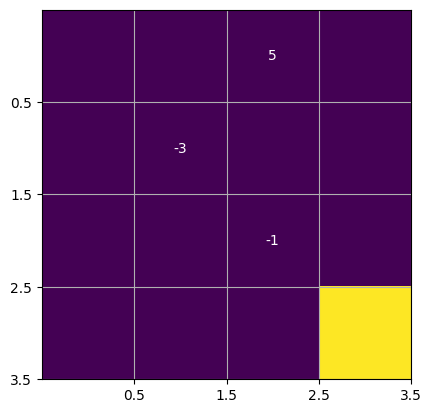

[[12.53857226  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.0906884   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64514751  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21568961  4.00669543]
 [ 0.24813599  0.0907518   9.59997257  7.32854562]
 [ 0.          0.          9.99999853  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


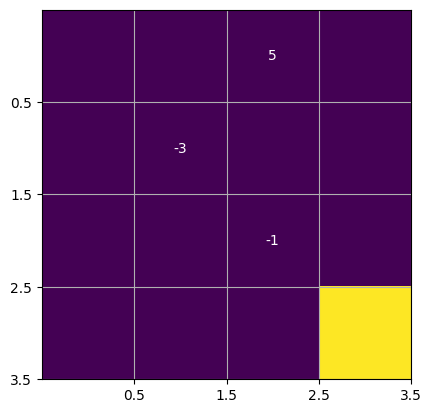

[[12.54626419  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09302477  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64566443  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21576631  4.00669543]
 [ 0.24813599  0.0907518   9.59997959  7.32854562]
 [ 0.          0.          9.99999893  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


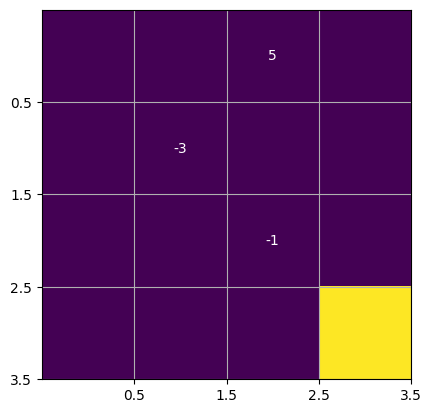

[[12.55248488  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.0948643   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64606166  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21582411  4.00669543]
 [ 0.24813599  0.0907518   9.59998483  7.32854562]
 [ 0.          0.          9.99999922  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


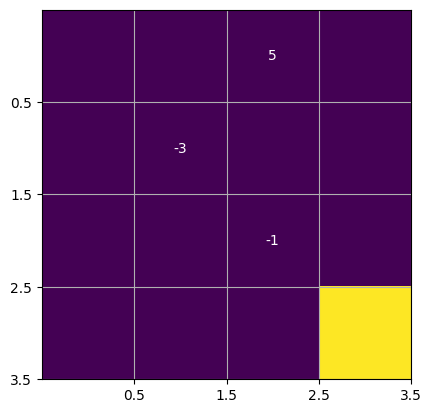

[[12.55750279  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09631012  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64636662  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21586767  4.00669543]
 [ 0.24813599  0.0907518   9.59998872  7.32854562]
 [ 0.          0.          9.99999943  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


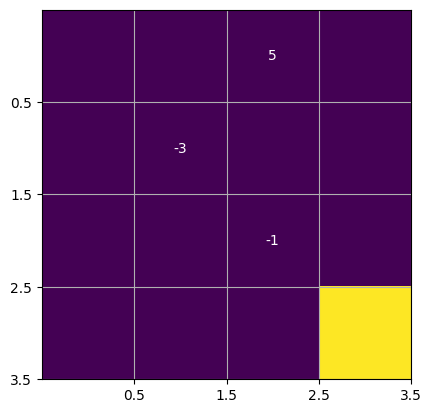

[[12.56154062  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09744462  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64660053  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21590047  4.00669543]
 [ 0.24813599  0.0907518   9.59999162  7.32854562]
 [ 0.          0.          9.99999958  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


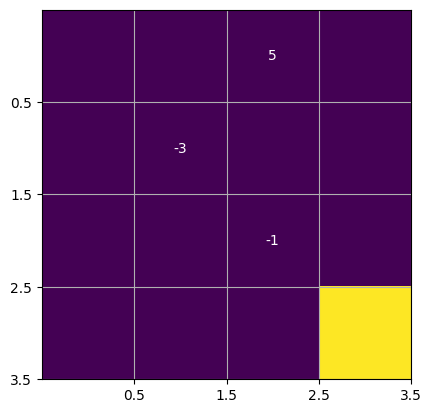

[[12.56478229  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09833343  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.00055385  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21592517  6.60964907]
 [ 0.24813599  0.0907518   9.59999377  7.32854562]
 [ 0.          0.          9.9999997   0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


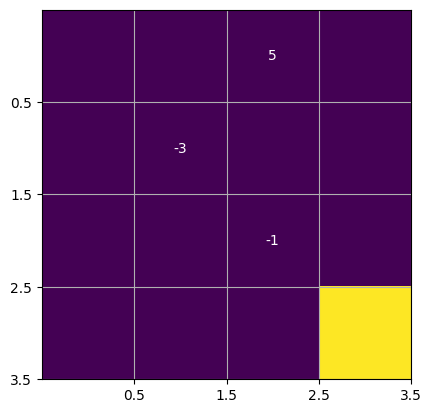

[[12.5673791   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.41312696  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.71517211  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21594376  6.60964907]
 [ 0.24813599  0.0907518   9.59999538  7.32854562]
 [ 0.          0.          9.99999978  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


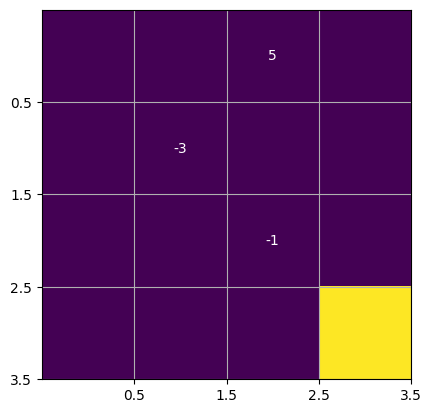

[[12.39166925  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.09815529  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.23684827  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21595775  6.60964907]
 [ 0.24813599  0.0907518   9.59999657  7.32854562]
 [ 0.          0.          9.99999984  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


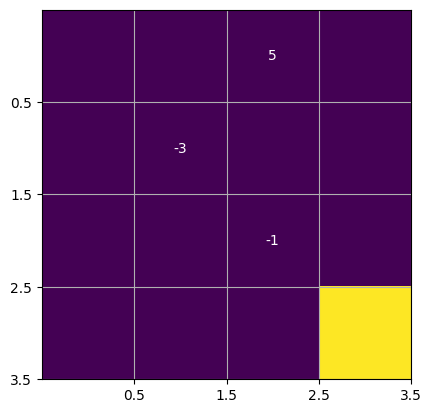

[[12.1817604   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.00344443  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.61767548  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21596827  6.60964907]
 [ 0.24813599  0.0907518   9.59999745  7.32854562]
 [ 0.          0.          9.99999988  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


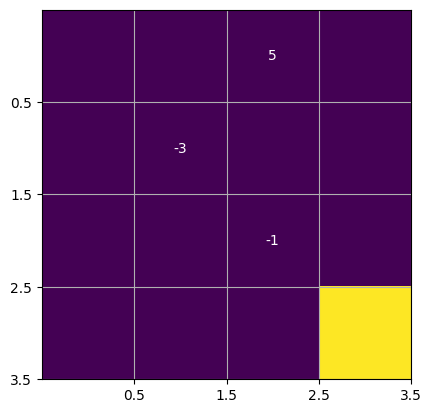

[[12.00397789  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.03301592  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.89568208  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21597617  6.60964907]
 [ 0.24813599  0.0907518   9.59999811  7.32854562]
 [ 0.          0.          9.99999991  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


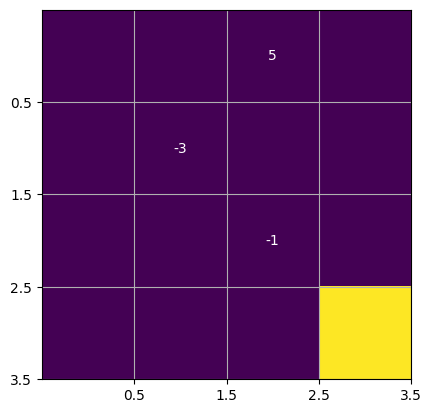

[[11.88186159  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.12666242  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09862894  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21598212  6.60964907]
 [ 0.24813599  0.0907518   9.5999986   7.32854562]
 [ 0.          0.          9.99999994  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


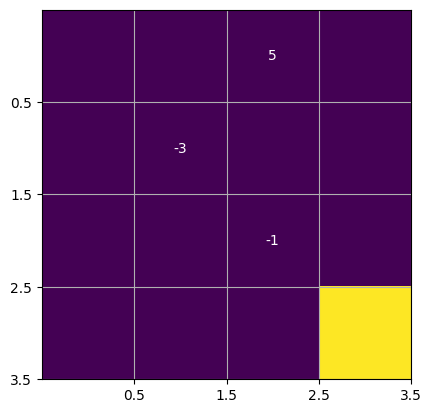

[[11.81698986  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.24762819  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.24678169  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21598658  6.60964907]
 [ 0.24813599  0.0907518   9.59999896  7.32854562]
 [ 0.          0.          9.99999995  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


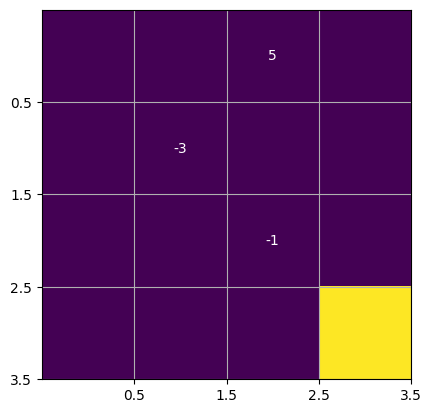

[[11.80098782  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.37433439  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.35493436  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21598993  6.60964907]
 [ 0.24813599  0.0907518   9.59999923  7.32854562]
 [ 0.          0.          9.99999997  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


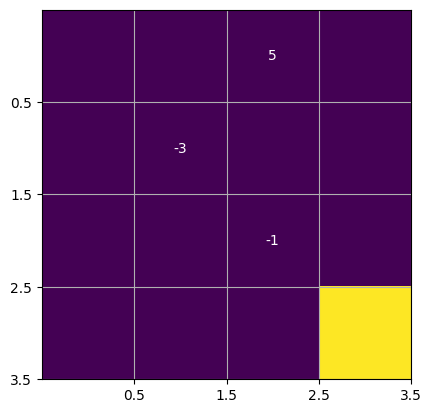

[[11.82214858  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.49486309  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.43388667  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599245  6.60964907]
 [ 0.24813599  0.0907518   9.59999943  7.32854562]
 [ 0.          0.          9.99999998  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


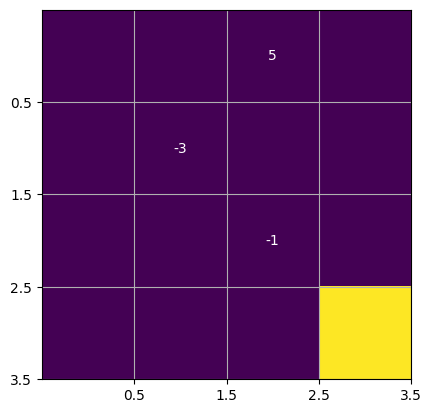

[[11.86883698  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.60331348  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.49152251  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599434  6.60964907]
 [ 0.24813599  0.0907518   9.59999958  7.32854562]
 [ 0.          0.          9.99999998  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


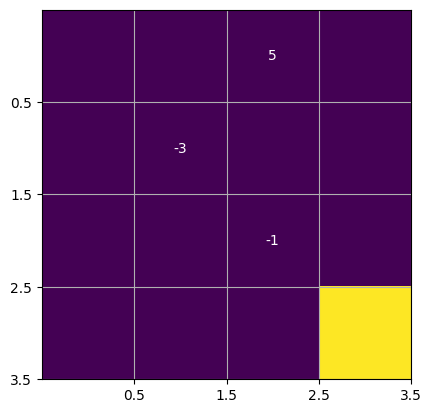

[[11.93102985  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.69742148  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.53359717  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599576  6.60964907]
 [ 0.24813599  0.0907518   9.59999969  7.32854562]
 [ 0.          0.          9.99999999  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


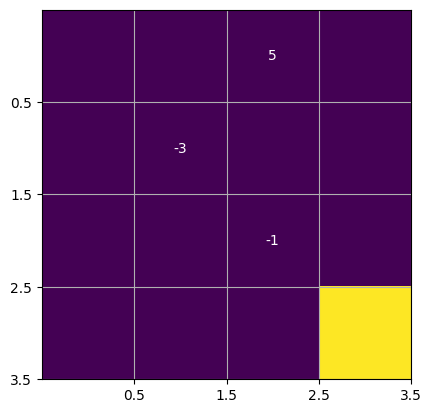

[[12.00082344  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.77702606  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.56431203  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599682  6.60964907]
 [ 0.24813599  0.0907518   9.59999977  7.32854562]
 [ 0.          0.          9.99999999  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


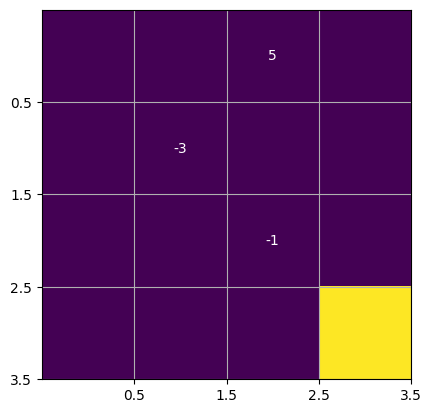

[[12.07240626  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.84309871  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.58673416  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599762  6.60964907]
 [ 0.24813599  0.0907518   9.59999983  7.32854562]
 [ 0.          0.          9.99999999  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


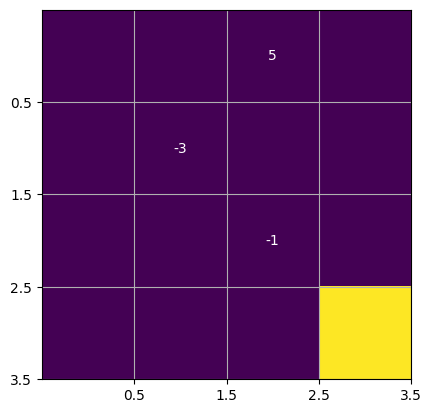

[[12.14178776  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.89714355  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.60310252  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599822  6.60964907]
 [ 0.24813599  0.0907518   9.59999987  7.32854562]
 [ 0.          0.          9.99999999  0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


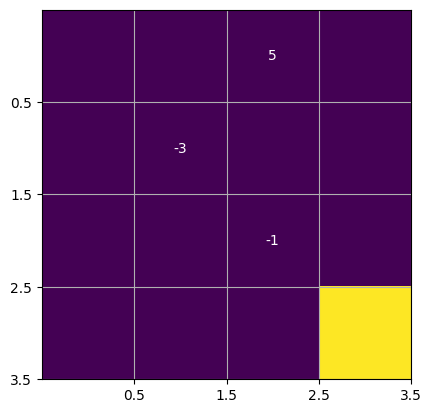

[[12.20644467  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.94083896  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.61505158  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599867  6.60964907]
 [ 0.24813599  0.0907518   9.59999991  7.32854562]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


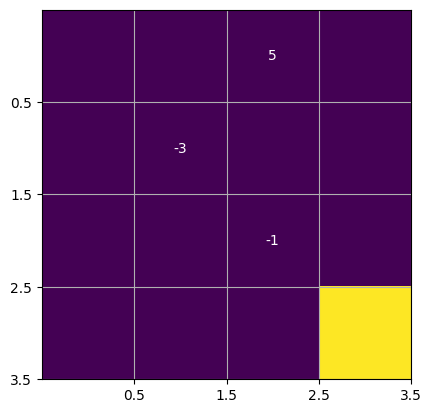

[[12.26497007  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.97583381  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.62377451  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.215999    6.60964907]
 [ 0.24813599  0.0907518   9.59999993  7.32854562]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


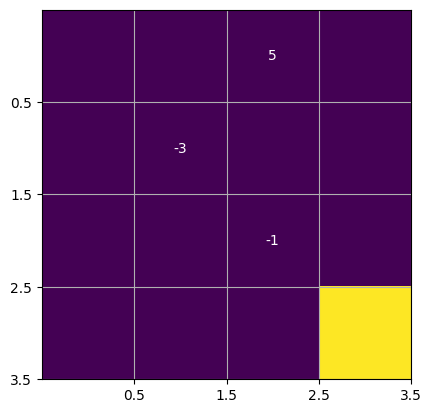

[[12.31676428  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.00364104  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.65857643  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599925  8.50983076]
 [ 0.24813599  0.0907518   9.59999995  7.32854562]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


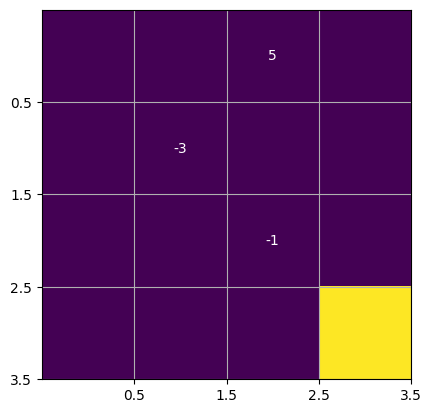

[[12.36178168  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.51456097  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.1955478   0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599944  8.50983076]
 [ 0.24813599  0.0907518   9.59999996  7.32854562]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


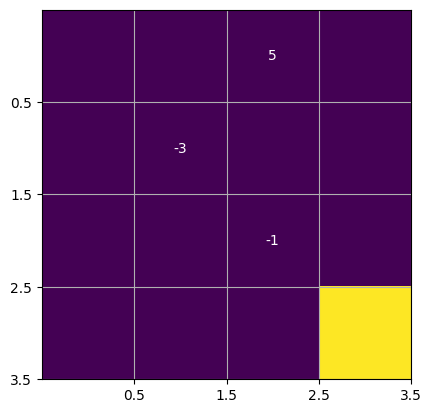

[[12.26787483  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.2967155   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.58753695  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599958  8.50983076]
 [ 0.24813599  0.0907518   9.59999997  7.32854562]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


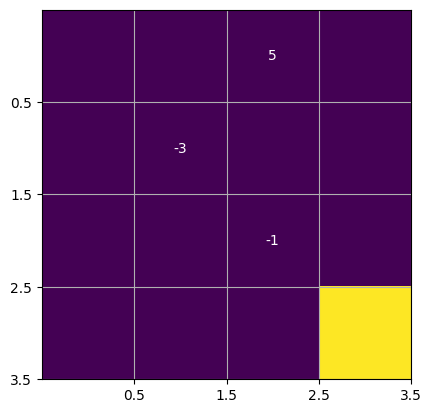

[[12.14285728  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.23929189  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.87368906  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599969  8.50983076]
 [ 0.24813599  0.0907518   9.59999998  7.32854562]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


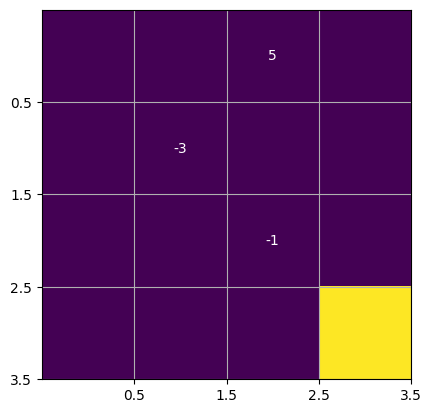

[[12.03671027  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.27154328  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08258014  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 12.43620432  8.50983076]
 [ 0.24813599  0.0907518   9.59999998  8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


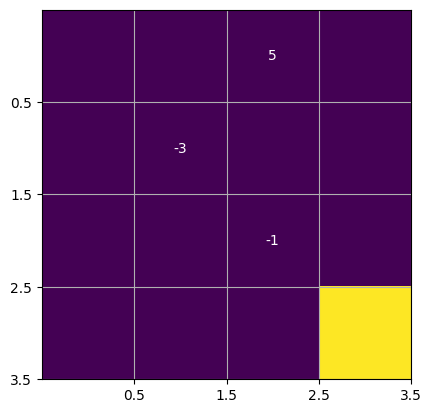

[[11.96758252  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.34923137  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.77374766  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 12.91674915  8.50983076]
 [ 0.24813599  0.0907518   9.59999999  8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


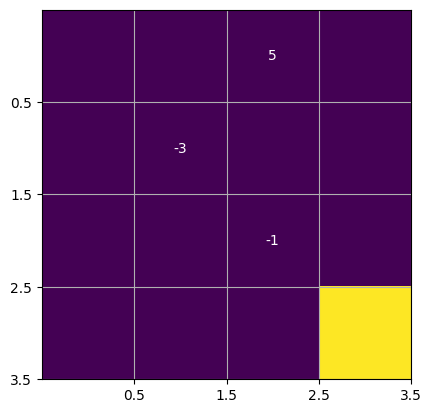

[[11.93725601  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.32589429  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.67285717  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.26754687  8.50983076]
 [ 0.24813599  0.0907518   9.59999999  8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


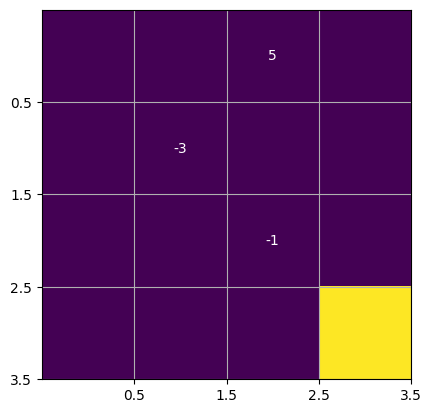

[[11.90906869  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.28270741  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.69013388  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.52362922  8.50983076]
 [ 0.24813599  0.0907518   9.59999999  8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


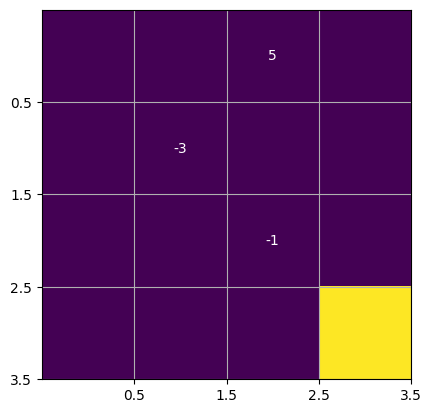

[[11.8772979   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.25565911  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.76912243  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.71056933  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


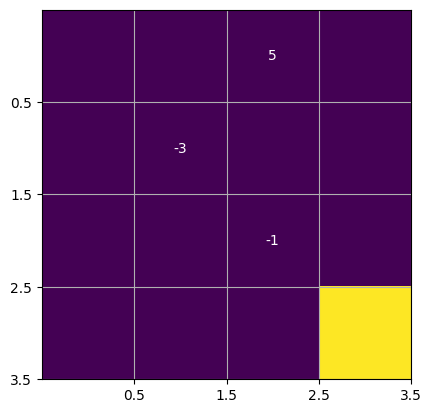

[[11.84709431  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.25638769  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.87523894  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.84703561  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


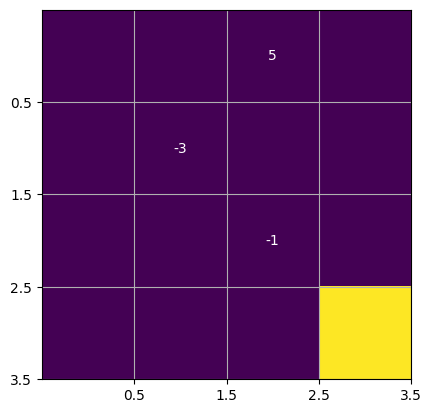

[[11.82523454  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.28442494  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.98807606  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.94665599  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


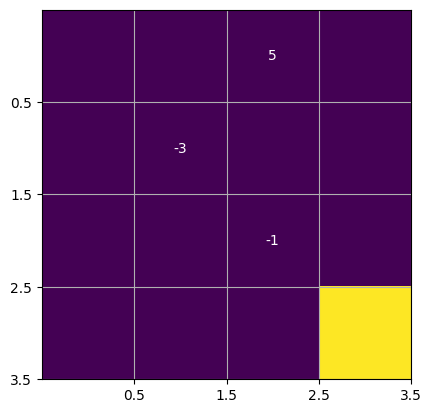

[[11.81654416  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.33413952  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09626875  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.01937887  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


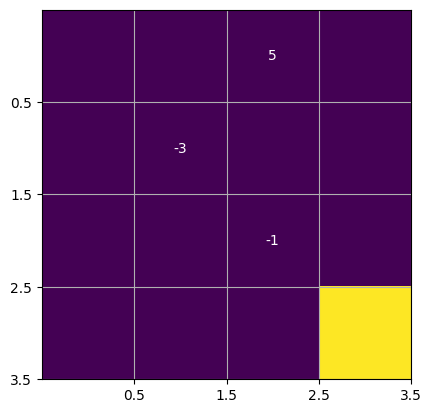

[[11.8230862   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.39847471  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.19409919  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.07246658  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


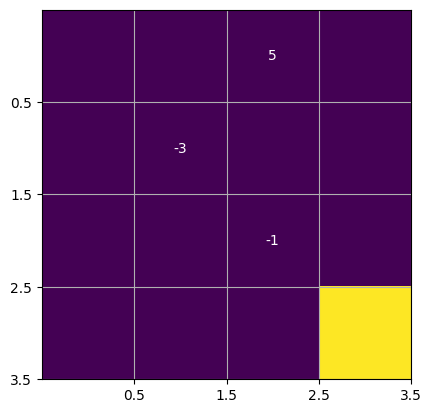

[[11.84453757  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.47079705  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.27927575  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.1112206   8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


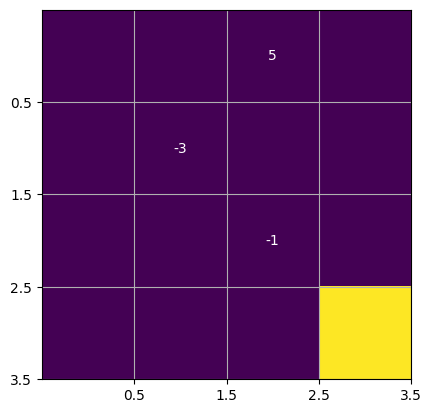

[[11.87894302  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.54567012  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.35149968  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.13951104  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


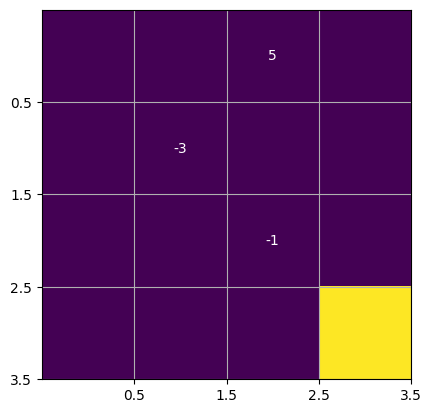

[[11.9234661   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.61904791  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.41155603  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.16016306  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


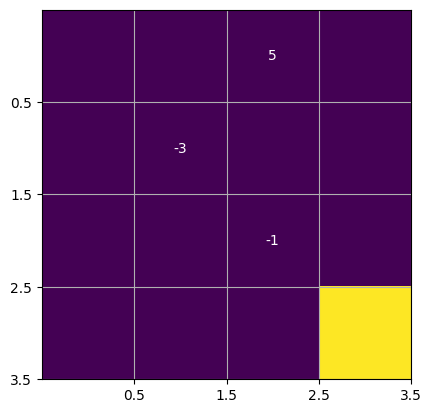

[[11.97498747  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.68818029  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.46075016  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.17523903  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


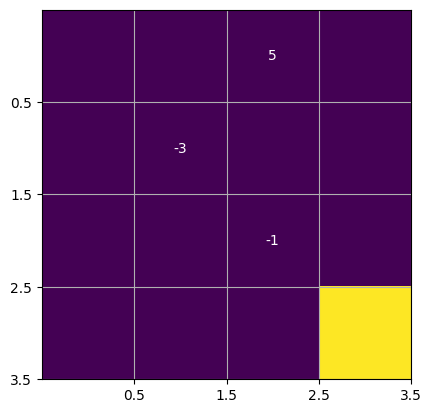

[[12.03051719  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.75139806  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.50056958  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.18624449  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


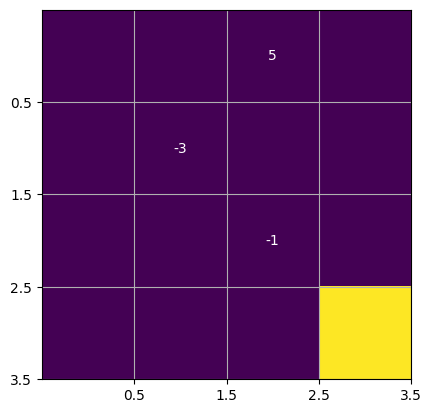

[[12.08743992  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.80786821  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.53249036  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.19427848  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


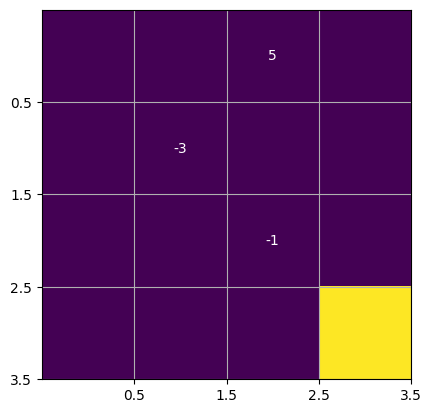

[[12.14363058  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.8573653   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55787495  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.20014329  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


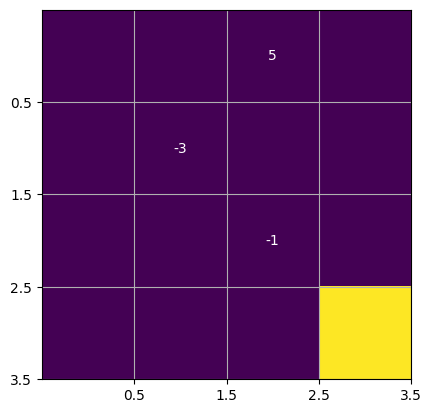

[[12.19747941  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.90007785  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.57792585  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.2044246   8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


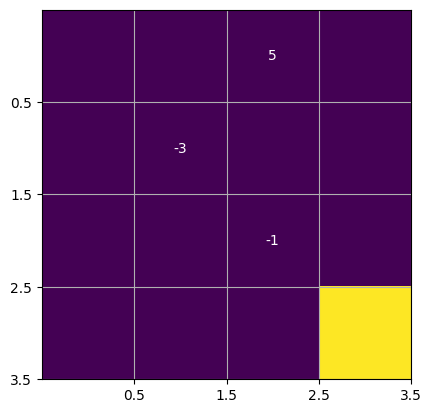

[[12.24786015  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.93645521  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.59367273  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.20754996  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


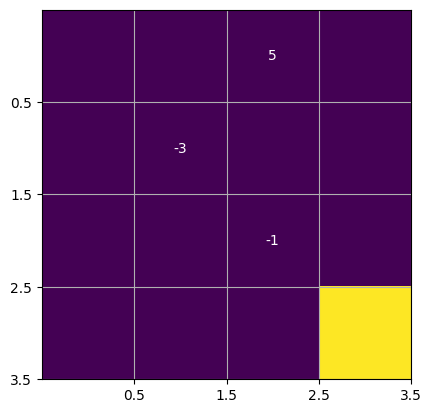

[[12.2940671   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.96709228  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.60597804  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.20983147  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


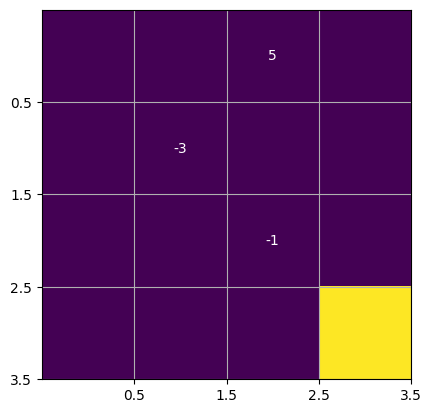

[[12.3357393   0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.99264687  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.61555229  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21149697  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


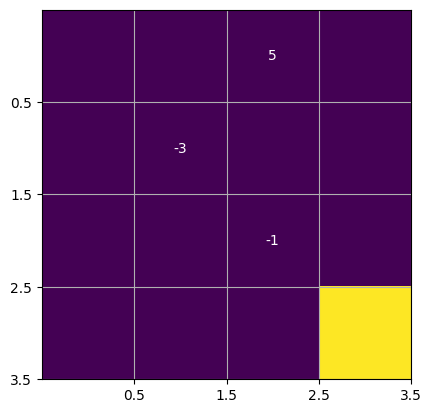

[[12.37278376  0.03435692  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.01378337  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.62297319  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21271279  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


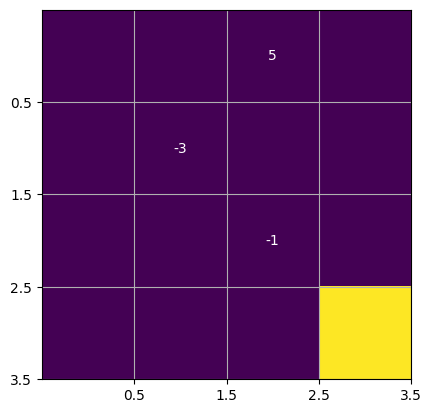

[[12.40530479  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.03113651  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.62870558  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21360034  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


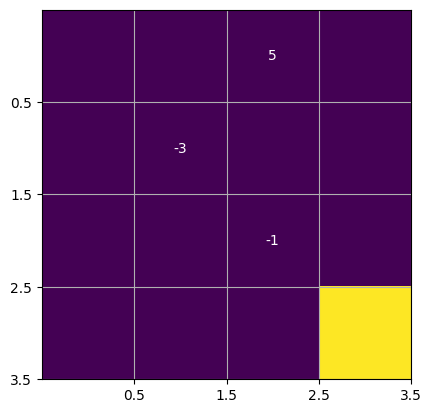

[[12.43354308  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.04529014  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.63312028  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21424825  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


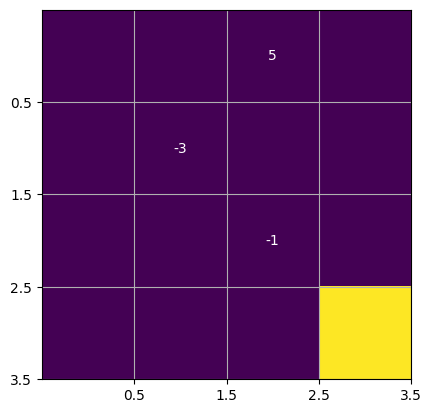

[[12.45782565  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.05676658  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.63651095  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21472122  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


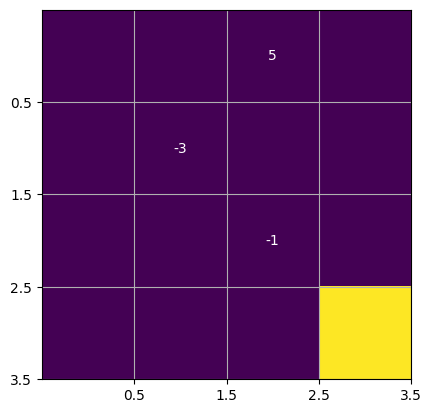

[[12.47852662  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.06602324  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.63910873  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21506649  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


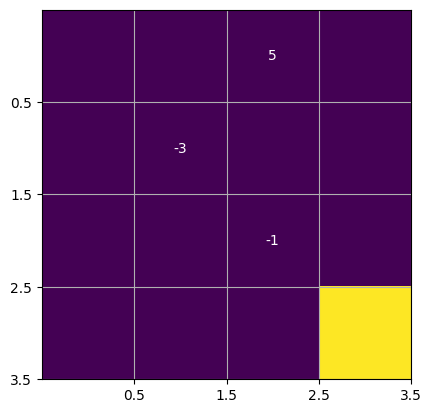

[[12.49603766  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.07345395  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64109461  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21531854  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


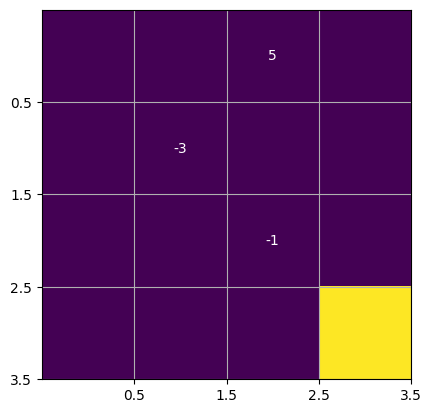

[[12.51074676  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.07939311  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64260963  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21550253  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


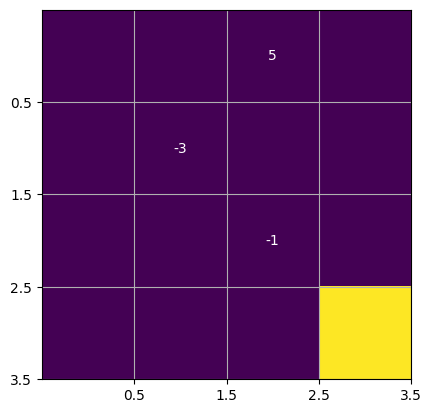

[[12.52302382  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08412138  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64376329  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21563685  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


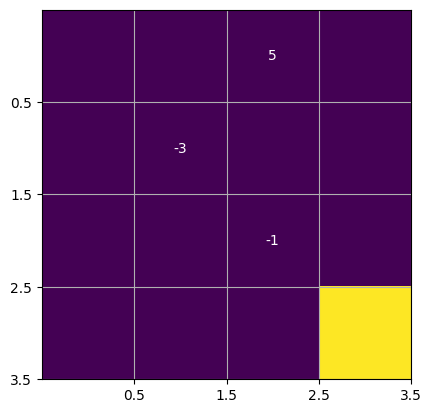

[[12.53321165  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08787205  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64464027  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.2157349   8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


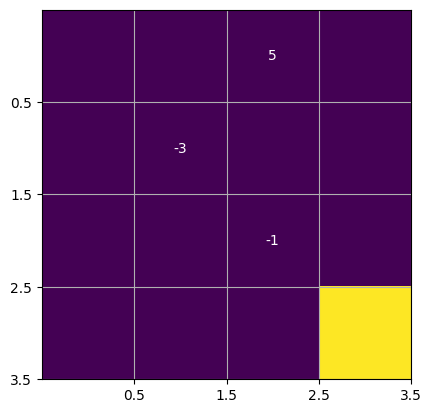

[[12.54162094  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09083736  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64530588  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21580648  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


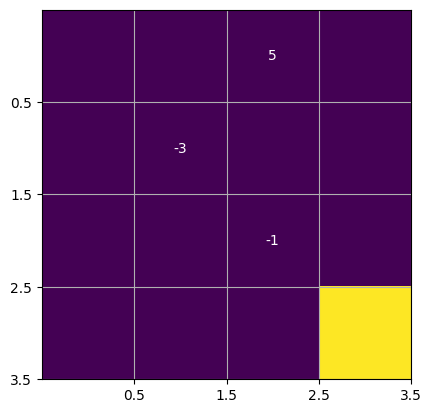

[[12.54852833  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09317456  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64581033  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21585873  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


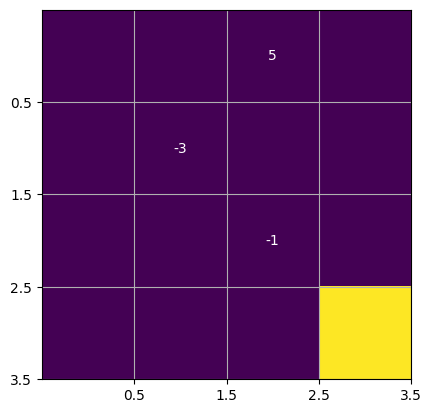

[[12.55417653  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09501146  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64619213  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21589687  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


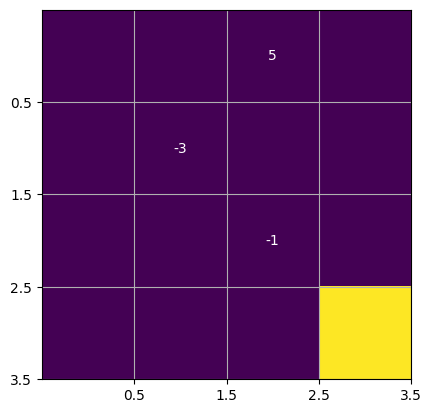

[[12.55877584  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09645137  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64648072  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21592472  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


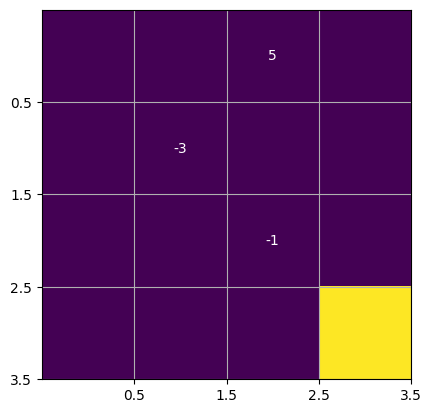

[[12.56250656  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.0975773   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64669861  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21594504  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


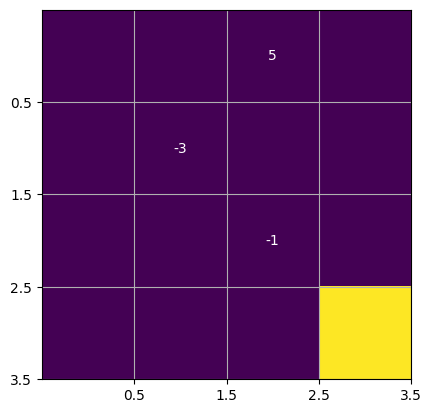

[[12.56552182  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09845571  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64686294  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21595988  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


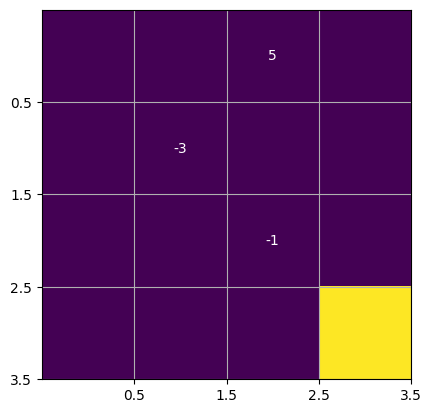

[[12.56795065  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09913954  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64698675  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21597071  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


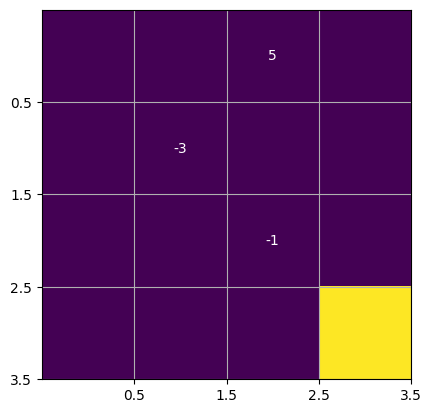

[[12.56990094  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09967083  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64707994  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21597862  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


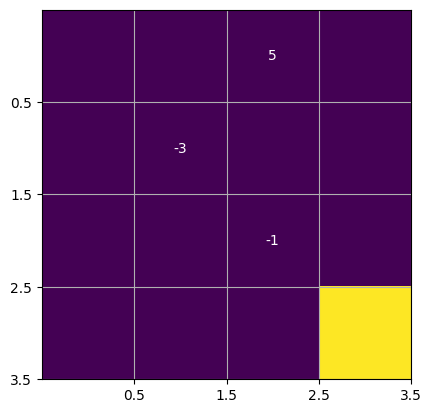

[[12.57146237  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10008283  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64715001  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21598439  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


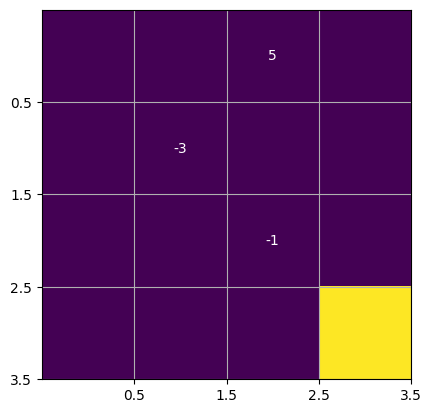

[[12.572709    0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10040175  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64720266  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21598861  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


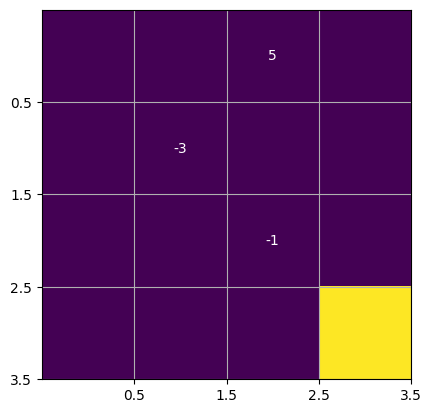

[[12.5737017   0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10064821  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64724219  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599168  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


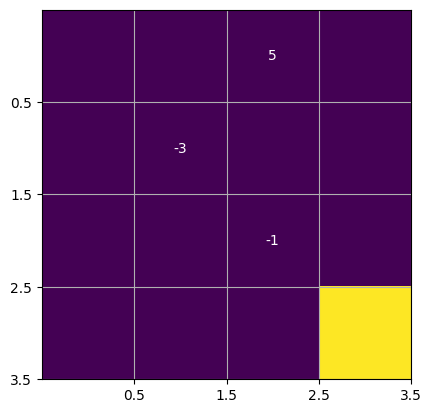

[[12.57449026  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10083837  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64727184  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599393  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


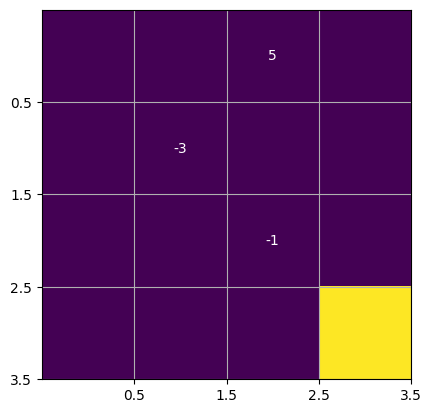

[[12.57511519  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10098487  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64729407  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599557  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


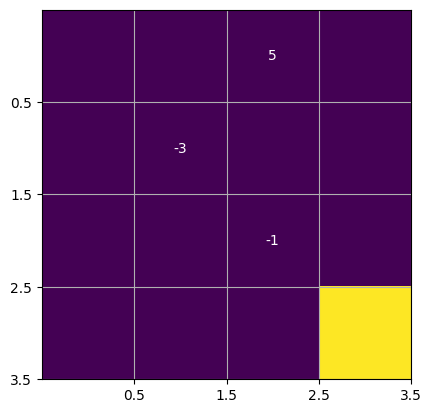

[[12.57560937  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10109758  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64731072  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599676  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


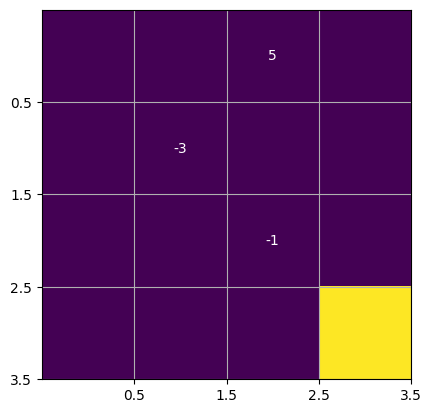

[[12.57599933  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10118417  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64732319  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599764  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


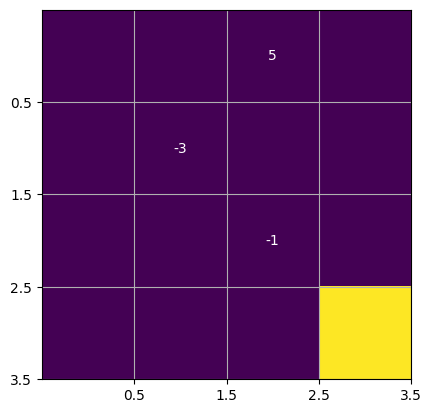

[[12.57630645  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10125062  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64733252  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599828  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


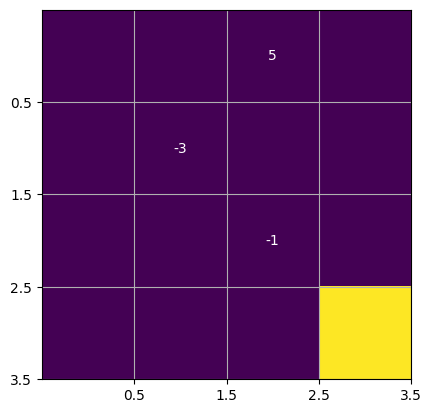

[[12.57654787  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10130154  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64733949  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599874  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


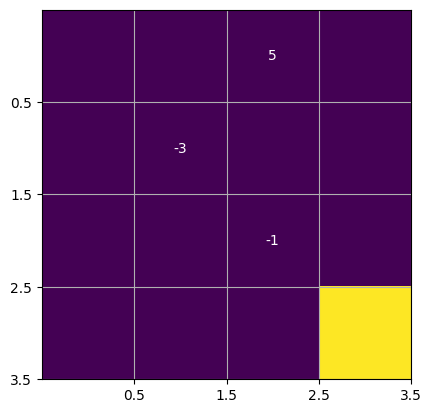

[[12.5767373   0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10134052  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.6473447   0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599908  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


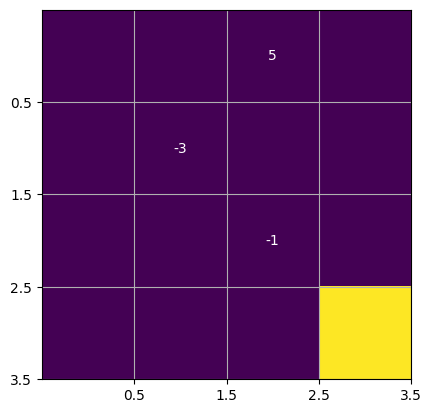

[[12.57688569  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10137033  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64734859  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599933  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


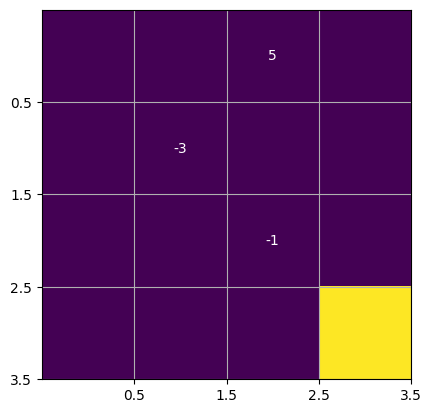

[[12.57700174  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10139309  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.6473515   0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599951  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


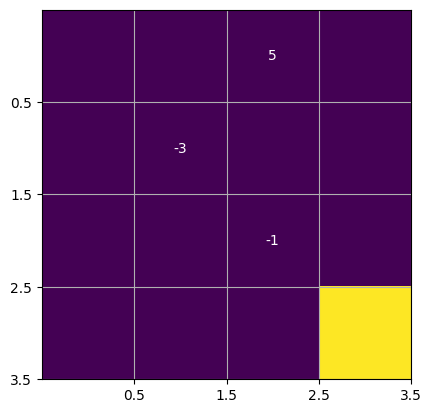

[[12.57709236  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10141047  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64735367  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599964  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


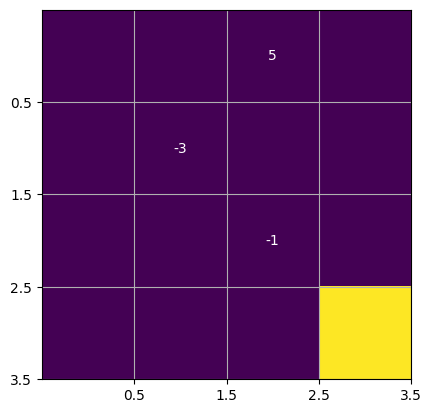

[[12.57716302  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10142371  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64735528  0.          0.44823745  0.06621046]
 [ 4.38316802  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599974  8.50983076]
 [ 0.24813599  0.0907518   9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


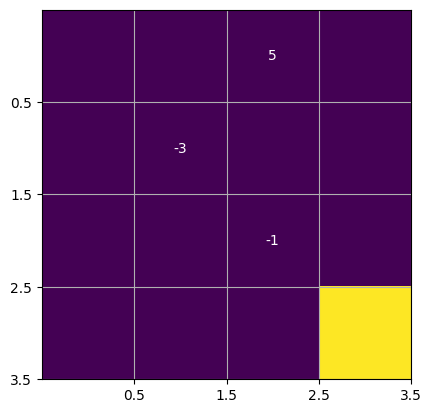

[[12.57721803  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.1014338   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64735649  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 11.75120268  8.50983076]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


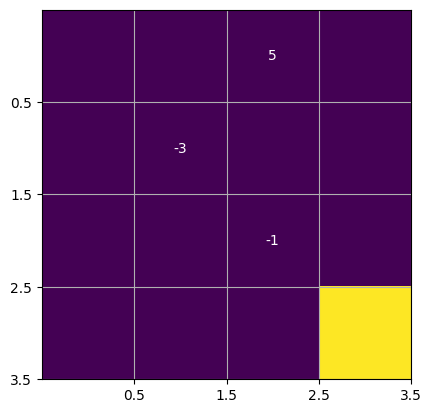

[[12.5772608   0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10144148  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.00848197  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 12.41669795  8.50983076]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


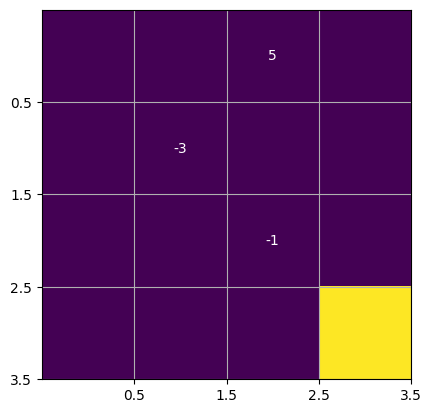

[[12.57729402  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.9358508   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.71459995  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 12.90250951  8.50983076]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


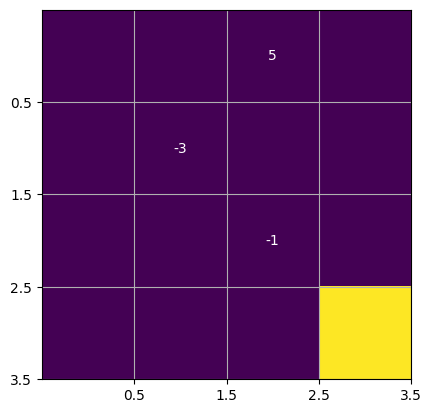

[[12.53439716  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.73879539  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.62598843  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.25715194  8.50983076]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


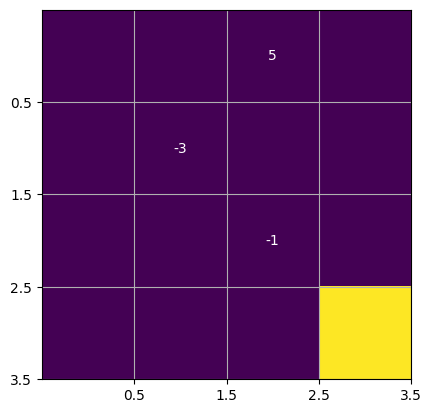

[[12.45200569  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.57197684  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.65322533  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.51604092  8.50983076]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


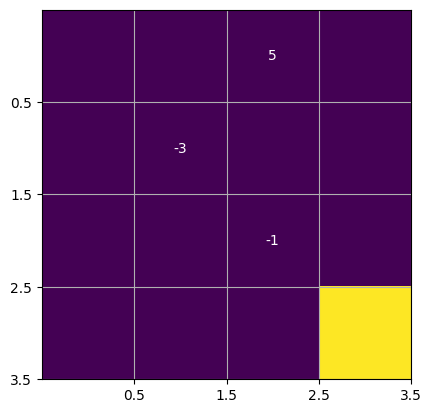

[[12.34862055  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.4572591   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.7402123   0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.70502987  8.50983076]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


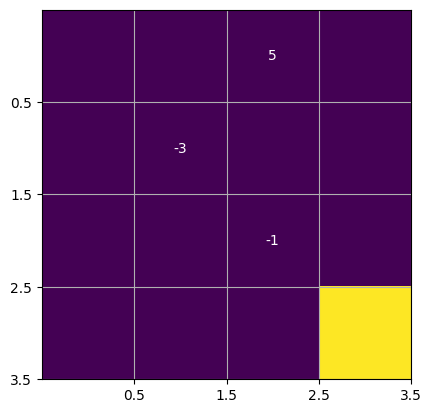

[[12.24341456  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.39606217  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.85269872  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.8429918   8.50983076]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


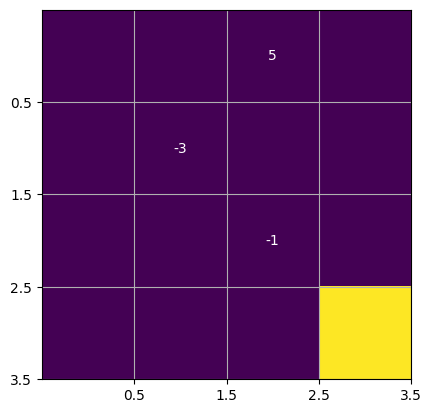

[[12.15075194  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.38054489  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.97057354  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.94370402  8.50983076]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


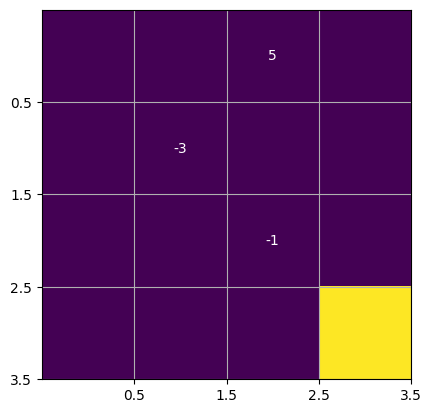

[[12.07908616  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.39977043  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08272677  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.01722393  8.50983076]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


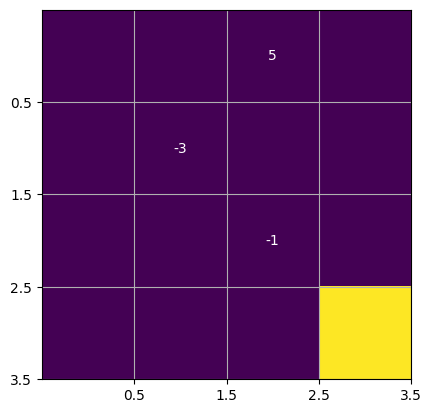

[[12.03175339  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.44287519  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.18365498  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.07089347  8.50983076]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


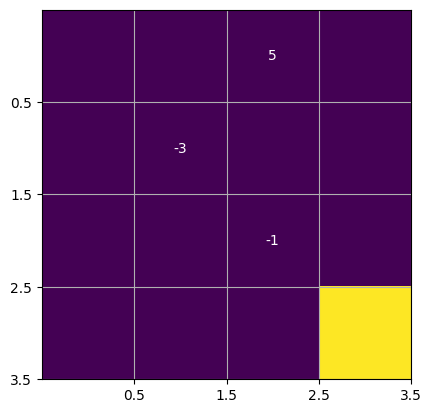

[[12.00837322  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.50050226  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.82981627  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.11007223  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


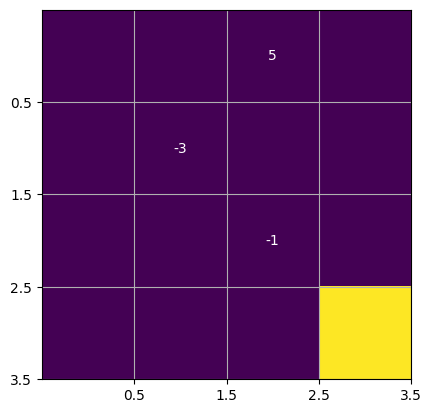

[[12.00624264  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.19165503  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.2930966   0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.13867273  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


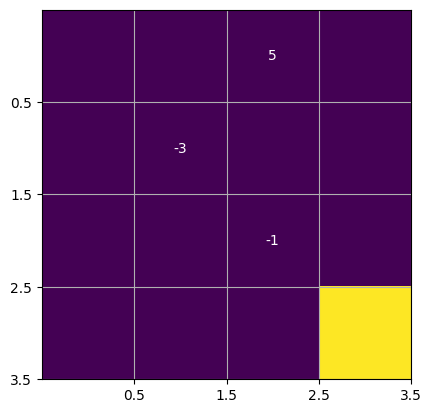

[[11.92463411  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.08627881  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.63870449  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.15955109  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


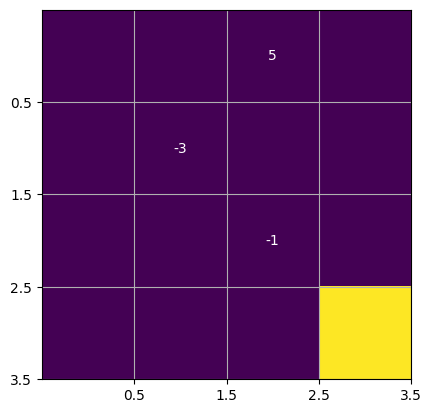

[[11.83774637  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.09893574  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.89640992  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.1747923   9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


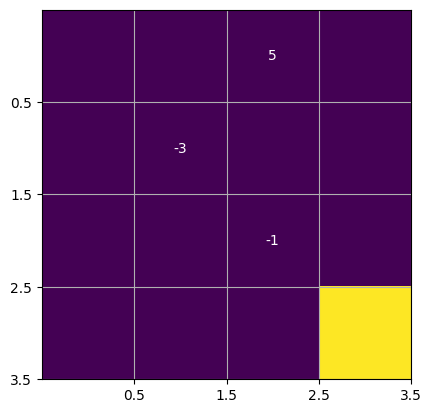

[[11.77759899  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.17497254  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08848541  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.18591838  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


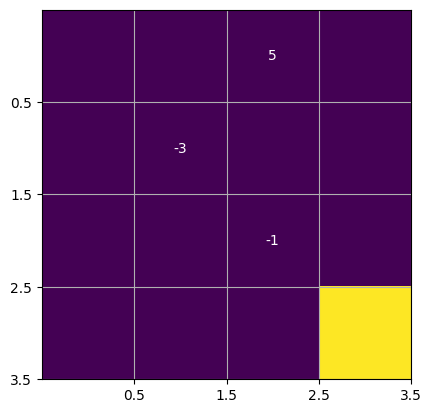

[[11.75340015  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.28026537  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.23158439  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.19404042  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


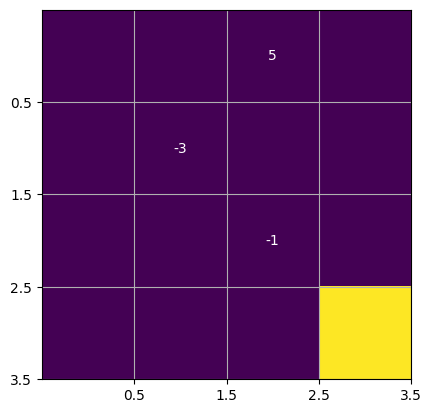

[[11.76302689  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.39422039  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.33815188  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.1999695   9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


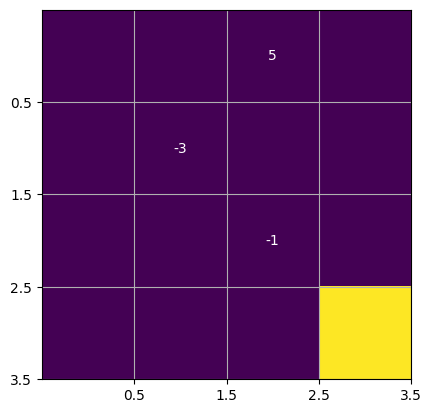

[[11.79959156  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.50502986  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.41748297  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.20429774  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


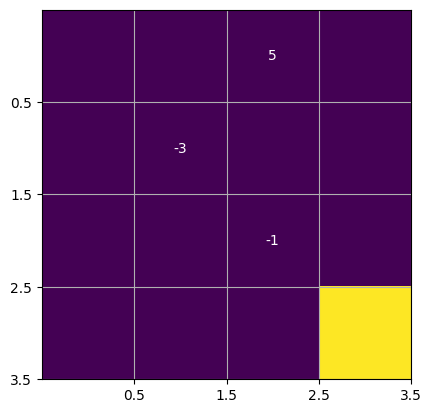

[[11.85500557  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.60648338  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.47651654  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.20745735  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


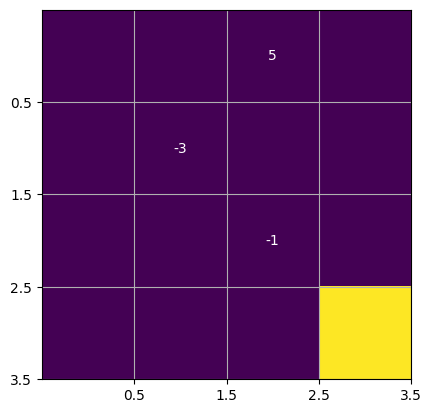

[[11.92175456  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.69584595  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.52043002  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.20976386  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


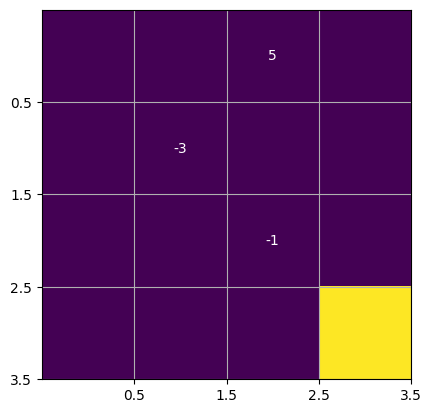

[[11.9936441   0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.77246301  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.55308471  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21144762  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


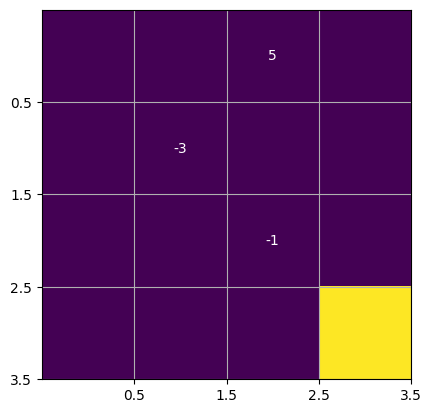

[[12.06598261  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.83685755  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.57735906  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21267676  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


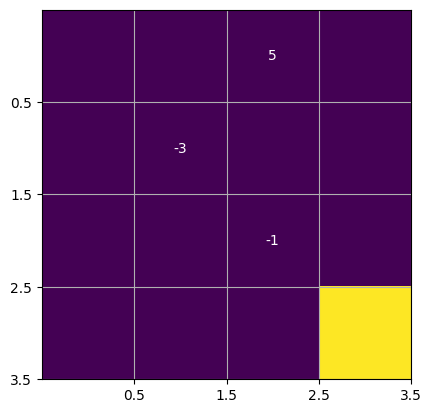

[[12.13548078  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.89015748  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.59539793  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21357404  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


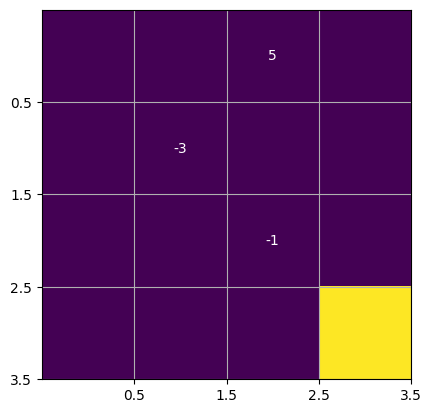

[[12.20002979  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.9337421   0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.60879888  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21422905  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


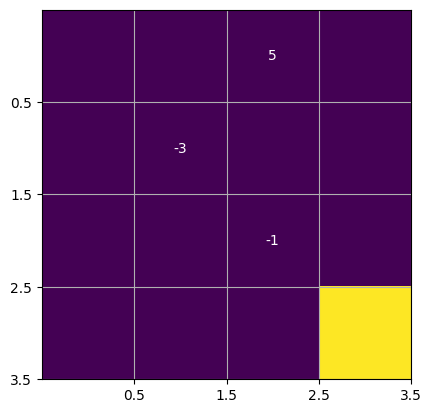

[[12.2584477   0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.96903241  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.61875135  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.2147072   9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


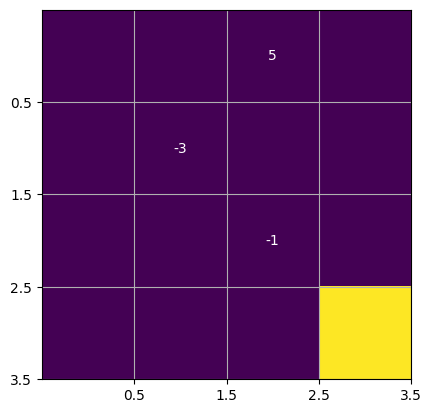

[[12.31024002  0.03435692  0.          3.20702555]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.99737401  0.         -0.81        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.62614059  0.          0.44823745  0.06621046]
 [ 5.68803265  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21505626  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


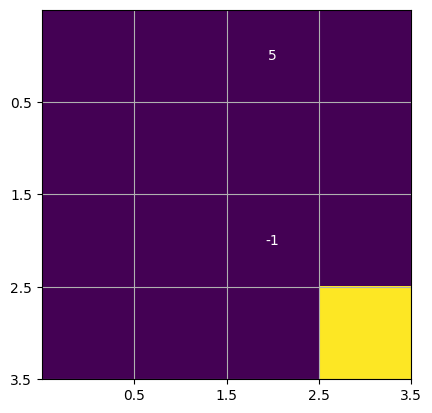

[[12.31024002  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.99737401  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.62614059  0.          0.44823745  0.06621046]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21505626  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


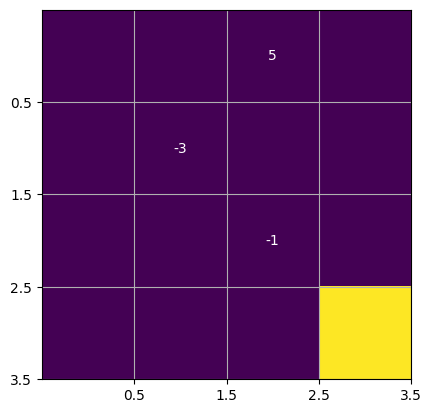

[[12.35539456  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.01997867  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.63162522  0.          0.44823745  0.06621046]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21531107  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


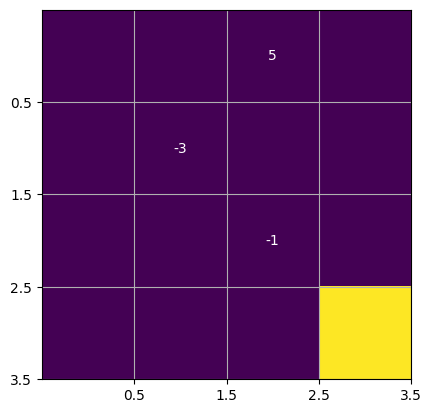

[[12.3942165   0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.03790168  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.63569504  0.          0.44823745  0.06621046]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21549708  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


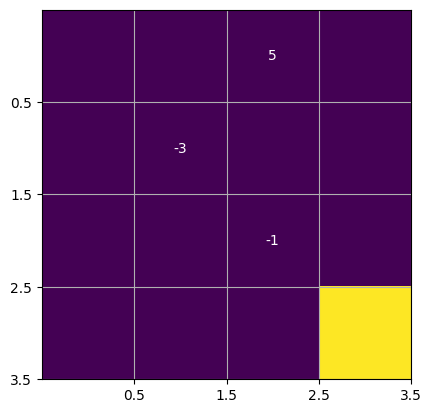

[[12.42720216  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 9.53482998  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.63871422  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21563287  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


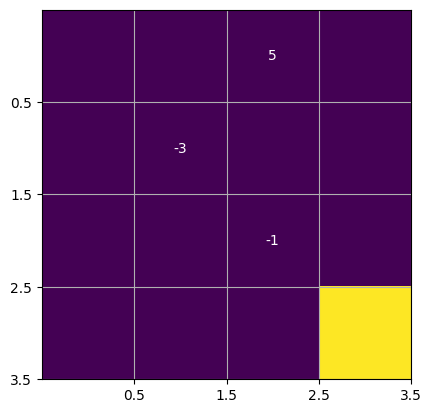

[[11.54328551  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [10.49558061  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64095342  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21573199  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


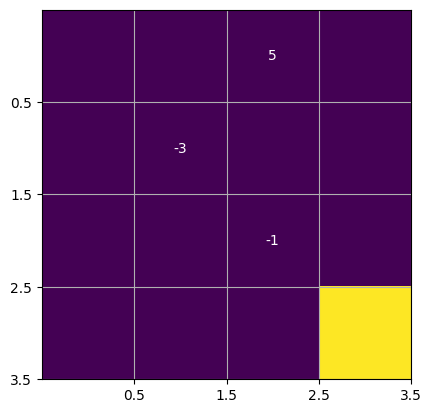

[[11.14705291  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.19750897  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64261373  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21580436  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


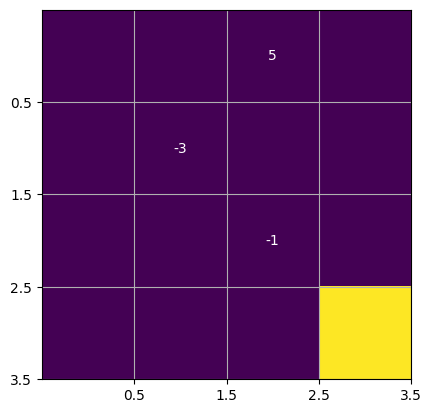

[[11.03974295  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [11.71034703  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64384451  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21585718  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


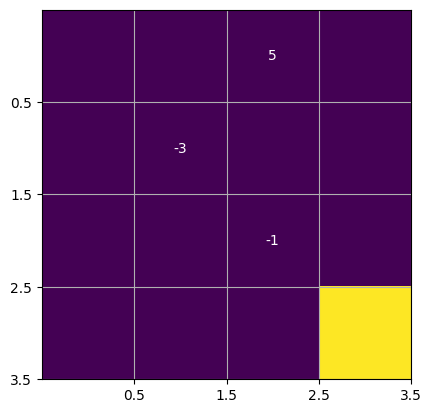

[[11.09433431  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.08503783  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64475667  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21589574  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


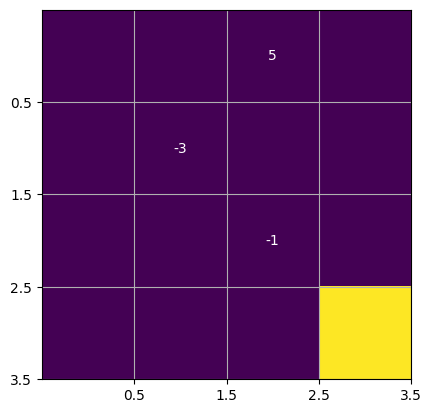

[[11.23130585  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.35879854  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64543255  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21592389  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


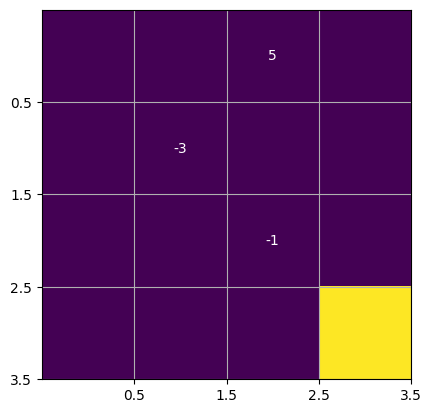

[[11.40225385  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.55881905  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64593323  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21594444  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


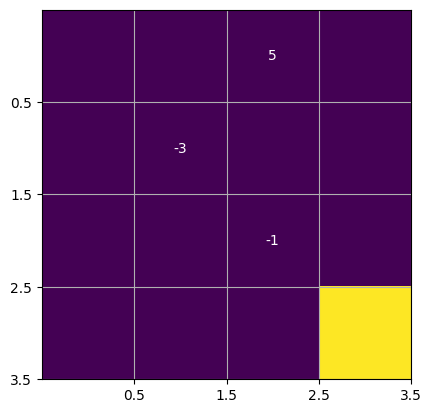

[[11.57889121  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.7049638   0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64630406  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21595944  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


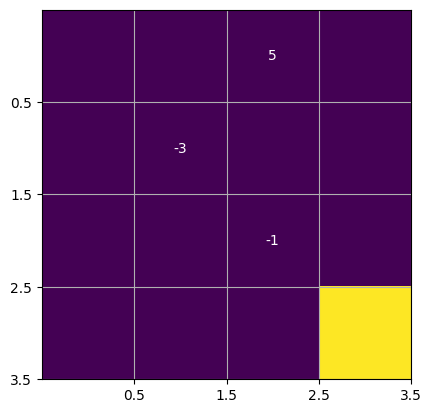

[[11.7457172   0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.81174559  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64657865  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21597039  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


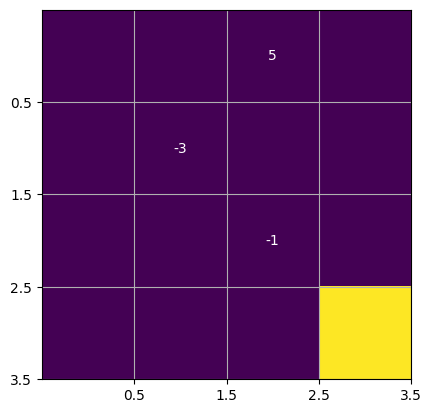

[[11.89517801  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.88976747  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64678194  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21597839  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


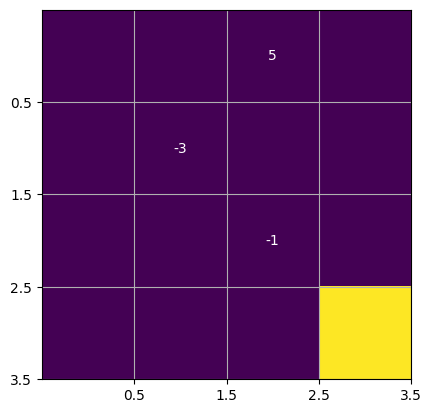

[[12.02450768  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.94677613  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64693241  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21598422  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


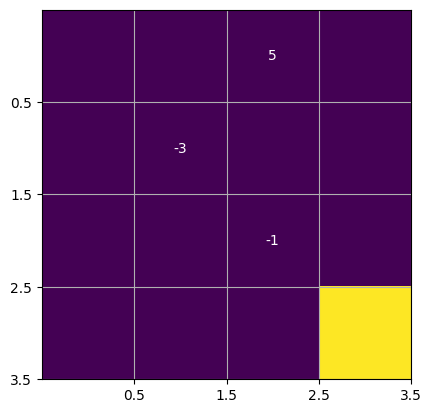

[[12.13369498  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.98843146  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64704377  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21598848  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


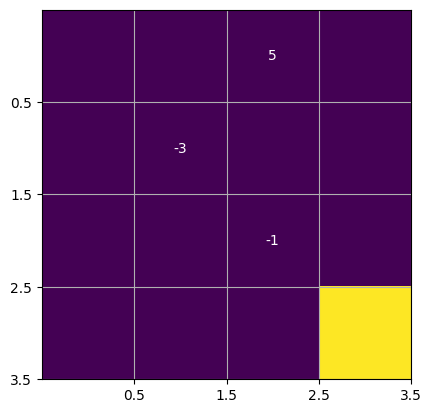

[[12.22419877  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.01886871  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64712617  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599159  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


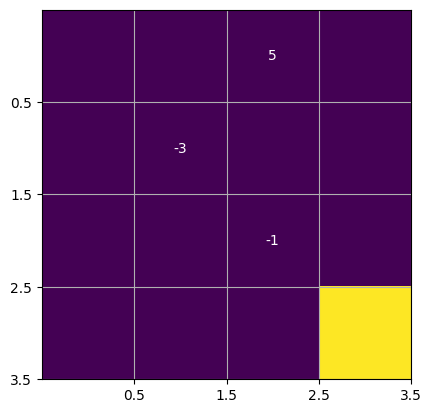

[[12.29815587  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.04110926  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64718712  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599386  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


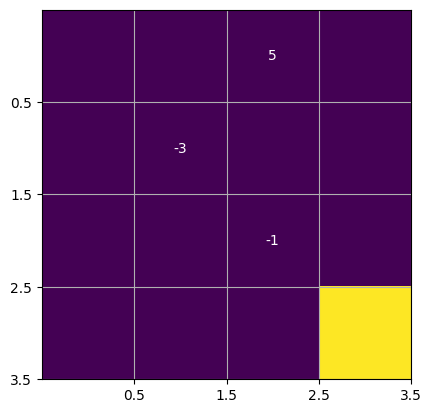

[[12.3579093   0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.05736066  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64723221  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599552  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


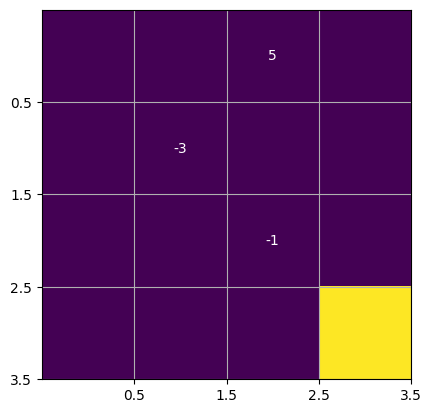

[[12.40574168  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.06923587  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64726555  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599673  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


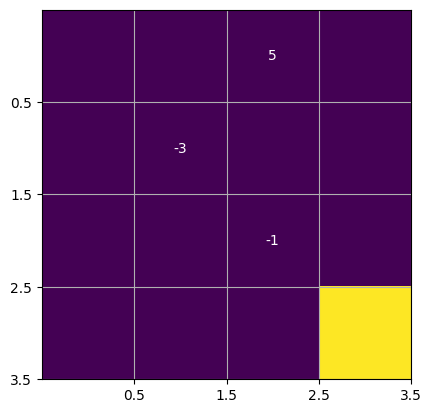

[[12.44373736  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.07791342  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.6472902   0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599761  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


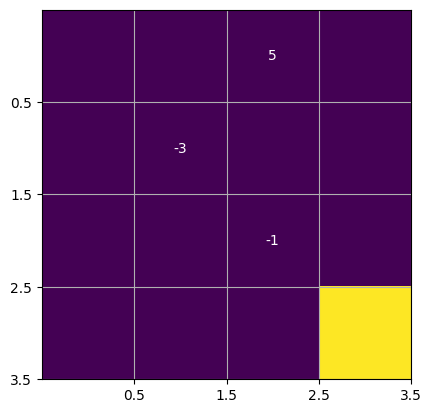

[[12.47372343  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08425442  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64730843  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599826  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


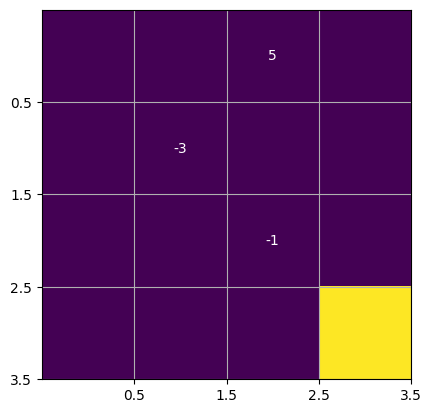

[[12.49725685  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08888807  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.6473219   0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599873  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


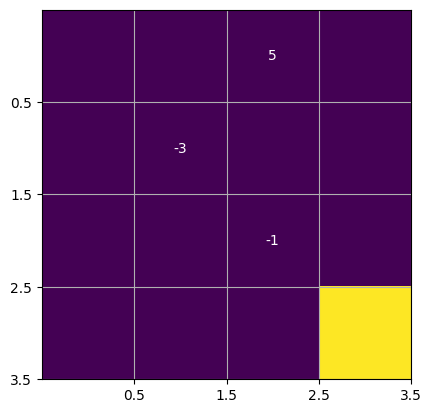

[[12.51563729  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09227413  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64733186  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599907  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


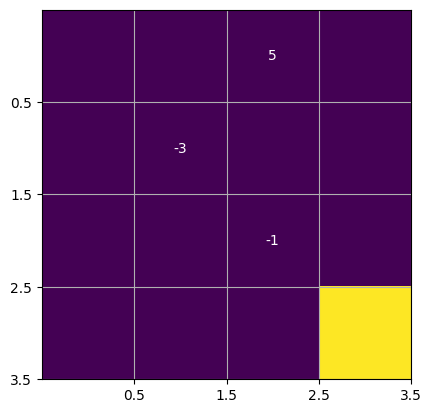

[[12.52993267  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09474853  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64733922  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599932  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


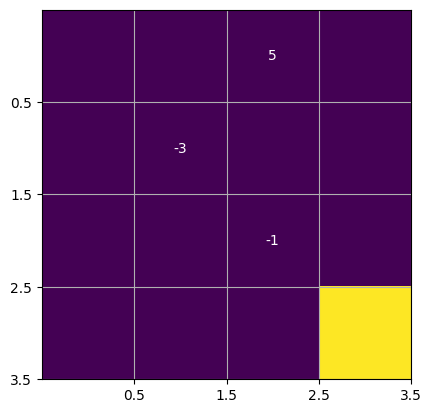

[[12.54100967  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09655675  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64734465  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599951  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


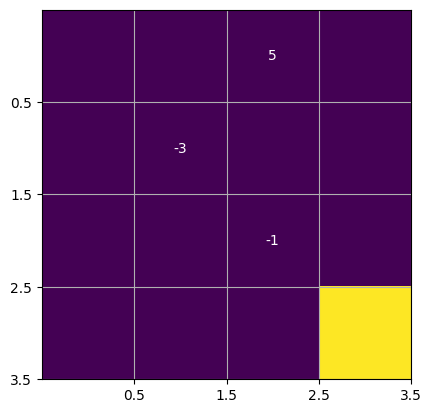

[[12.54956457  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09787816  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64734867  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599964  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


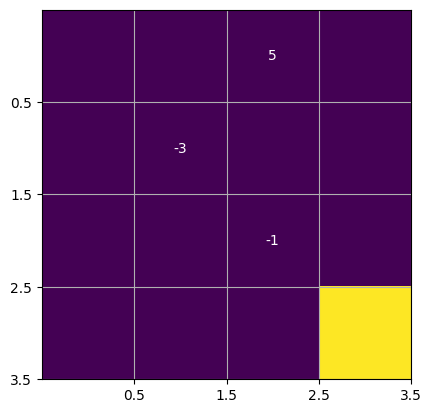

[[12.55615216  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09884383  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64735163  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599974  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


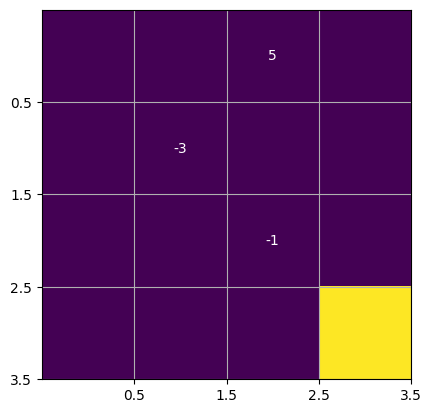

[[12.5612114   0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09954954  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64735382  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599981  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


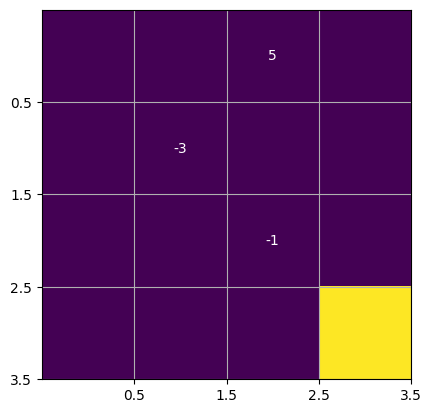

[[12.56508756  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10006528  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64735544  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599986  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


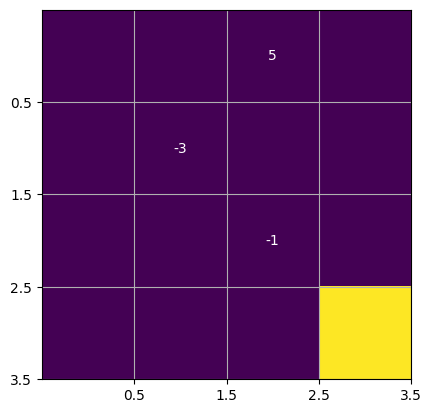

[[12.56805084  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10044218  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64735664  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.2159999   9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


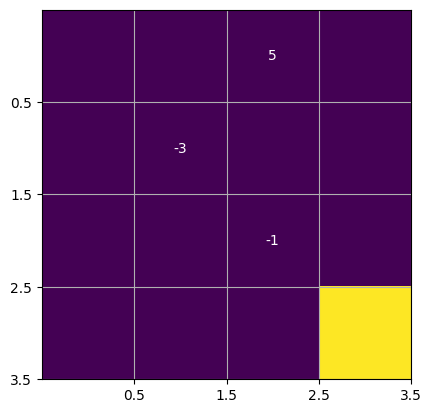

[[12.57031173  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10071763  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64735752  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599993  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


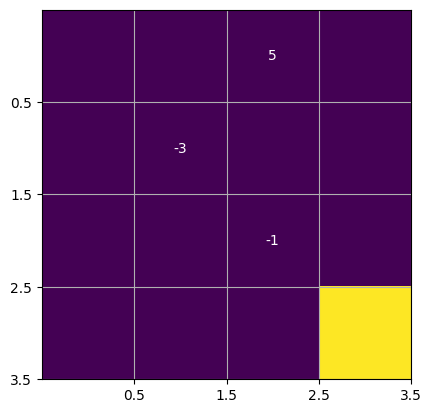

[[12.57203357  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10091894  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64735817  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599995  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


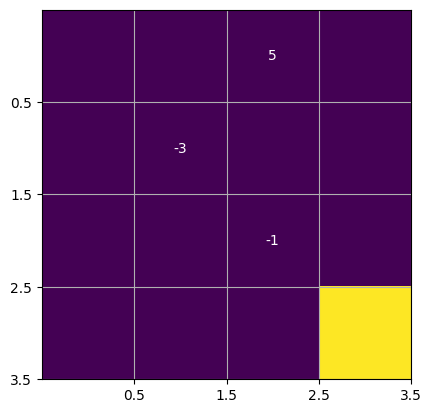

[[12.5733427   0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10106606  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64735865  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599996  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


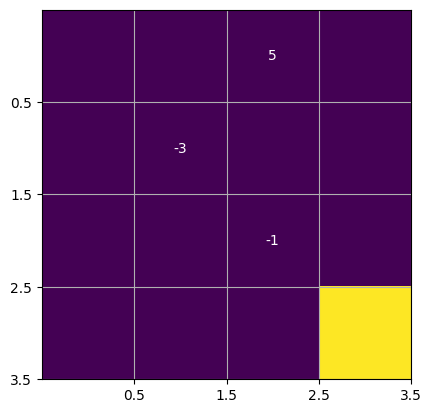

[[12.57433649  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10117359  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.647359    0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599997  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


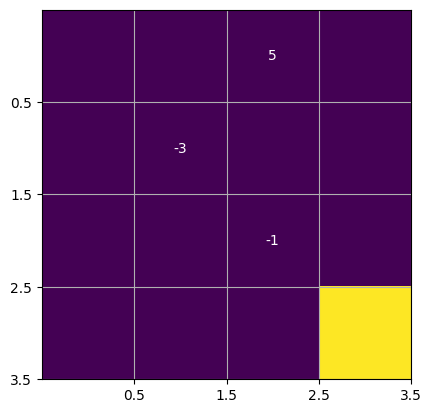

[[12.57508983  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10125217  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64735926  0.          0.44823745  3.58270579]
 [ 7.99058384  0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599998  9.85935204]
 [ 0.24813599  1.20236597  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


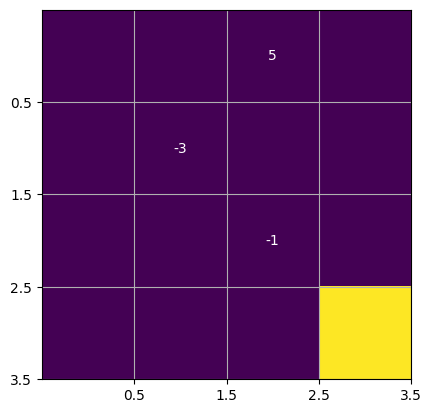

[[12.57566014  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10130961  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64735946  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 12.03933324  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


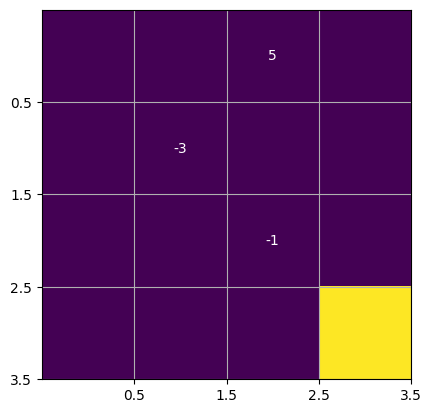

[[12.57609135  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10135159  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08316758  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 12.62703327  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


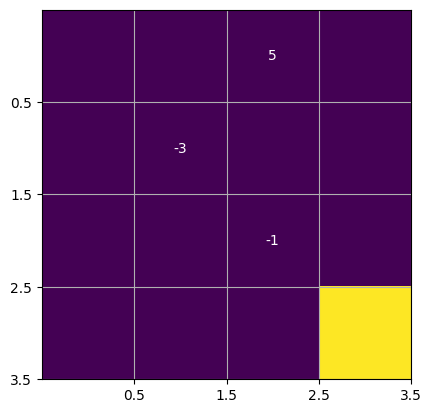

[[12.57641702  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.95514369  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.82363936  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.05605429  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


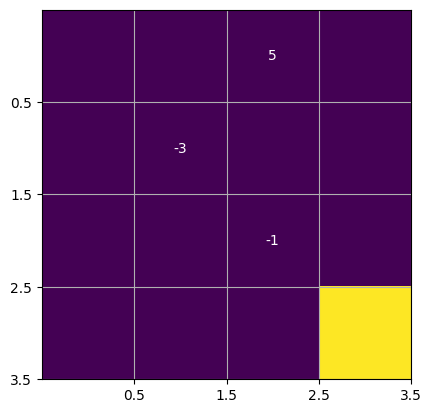

[[12.53875767  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.78114222  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.745386    0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.36923963  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


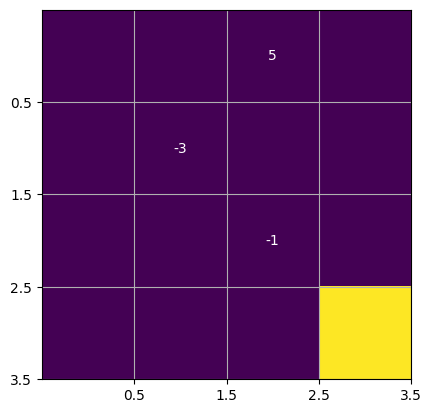

[[12.46616516  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.63383787  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.76943869  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.59786493  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


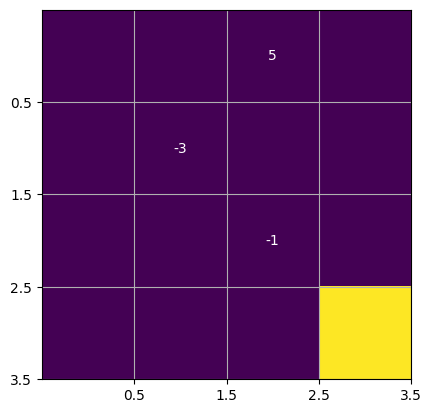

[[12.37499134  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.53254015  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.84625684  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.7647614   9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


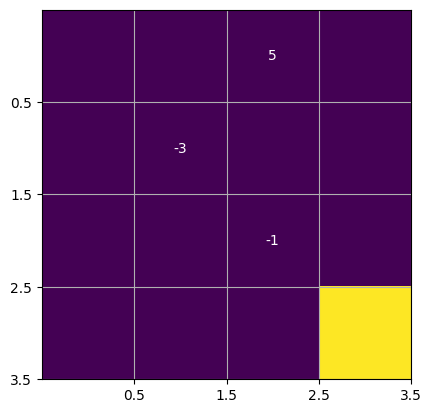

[[12.28217809  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.47850408  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.94559364  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.88659582  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


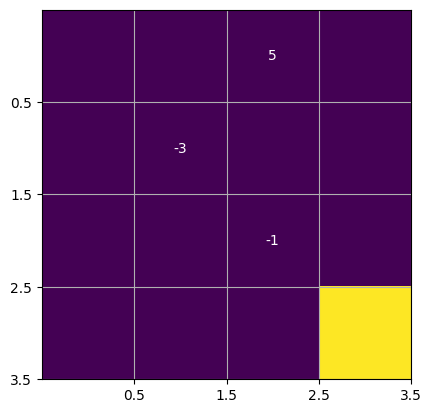

[[12.20041826  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.46480585  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.049689    0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 13.97553495  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


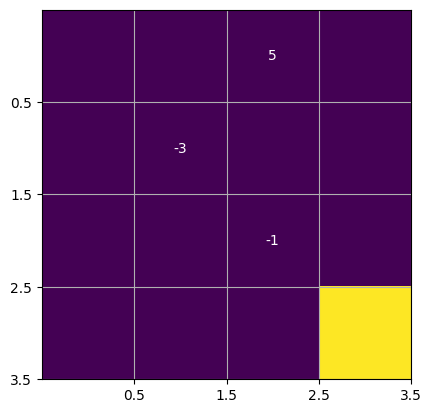

[[12.13718301  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.48178766  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.14873163  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.04046051  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


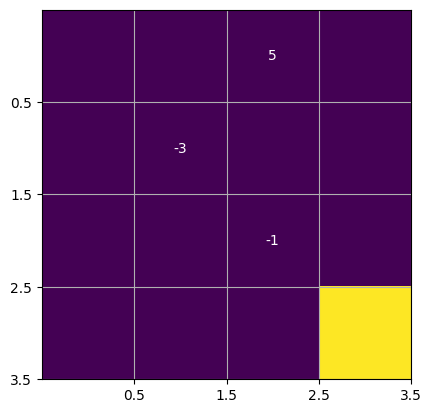

[[12.09542296  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.51985623  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.23786145  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.08785617  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


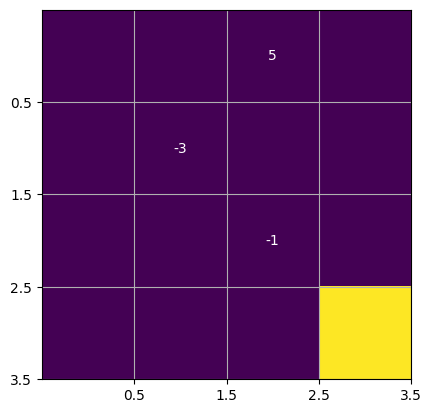

[[12.0748055   0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.57074874  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.31521118  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.12245501  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


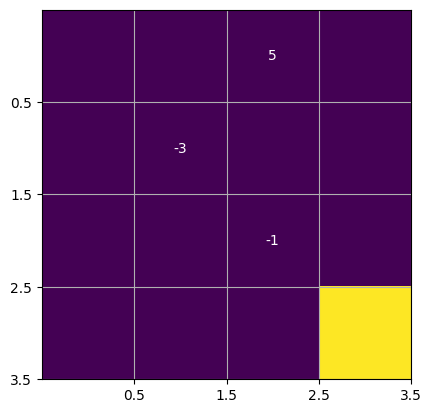

[[12.07294608  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.62794932  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.3806445   0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.14771216  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


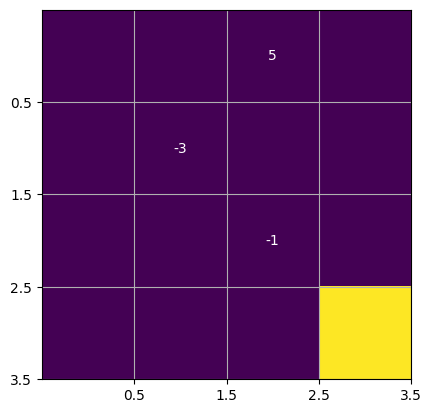

[[12.0864151   0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.68666605  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.43495748  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.16614987  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


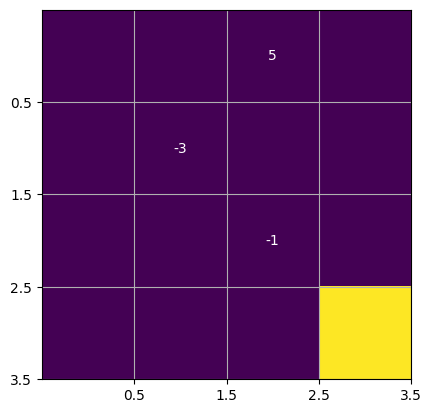

[[12.11146687  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.7436072   0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.479385    0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.17960941  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


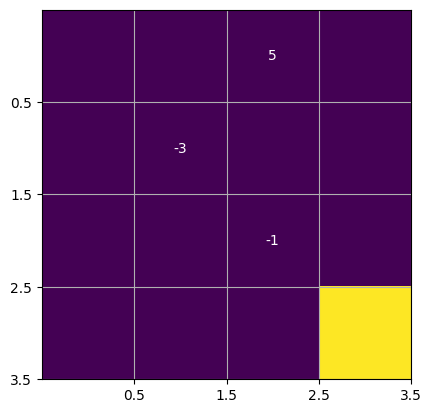

[[12.1445138   0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.79668985  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.51530581  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.18943487  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


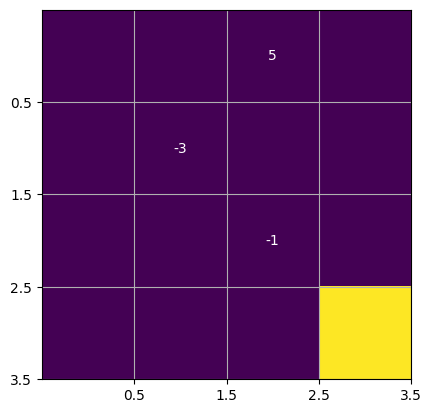

[[12.18239708  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.84475085  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.54407476  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.19660745  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


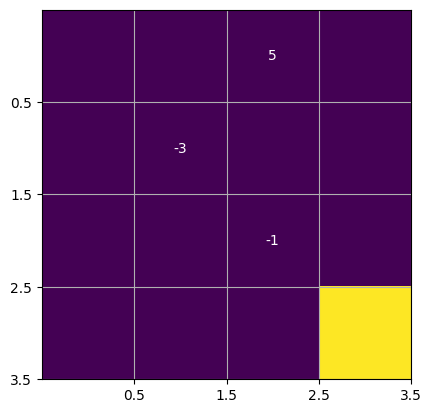

[[12.22250929  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.8872923   0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.56693523  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.20184344  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


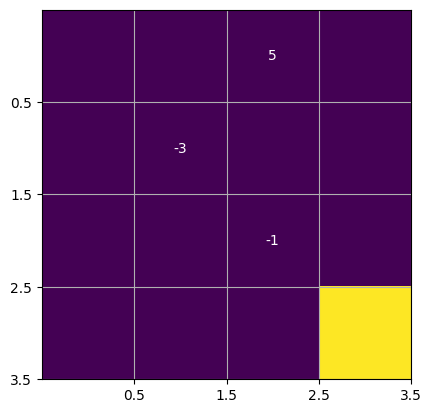

[[12.26281795  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.92427299  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.58498054  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.20566571  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


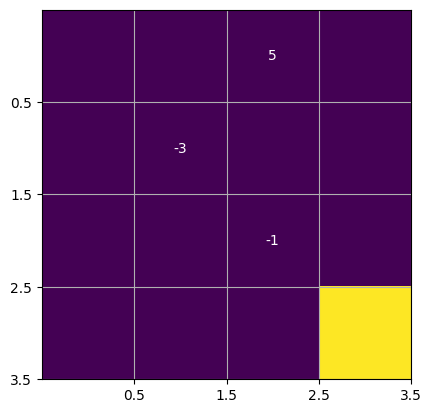

[[12.30182866  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.95594624  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.59914434  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.20845597  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


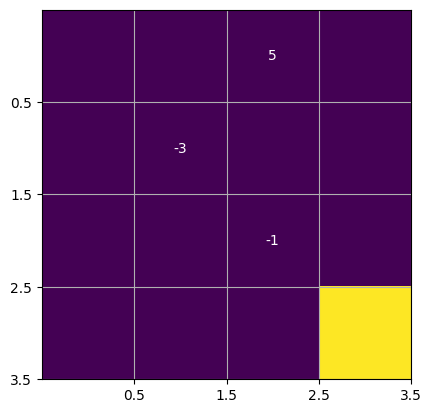

[[12.33851619  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [12.98273897  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.61020716  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21049286  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


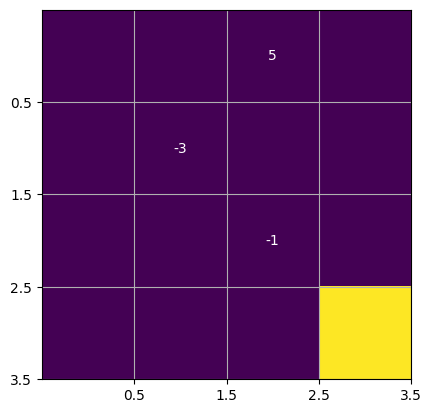

[[12.37224276  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.00516514  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.61881097  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21197979  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


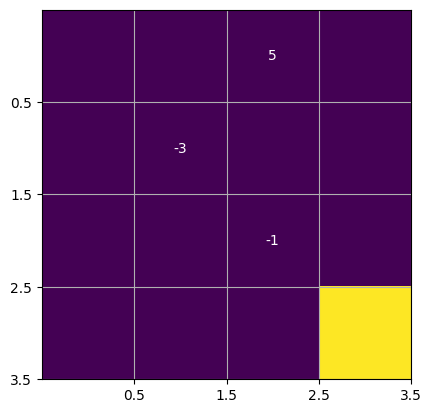

[[12.40267602  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.02376636  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.62547717  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21306524  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


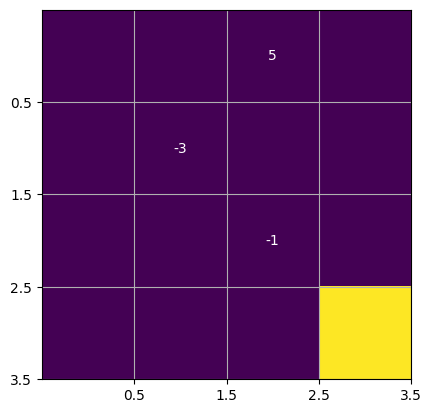

[[12.42971373  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.03907312  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.63062485  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21385763  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


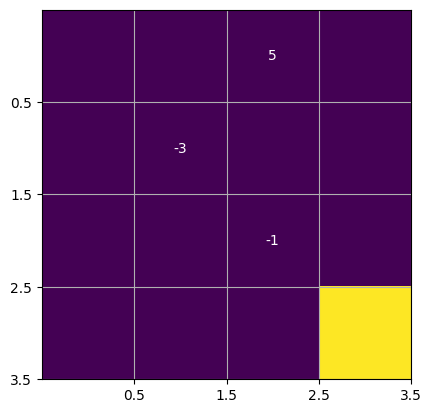

[[12.45341878  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.05158134  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.63458804  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21443607  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


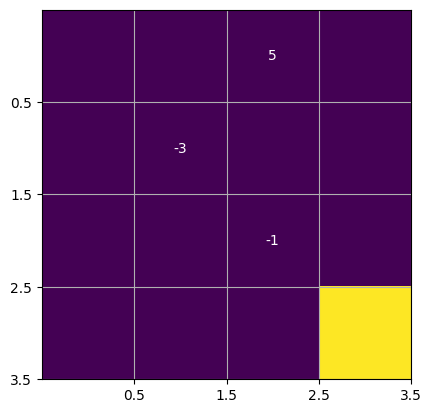

[[12.47396559  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.0617396   0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.63763109  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21485833  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


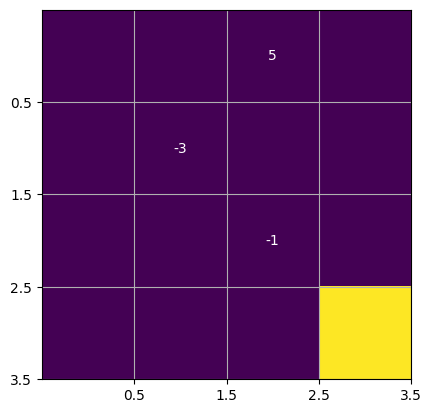

[[12.49159779  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.06994389  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.63996198  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21516658  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


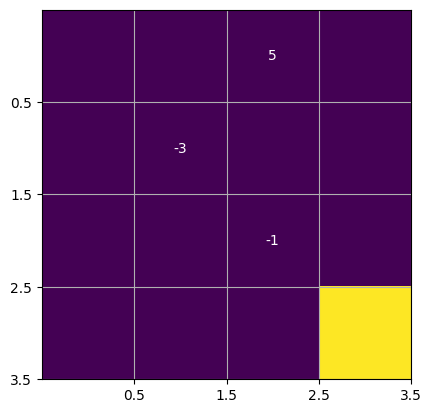

[[12.50659584  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.07653718  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64174342  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.2153916   9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


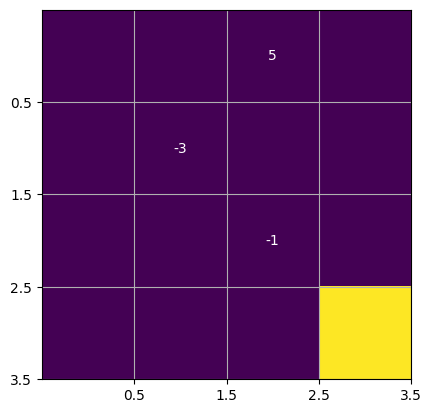

[[12.5192534   0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08181204  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.6431022   0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21555587  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


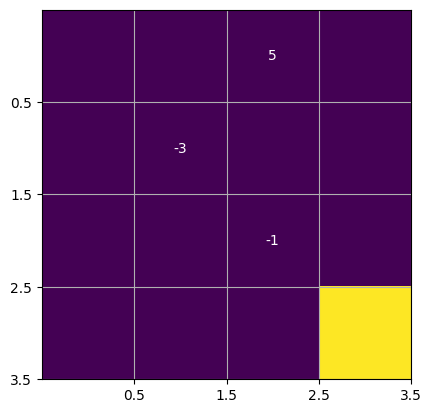

[[12.52986066  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08601488  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64413669  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21567579  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


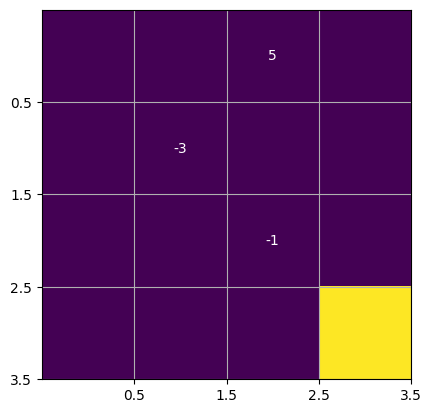

[[12.53869334  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.08935109  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64492295  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21576332  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


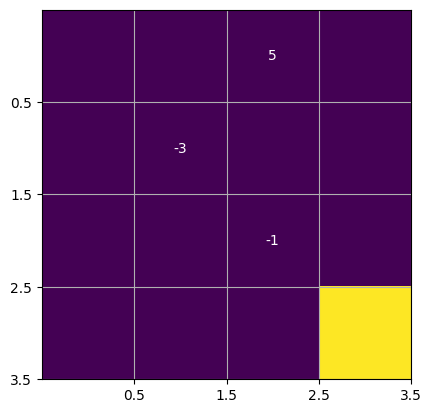

[[12.54600594  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09199032  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.6455196   0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21582723  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


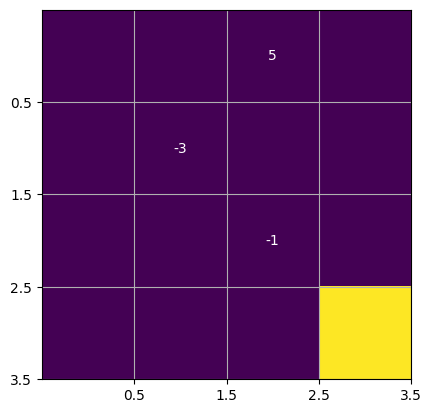

[[12.55202823  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09407162  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64597173  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21587388  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


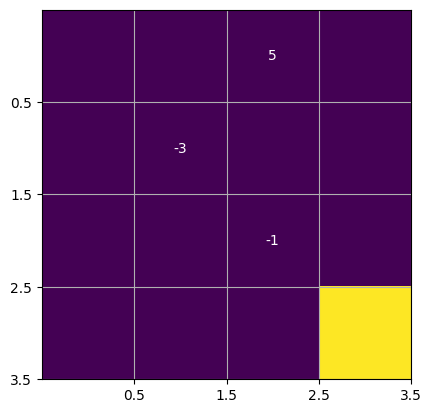

[[12.55696397  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09570815  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64631387  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21590793  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


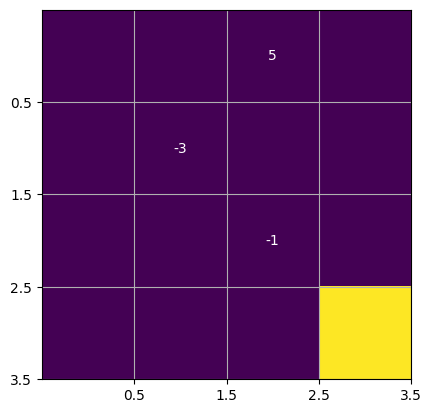

[[12.56099125  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09699151  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64657246  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21593279  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


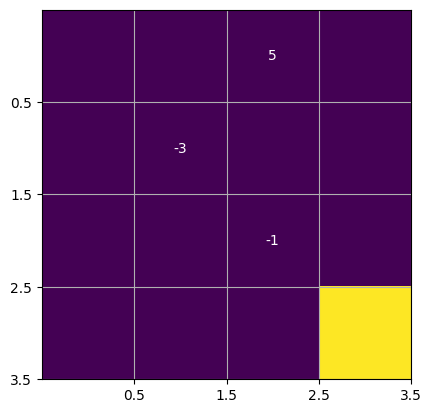

[[12.56426381  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09799538  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64676767  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21595094  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


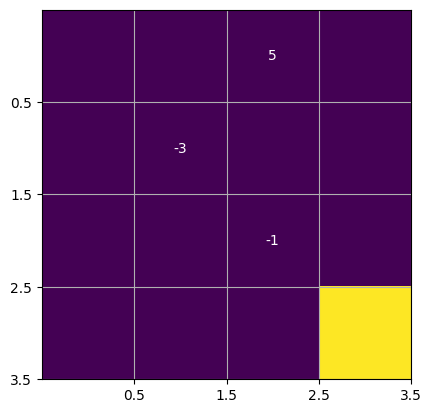

[[12.56691299  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09877881  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64691488  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21596418  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


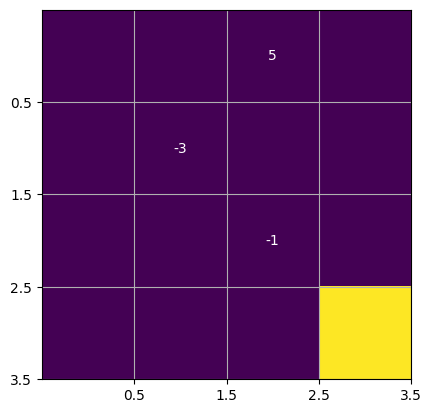

[[12.56904995  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09938887  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64702578  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21597385  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


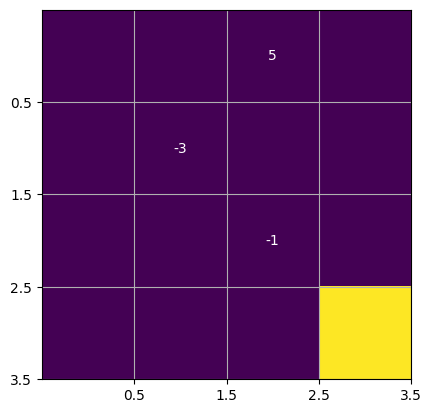

[[12.57076806  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.09986296  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64710924  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21598091  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


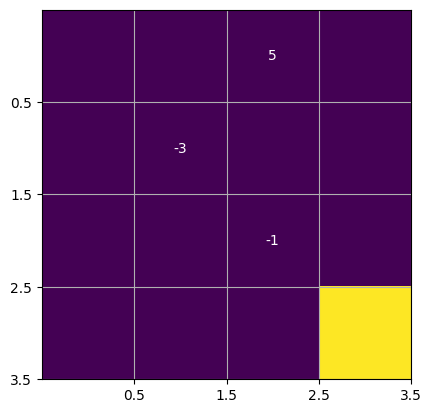

[[12.57214516  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10023067  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.647172    0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21598607  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


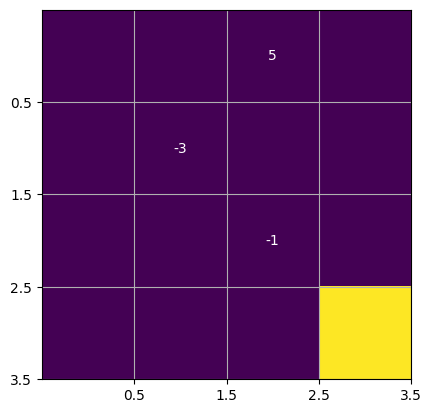

[[12.57324576  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10051538  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64721915  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21598983  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


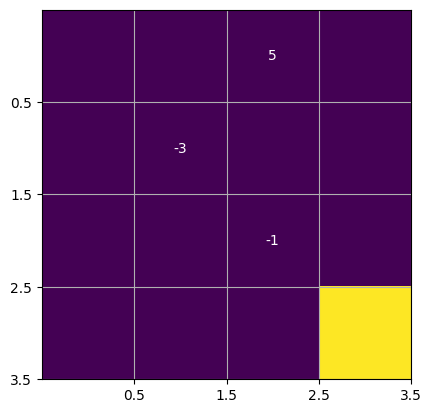

[[12.57412299  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10073543  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64725454  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599257  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


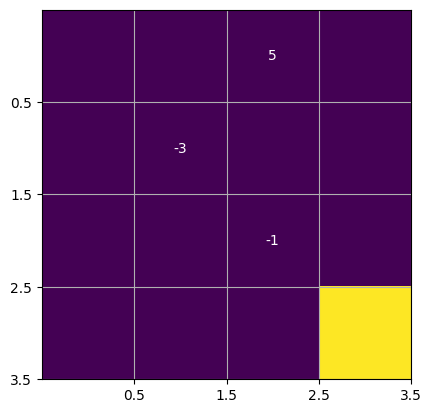

[[12.5748204   0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10090524  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64728109  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599458  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


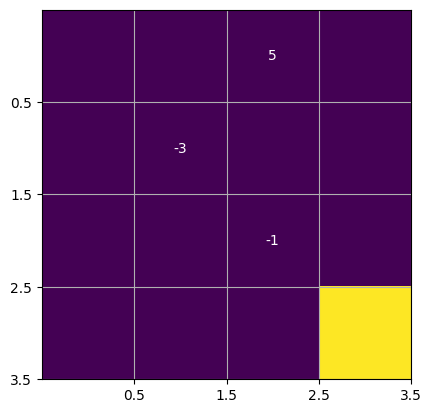

[[12.57537353  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10103608  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64730099  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599604  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


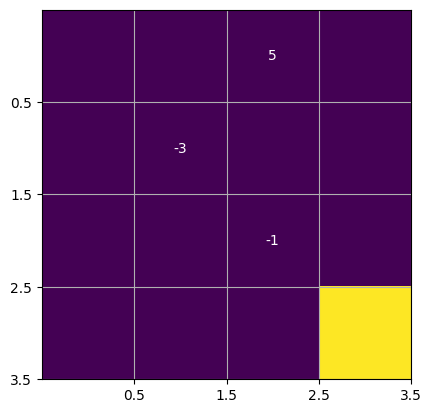

[[12.57581123  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10113676  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.6473159   0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599711  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


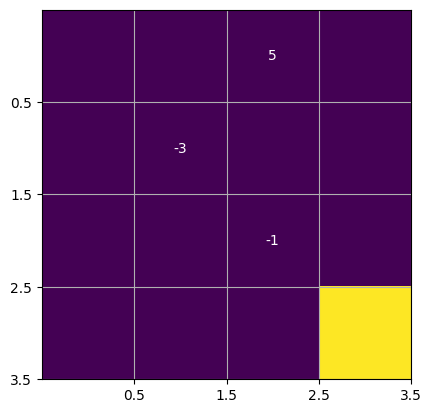

[[12.57615685  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10121411  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64732706  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599789  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


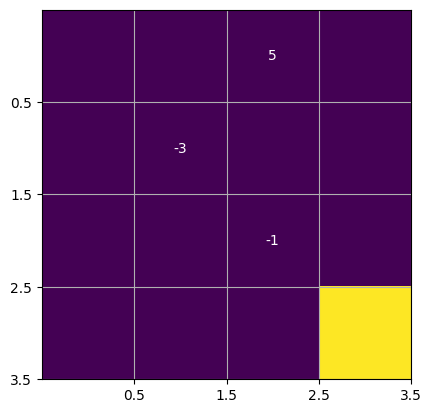

[[12.5764292   0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10127348  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64733541  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599846  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


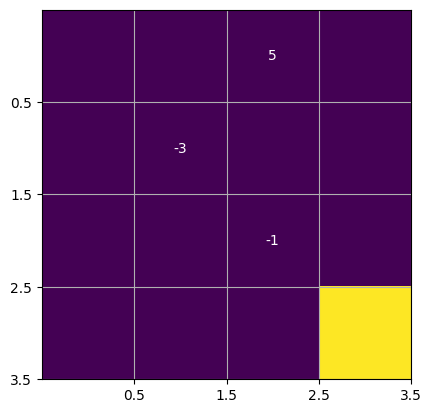

[[12.5766434   0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10131897  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64734165  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599888  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]
Gotcha


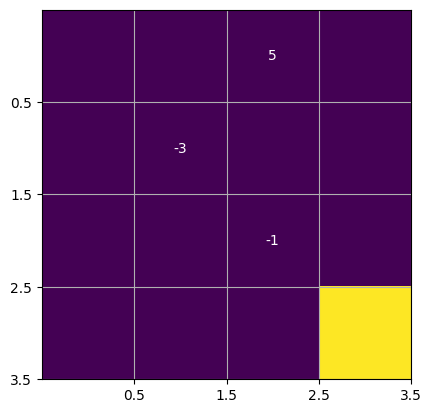

[[12.57681156  0.03435692  0.          3.20702555]
 [-0.81        0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.10135381  0.         -0.81        0.        ]
 [ 1.47433806  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [13.64734631  0.          0.44823745  3.58270579]
 [ 8.3214462   0.         -0.27        0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 2.62321324  1.92962671 14.21599918  9.85935204]
 [ 0.24813599  2.94888649  9.6         8.8820186 ]
 [ 0.          0.         10.          0.        ]
 [ 0.          0.          0.          0.        ]]


In [ ]:
env = GridEnvironment()
agent = SARSA(env,gamma=0.96,decay_factor=0.98)
episode_reward, epsilon_over_episodes = run_sarsa(env, agent, gridStates, num_episodes=300)

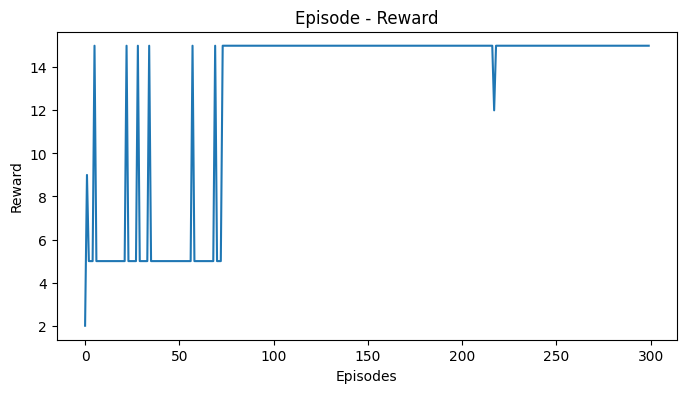

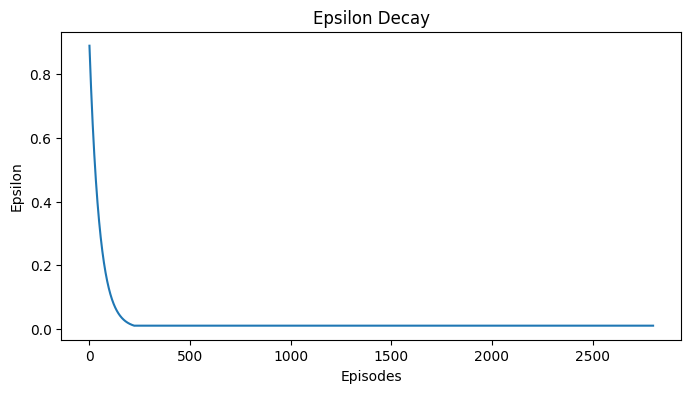

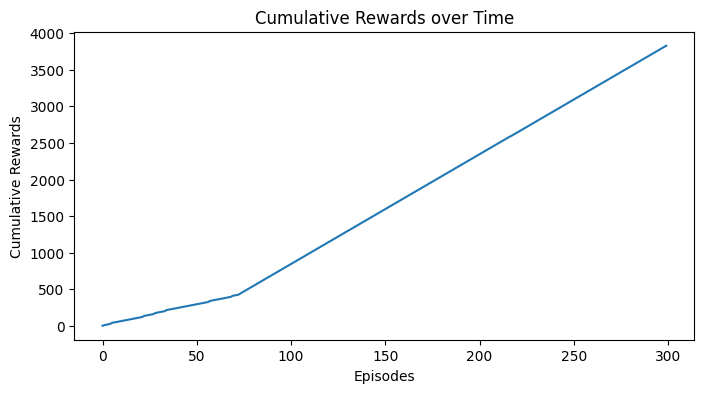

In [ ]:
plot_rewards_and_epsilon(episode_reward, epsilon_over_episodes)